# Exploratory Data Analysis

### Before we start to design a binary classification algorithm, we need to analyse our dataset and perform exploratory data analysis, feature engineering and feature selection. This helps us to identify the flaws in our dataset which further reduces training overheads and improves the efficiency of our model.

#### Load the train and test dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train_data = pd.read_csv('Arya_DataScientist_Assignment/training_set.csv')

In [3]:
test_data = pd.read_csv('Arya_DataScientist_Assignment/test_set.csv')

In [4]:
train_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [5]:
test_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


#### Remove "Unnamed" column in place, as it a dummy index column.

In [6]:
train_data.drop(train_data.columns[train_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [7]:
test_data.drop(test_data.columns[test_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

#### Don't change the original data, so copying it 

In [8]:
train = train_data.copy()
test = test_data.copy()

#### There are 57 Columns or Attributes (also called as predictors) in train and test dataset. Also the target variable which is binary variable having values either '0' or '1' in training set.

In [9]:
train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [10]:
test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


### Checking data types of predictors and Presence of Null values in datasets

#### Out of 57 attributes, we have X1, X56, X57 and target variable Y as 'int64' variables and rest are 'float64' in train dataset. Since all 3910 instances are available we are having 0 null values in our training data.

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

#### Similarly, test set does not contains any null values.

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      691 non-null    float64
 1   X2      691 non-null    float64
 2   X3      691 non-null    float64
 3   X4      691 non-null    float64
 4   X5      691 non-null    float64
 5   X6      691 non-null    float64
 6   X7      691 non-null    float64
 7   X8      691 non-null    float64
 8   X9      691 non-null    float64
 9   X10     691 non-null    float64
 10  X11     691 non-null    float64
 11  X12     691 non-null    float64
 12  X13     691 non-null    float64
 13  X14     691 non-null    float64
 14  X15     691 non-null    float64
 15  X16     691 non-null    float64
 16  X17     691 non-null    float64
 17  X18     691 non-null    float64
 18  X19     691 non-null    float64
 19  X20     691 non-null    float64
 20  X21     691 non-null    float64
 21  X22     691 non-null    float64
 22  X2

#### 1) So we have 1534 instances that belongs to status/class 1 and 2376 instance that belongs to the status/class 0
#### 2) The total ratio of the number of instances of status 1 to status 0 is  approx. 1.5489
#### 3) So this is fairly imbalanced dataset


In [13]:
train['Y'].value_counts()

0    2376
1    1534
Name: Y, dtype: int64

In [33]:
len(train[train['Y'] == 0])/len(train[train['Y'] == 1.0])

1.5488917861799218

In [16]:
#### Let's copy labels from trainig instances to another variable
labels = train.Y

#### In case of having null values, there some methods to deals with these null values,

#### 1) We can drop the instances which has corresponding attributes as null.
#### 2) We can ultimately drop the entire attribute if number of null values are large.
#### 3) We can go with mean, mode or median replacement strategy to replace the null values.

#### Fortunately we are having zero null values so we are good to go ahead without dealing with any of these strategies.

### Analysing the features

#### Since we are having 57 features, let's analyse some random features and find the distribution, because this will help us to find skewness of the data or requirements for need for standardise it further or ultimately finding any outliers present.

#### Simple Histograms

<AxesSubplot:>

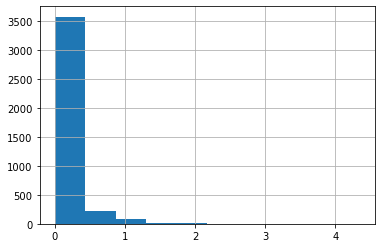

In [17]:
#### most of the values for X1 lies between 0 and 1.0
train['X1'].hist()

In [18]:
#### X1 is having 79 instances with values more than 1.0
len(train[train['X1'] > 1.0])

79

<AxesSubplot:>

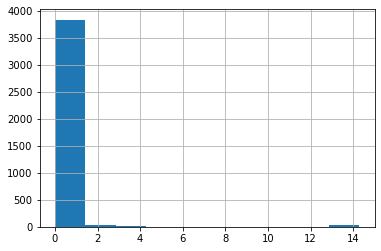

In [19]:
train['X2'].hist()

In [20]:
#### X2 are having 124 values greater than 1.0 and 28 values greater than 10.0
len(train[train['X2'] > 1.0 ])

124

In [21]:
len(train[train['X2'] > 10.0 ])

28

<AxesSubplot:>

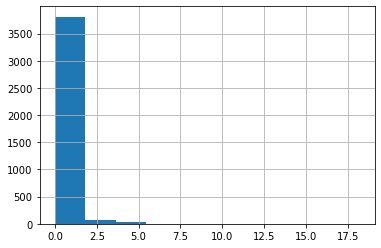

In [22]:
train['X10'].hist()

<AxesSubplot:>

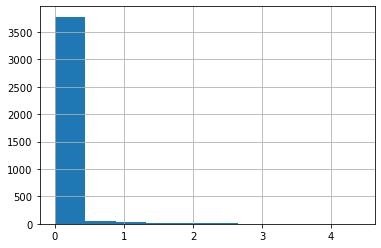

In [23]:
train['X15'].hist()

<AxesSubplot:>

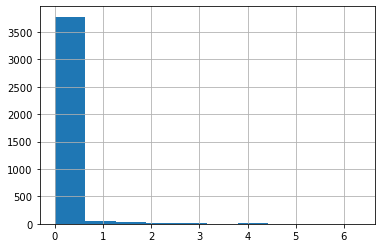

In [24]:
train['X20'].hist()

<AxesSubplot:>

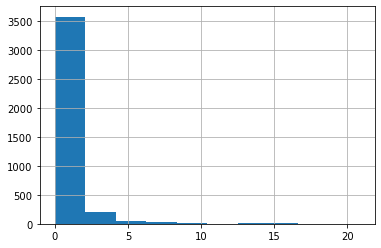

In [25]:
train['X25'].hist()

<AxesSubplot:>

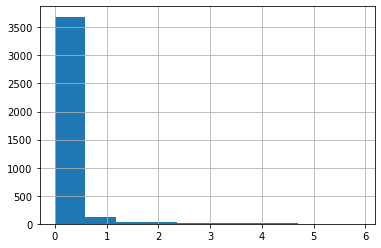

In [26]:
train['X30'].hist()

<AxesSubplot:>

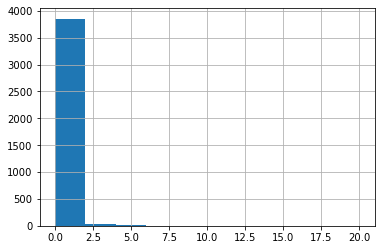

In [27]:
train['X35'].hist()

<AxesSubplot:>

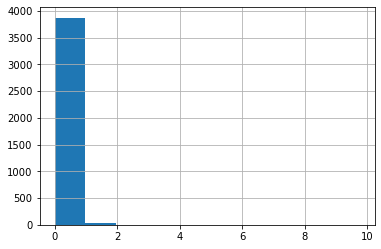

In [28]:
train['X50'].hist()

### We are having lot of instances with values greater than 1.0, hence we have to standardise our dataset

In [29]:
train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


#### From the above table, we can observe that, there are few features having very large values 
#### such as X55 = 1102, X56 = 9989, X57 = 10062 and so on.

#### Let's analyze the percentage of value distribution for all features

In [81]:
def length_distribution(df):
    
    attr_ratios = []
    columns = df.columns[:57]
    
    for column in df.columns[:57]:
        length = len(df[df[column] > 1.0])
        attr_ratios.append(length/len(df[column])*100)
        
    sorted_index = np.argsort(attr_ratios)[::-1]
    for index in sorted_index:
        print(columns[index], "Has {} % values greater than 1.0".format(attr_ratios[index]))

In [82]:
length_distribution(train)

X57 Has 99.769820971867 % values greater than 1.0
X55 Has 92.55754475703326 % values greater than 1.0
X56 Has 92.55754475703326 % values greater than 1.0
X19 Has 56.21483375959079 % values greater than 1.0
X21 Has 32.58312020460358 % values greater than 1.0
X12 Has 19.59079283887468 % values greater than 1.0
X25 Has 15.396419437340153 % values greater than 1.0
X27 Has 10.946291560102301 % values greater than 1.0
X5 Has 10.30690537084399 % values greater than 1.0
X45 Has 9.360613810741688 % values greater than 1.0
X26 Has 8.67007672634271 % values greater than 1.0
X3 Has 8.286445012787723 % values greater than 1.0
X10 Has 8.05626598465473 % values greater than 1.0
X16 Has 7.161125319693094 % values greater than 1.0
X18 Has 6.803069053708439 % values greater than 1.0
X52 Has 6.138107416879795 % values greater than 1.0
X46 Has 5.038363171355498 % values greater than 1.0
X37 Has 4.398976982097187 % values greater than 1.0
X28 Has 4.168797953964194 % values greater than 1.0
X17 Has 3.785166

#### similarly for test features

In [83]:
length_distribution(test)

X57 Has 100.0 % values greater than 1.0
X55 Has 91.60636758321273 % values greater than 1.0
X56 Has 91.60636758321273 % values greater than 1.0
X19 Has 54.70332850940666 % values greater than 1.0
X21 Has 31.114327062228654 % values greater than 1.0
X12 Has 15.629522431259044 % values greater than 1.0
X25 Has 14.76121562952243 % values greater than 1.0
X5 Has 10.709117221418236 % values greater than 1.0
X27 Has 10.130246020260492 % values greater than 1.0
X26 Has 8.683068017366136 % values greater than 1.0
X10 Has 7.959479015918958 % values greater than 1.0
X16 Has 7.380607814761215 % values greater than 1.0
X3 Has 7.091172214182344 % values greater than 1.0
X45 Has 7.091172214182344 % values greater than 1.0
X52 Has 5.933429811866859 % values greater than 1.0
X18 Has 5.788712011577424 % values greater than 1.0
X46 Has 5.499276410998553 % values greater than 1.0
X28 Has 4.486251808972503 % values greater than 1.0
X37 Has 4.341534008683068 % values greater than 1.0
X7 Has 4.1968162083936

#### From the above we can observe that, few features are ranging between 0 to 1, and some are having very large values and different distributions.

#### KDE Plots

<Figure size 720x576 with 0 Axes>

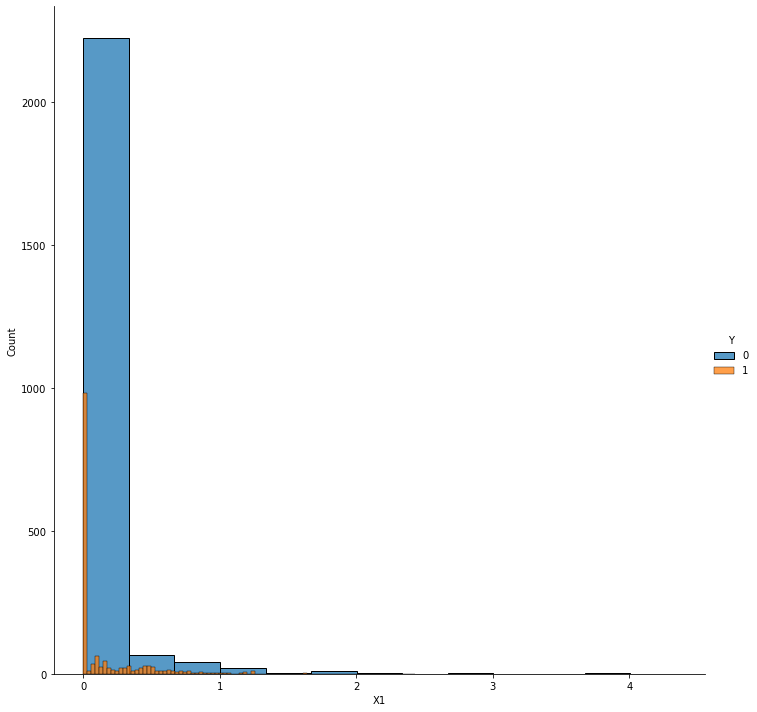

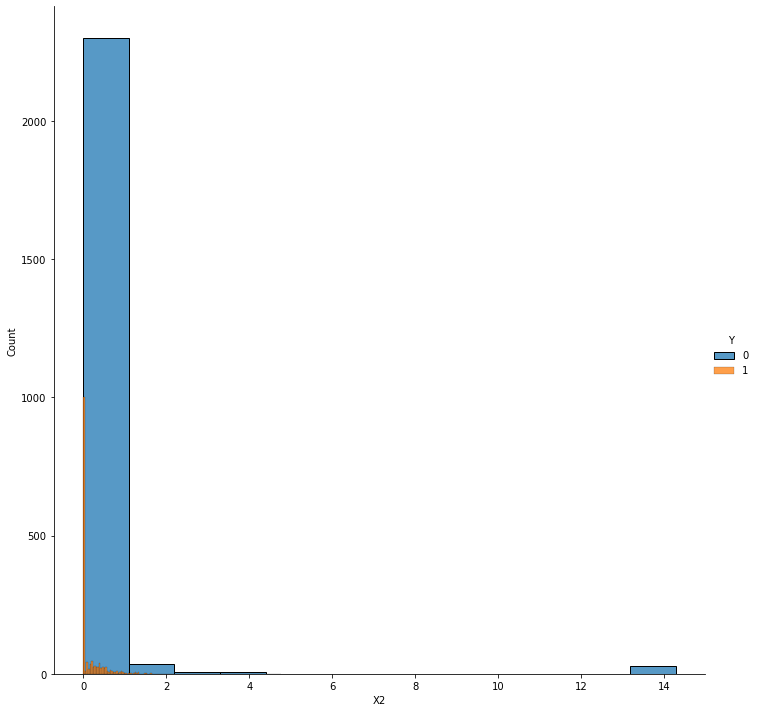

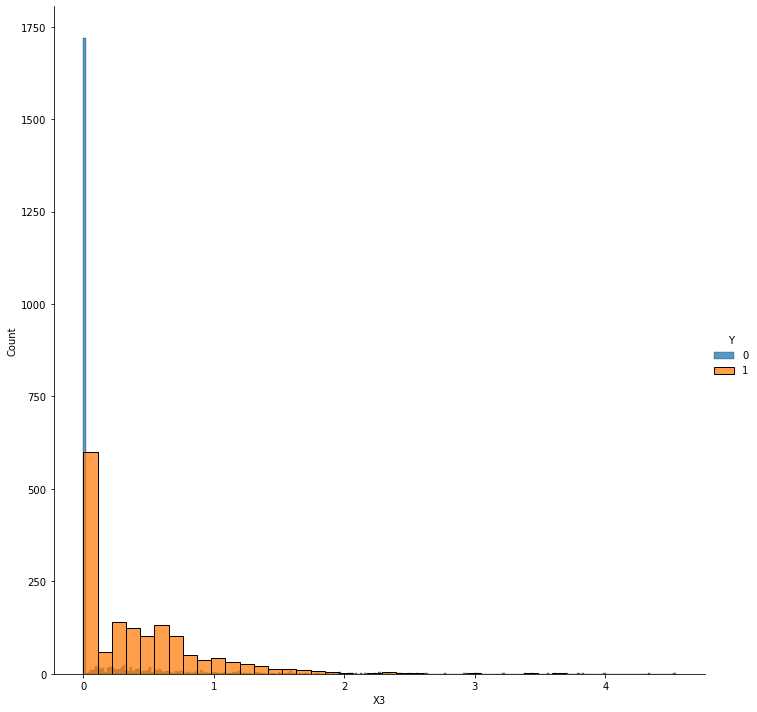

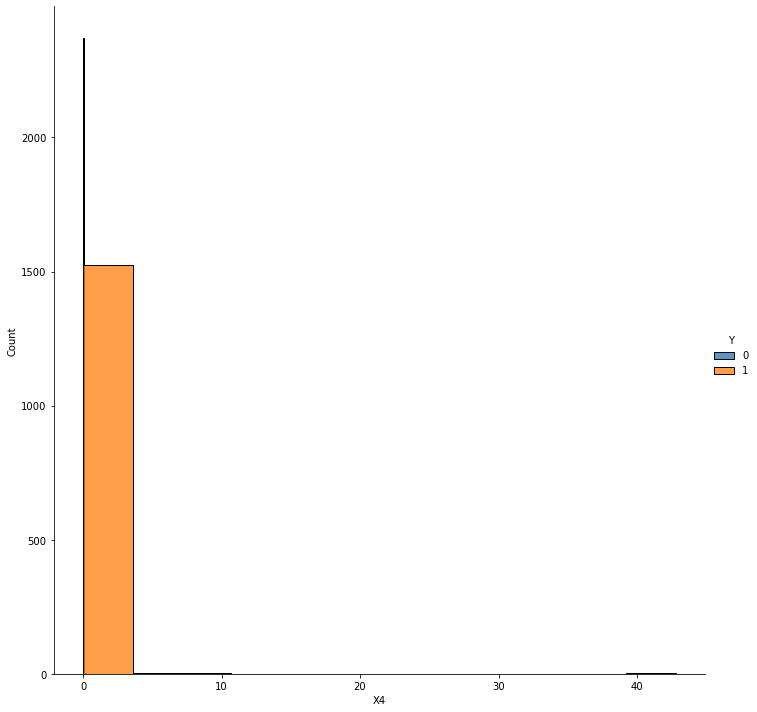

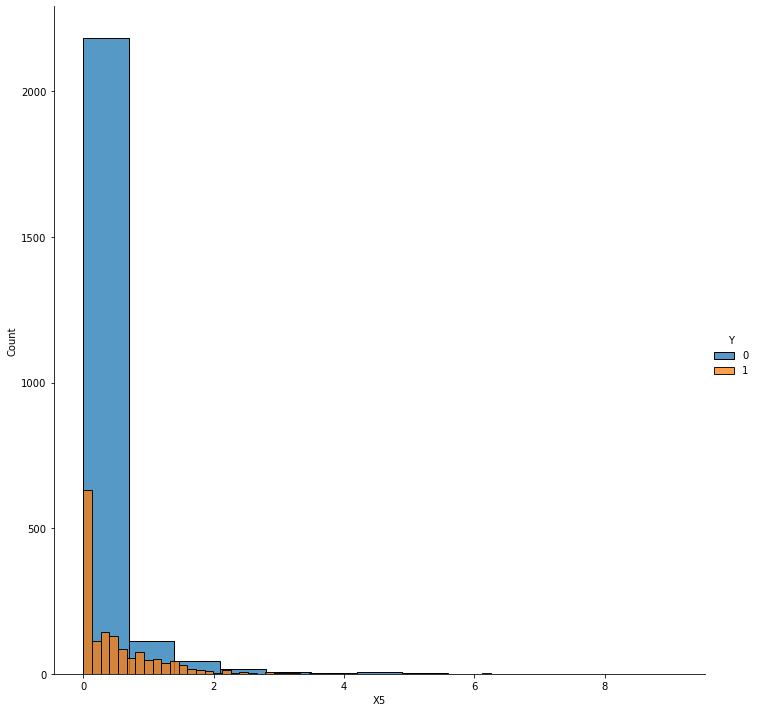

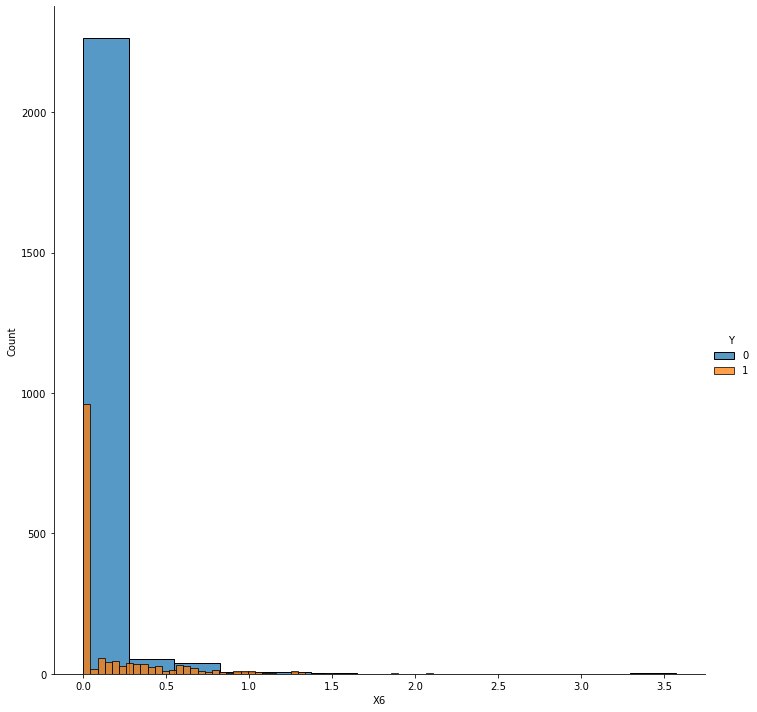

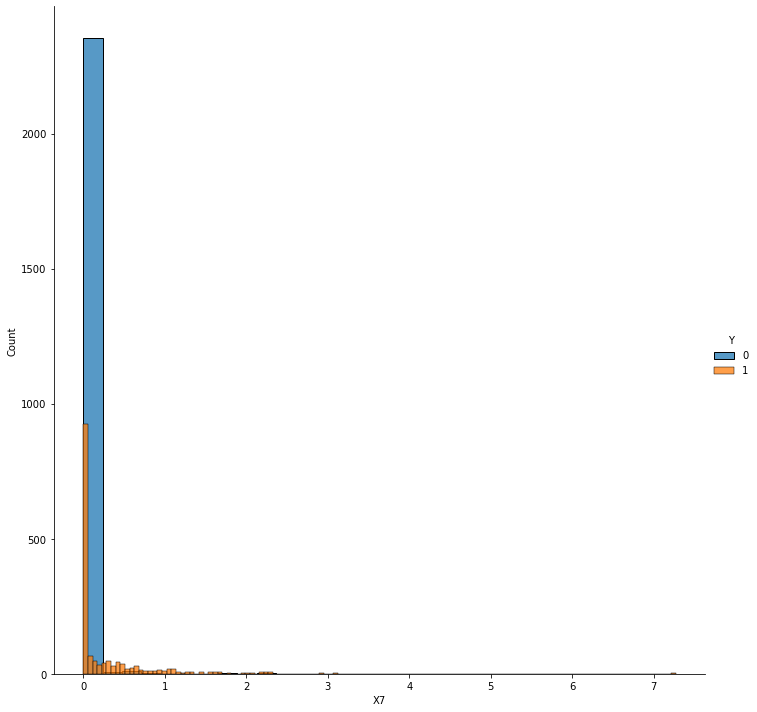

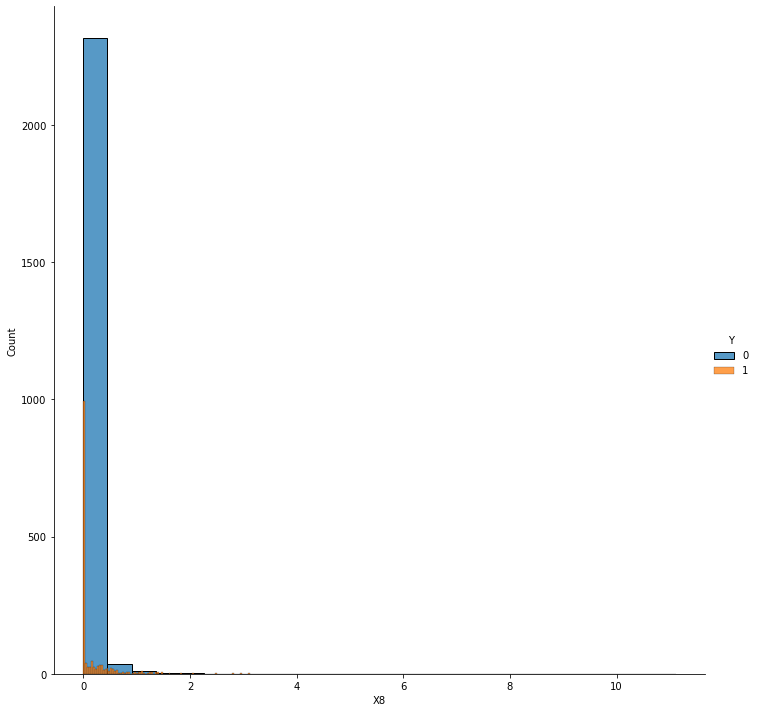

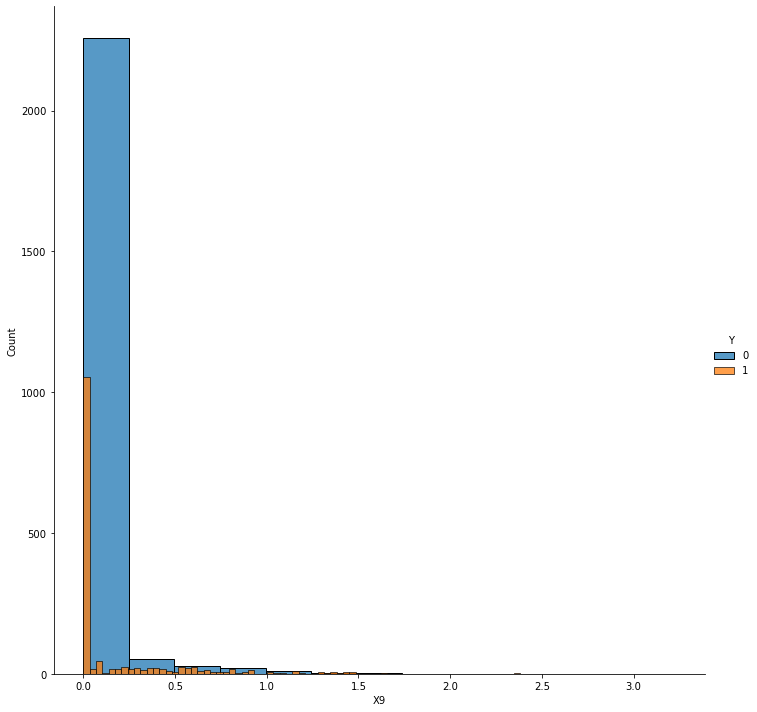

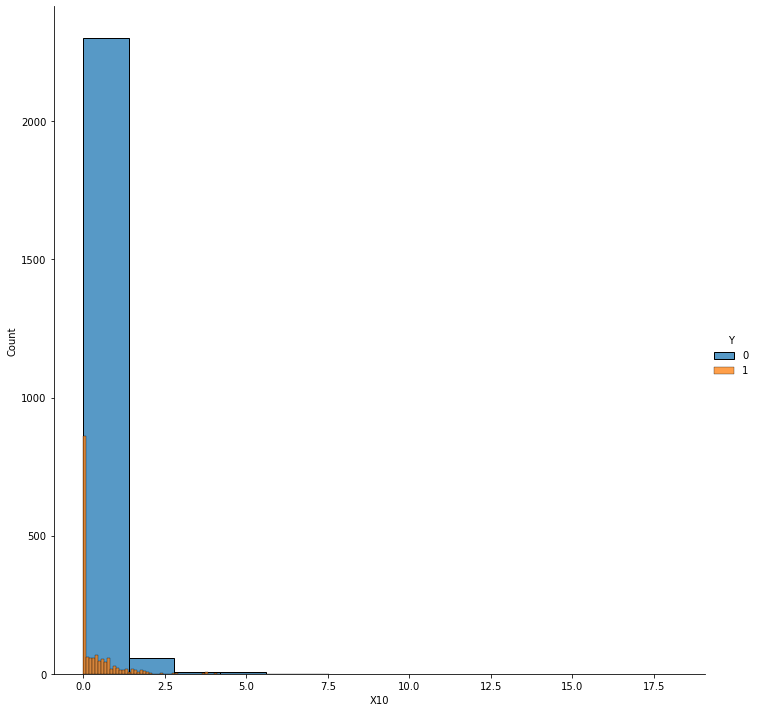

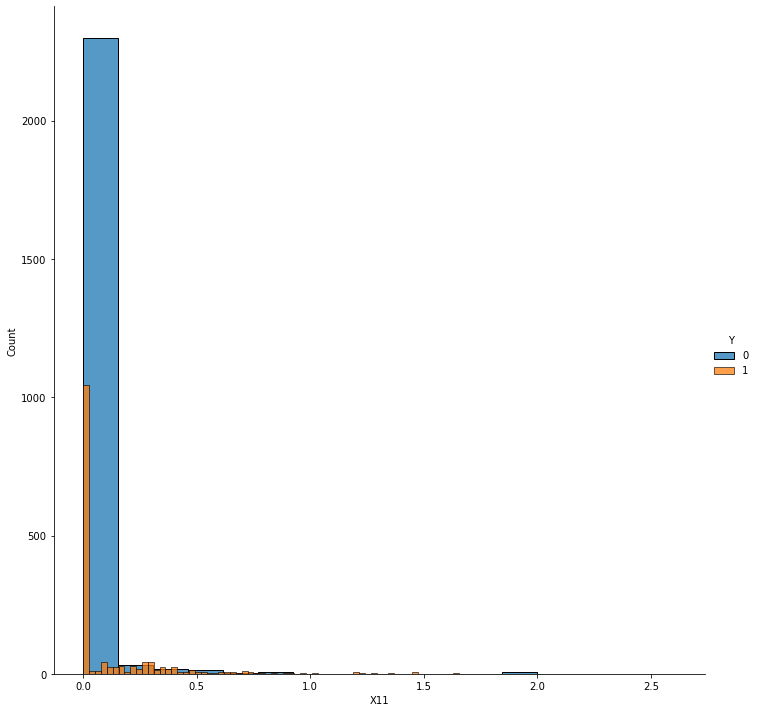

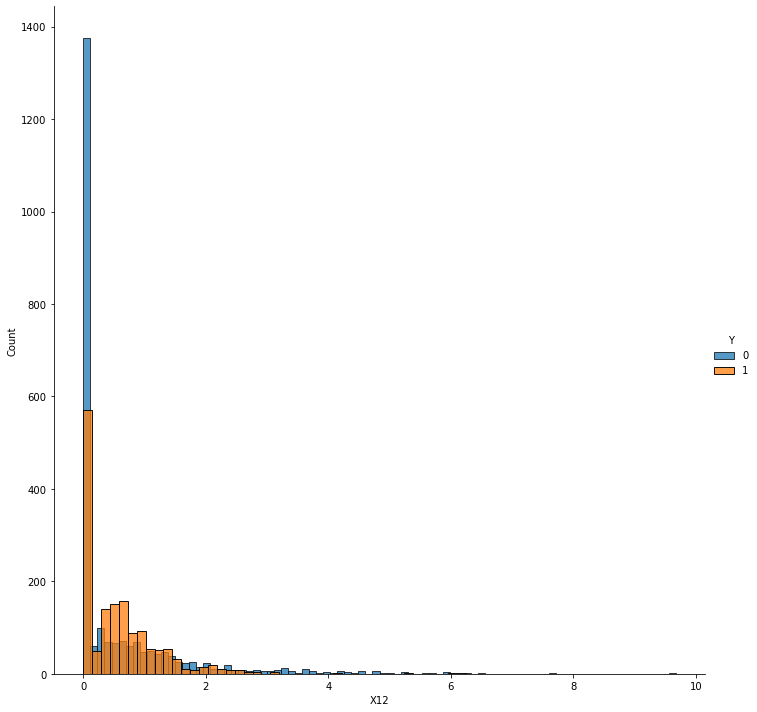

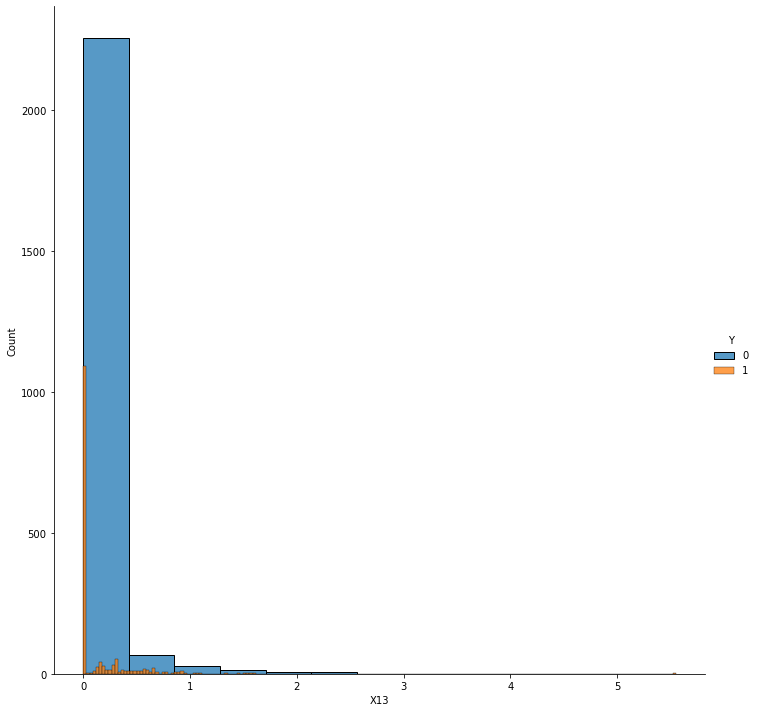

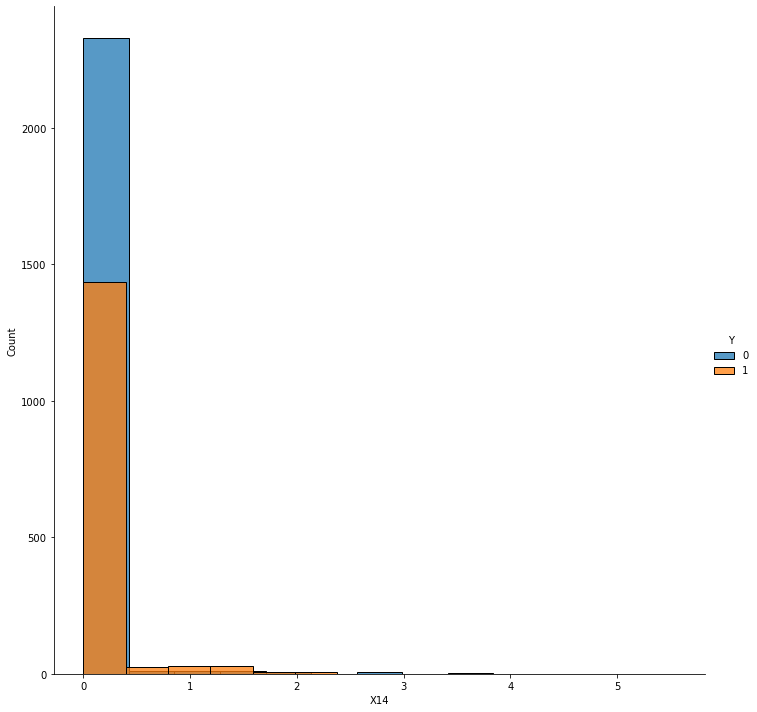

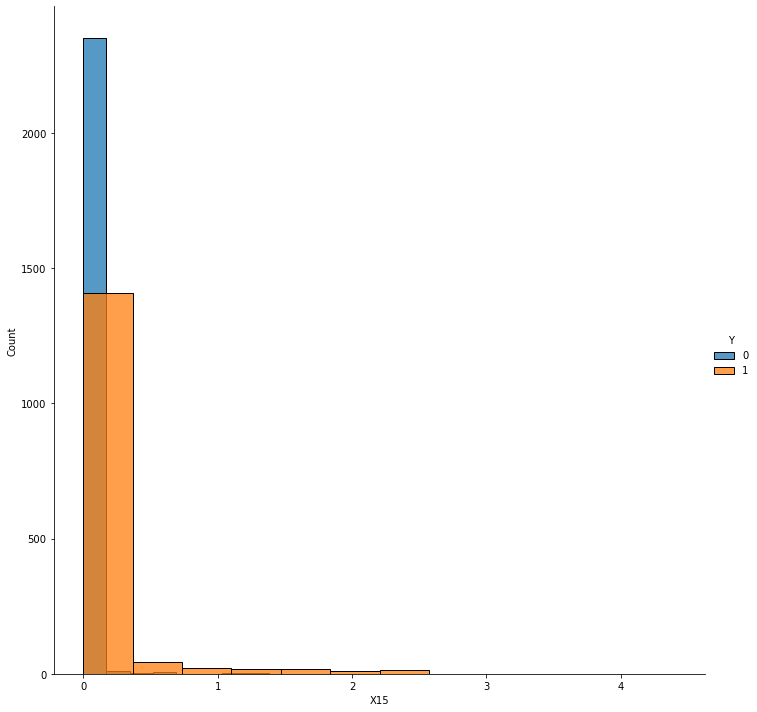

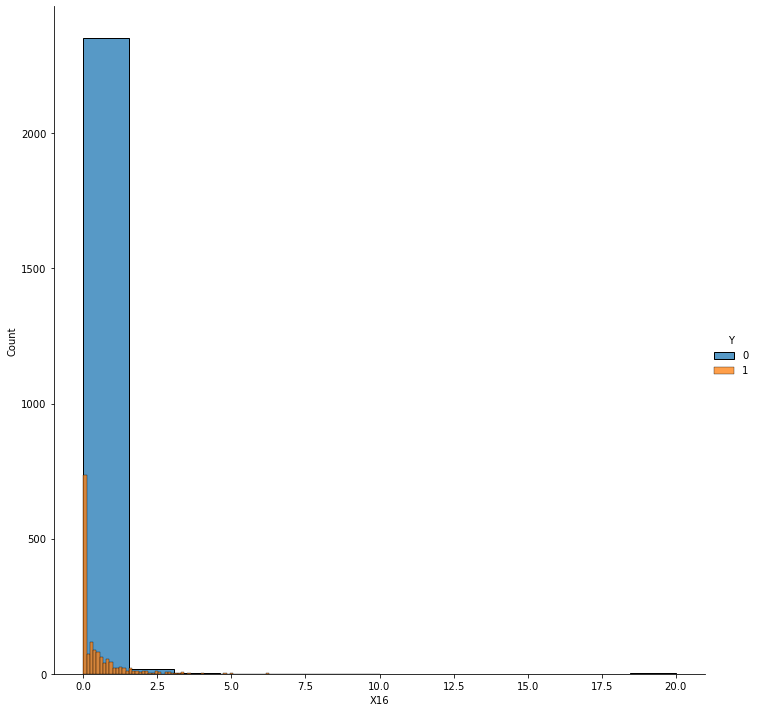

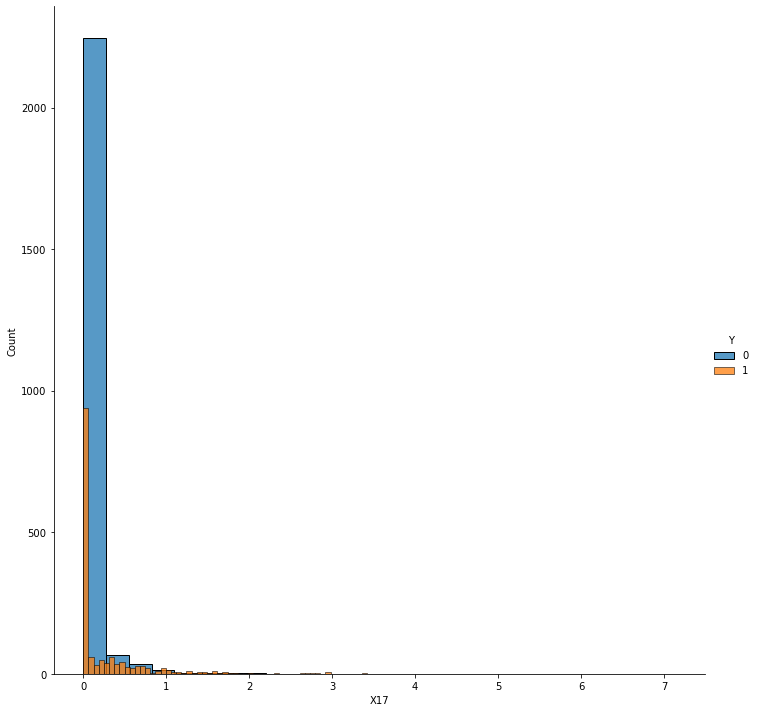

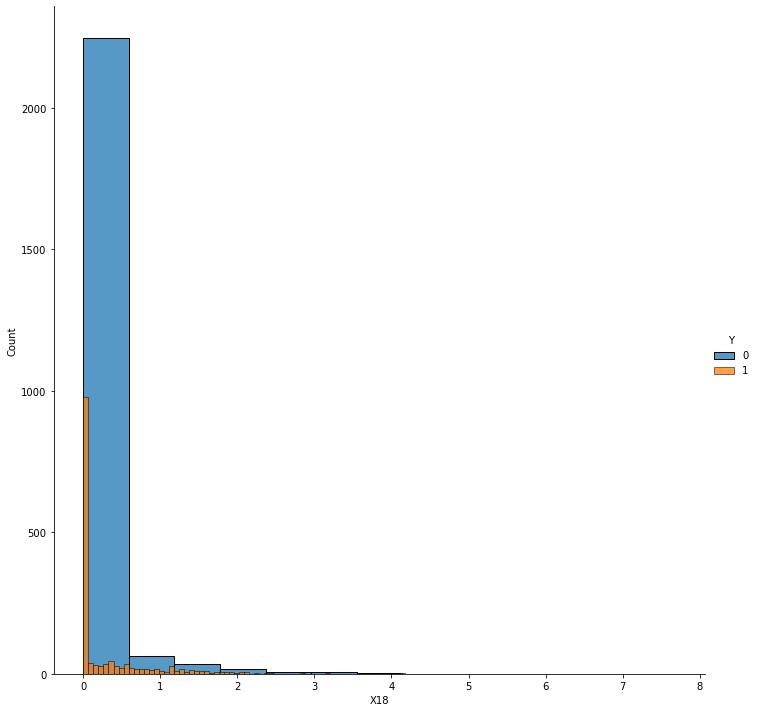

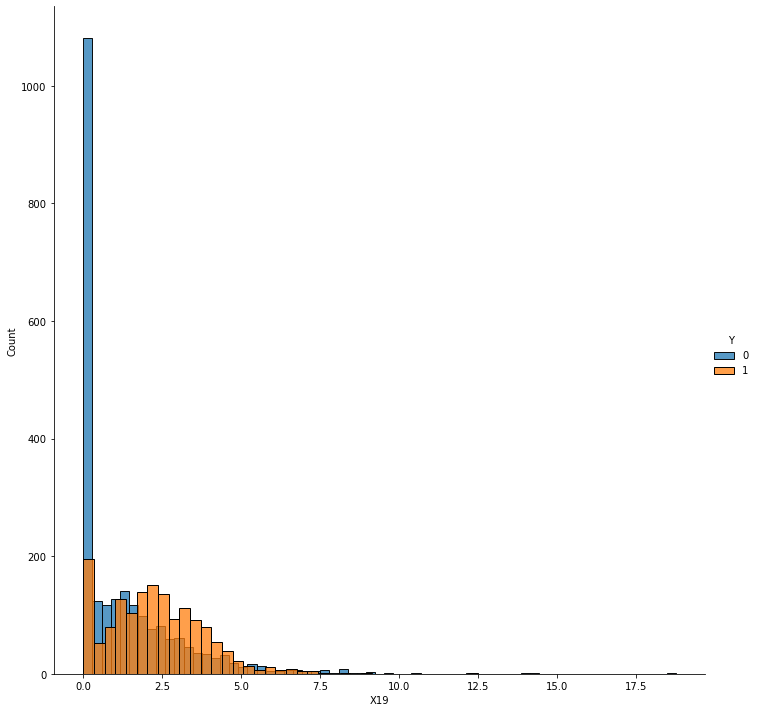

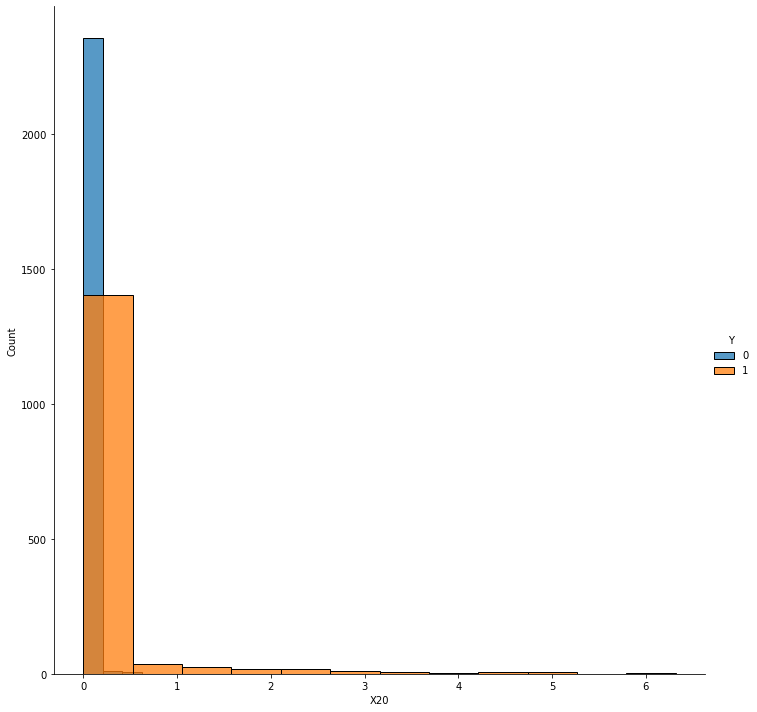

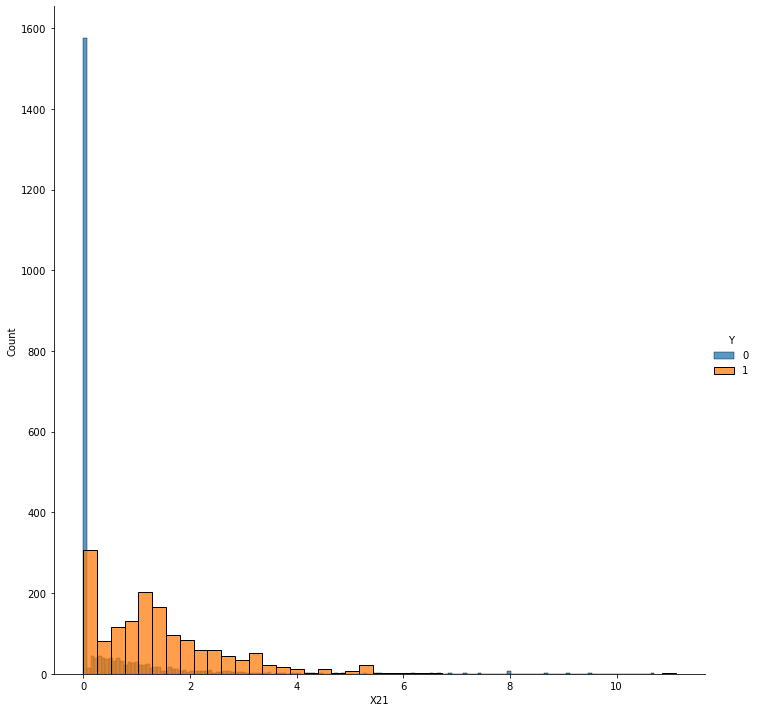

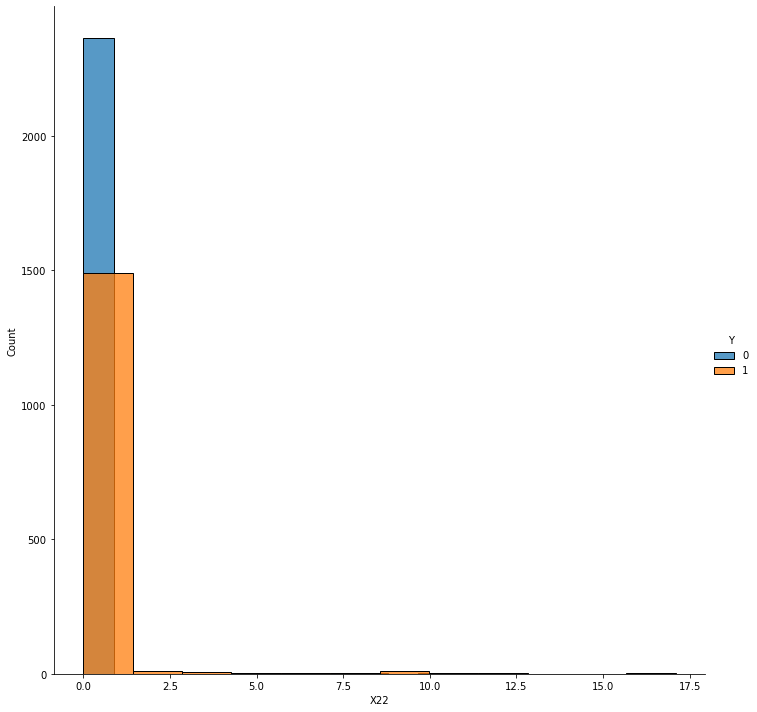

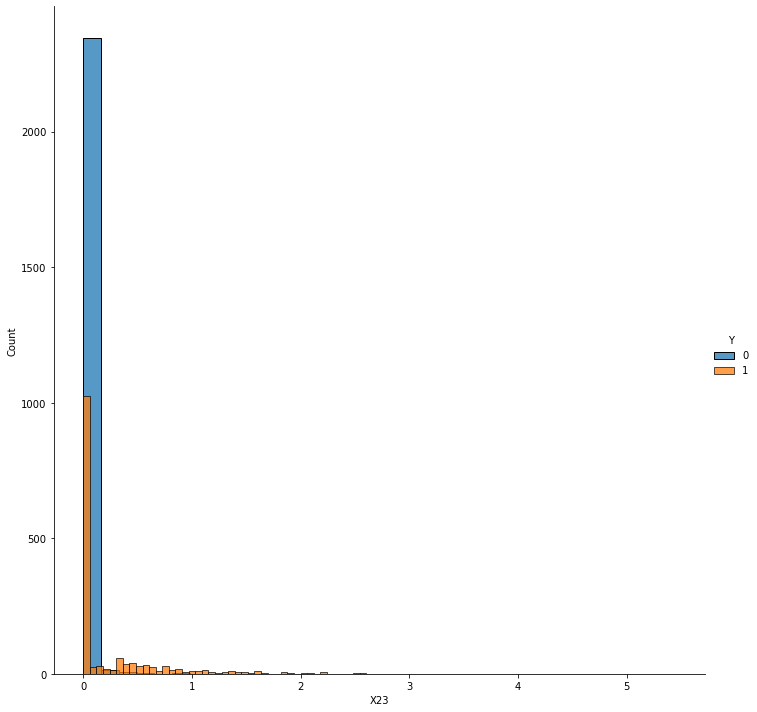

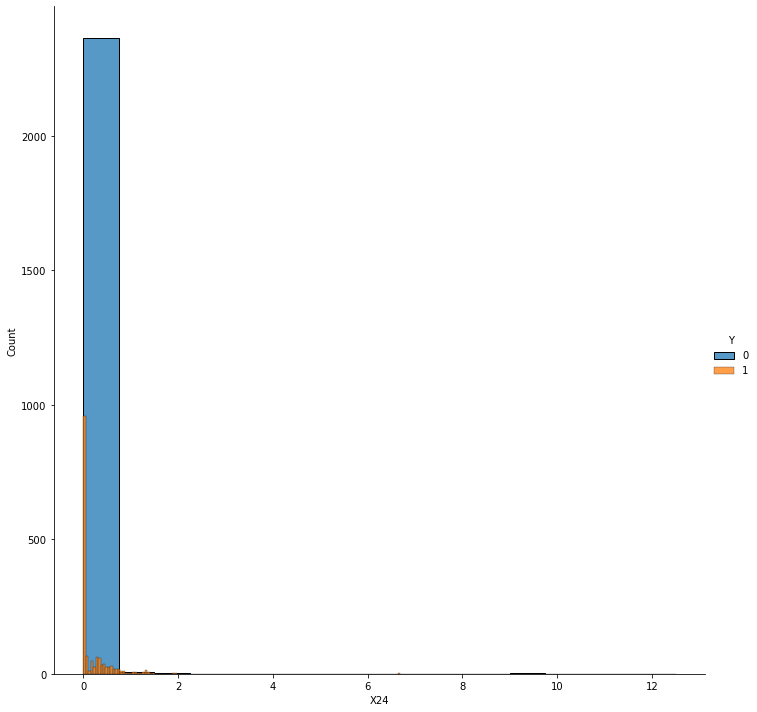

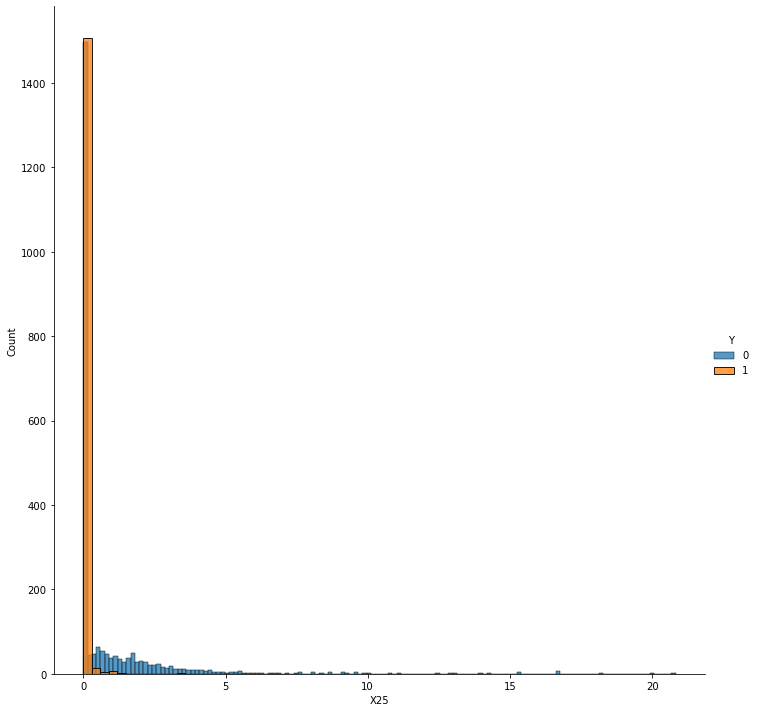

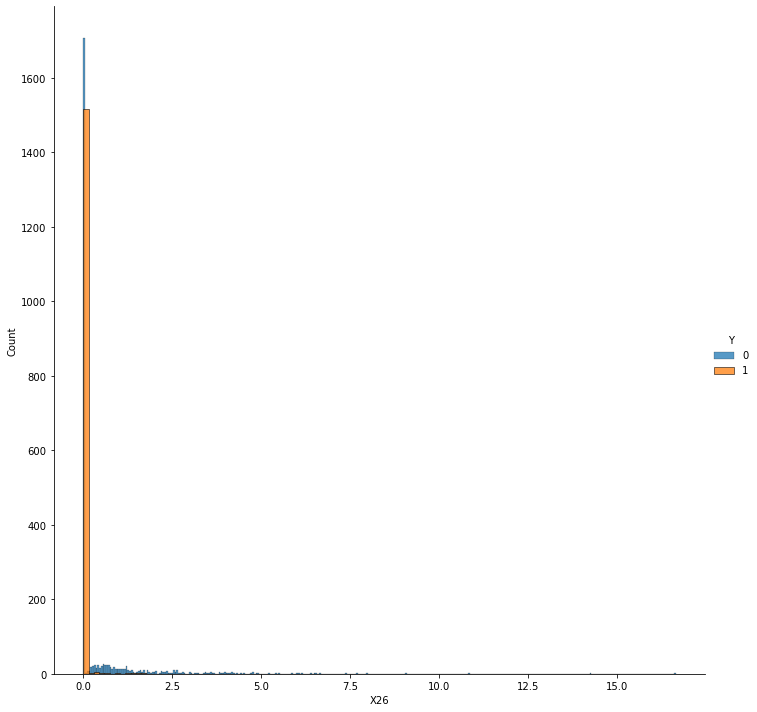

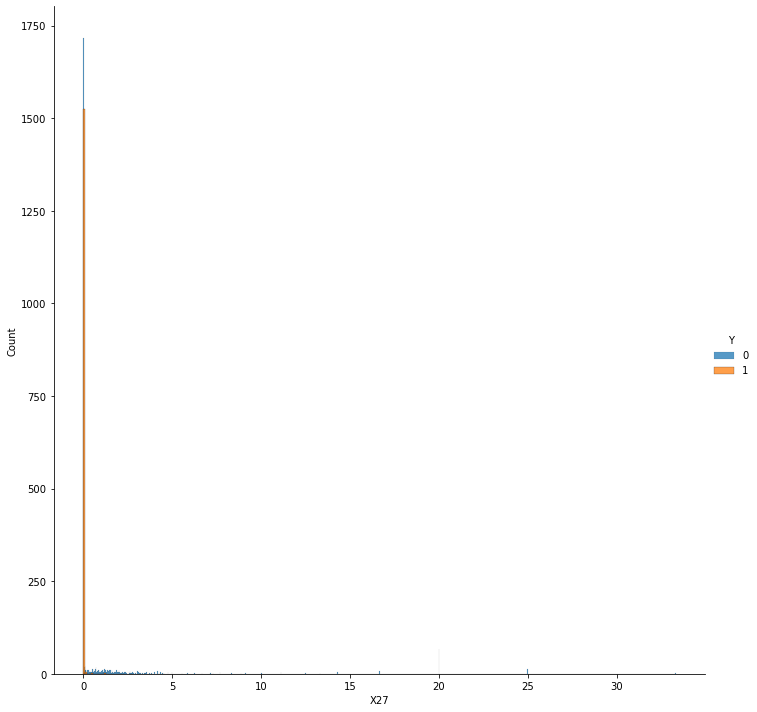

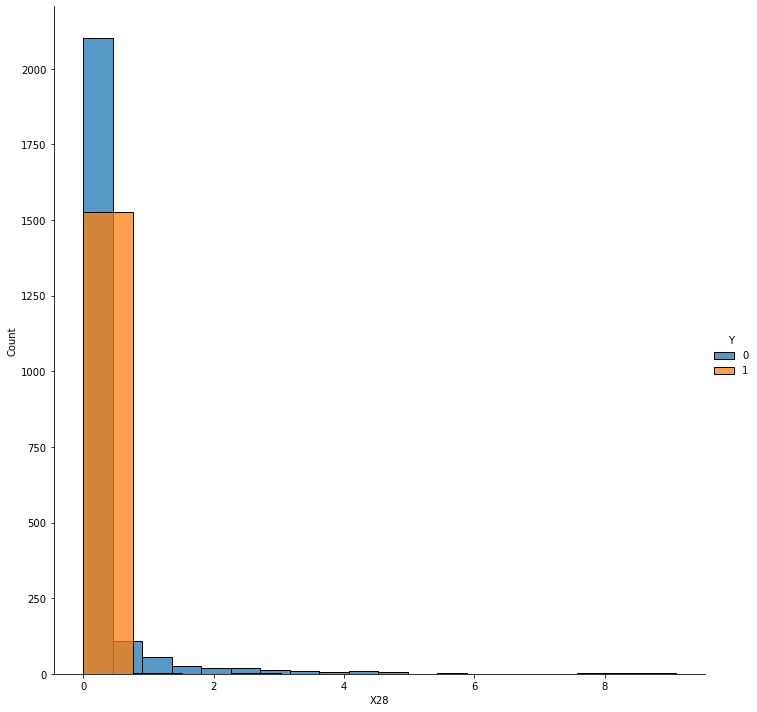

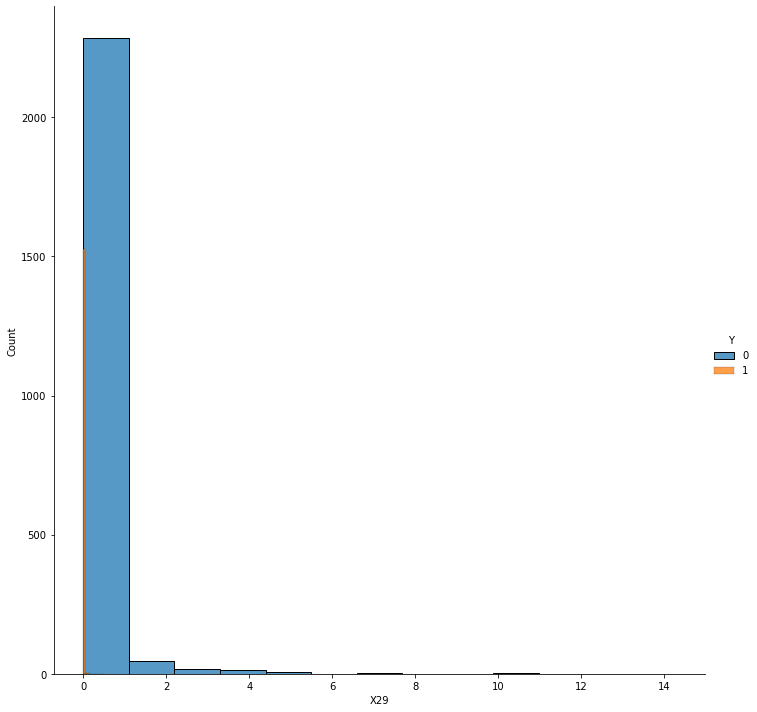

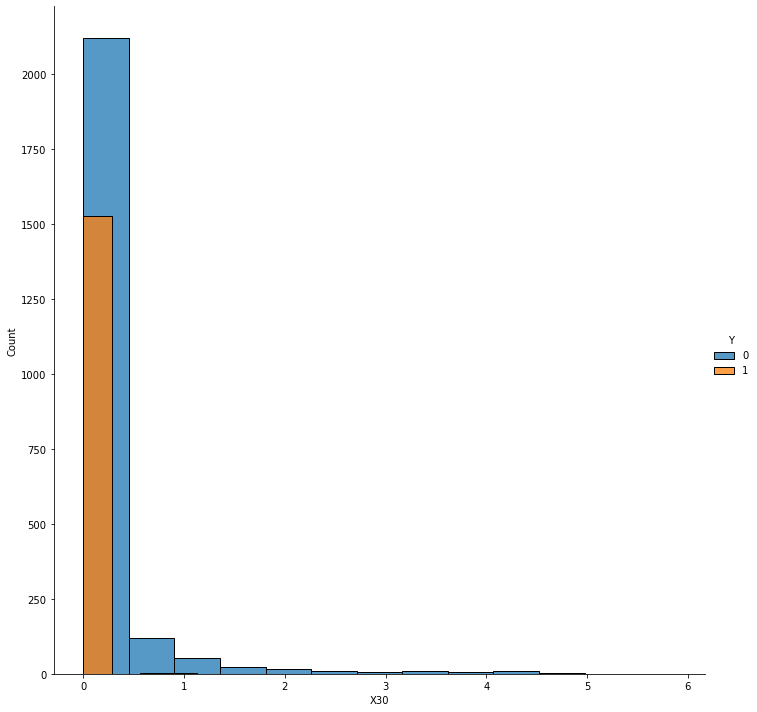

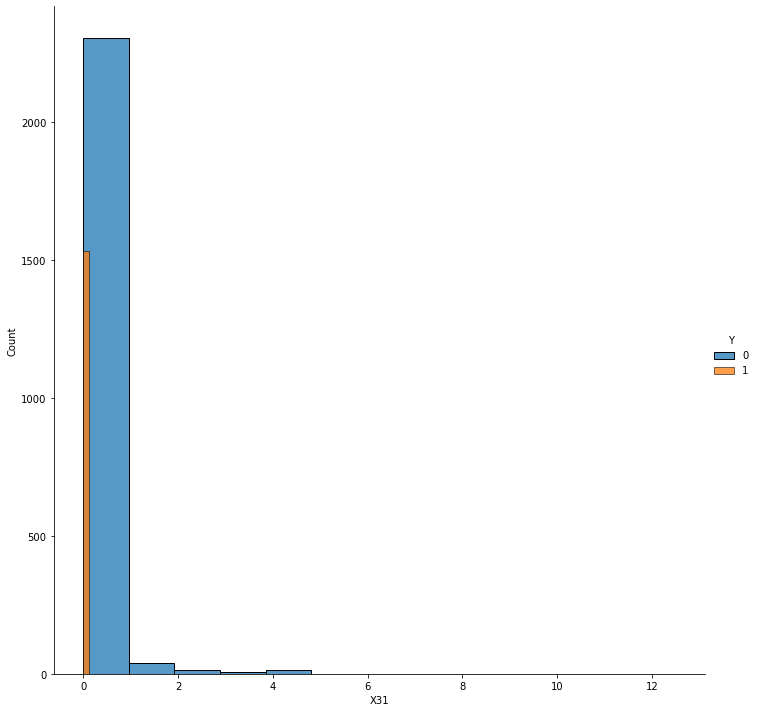

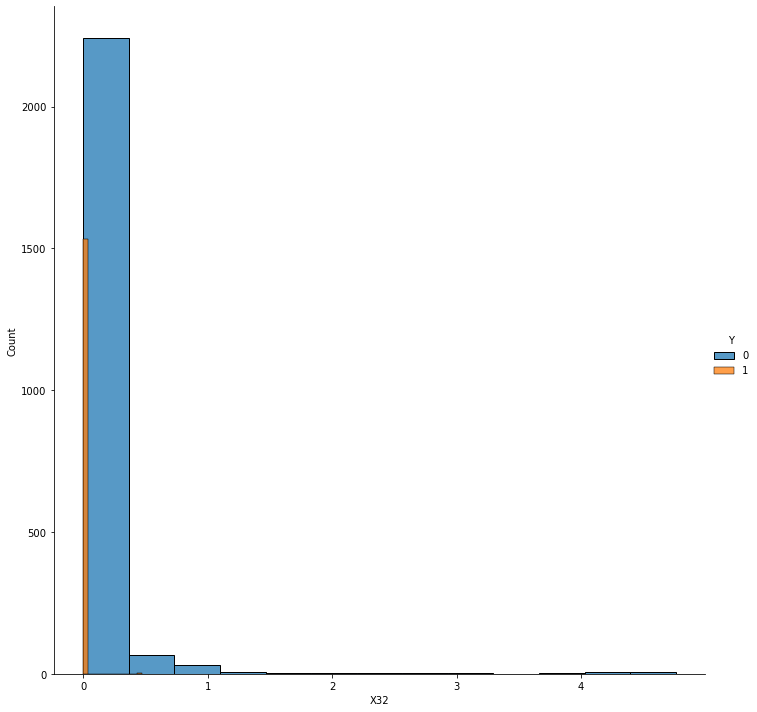

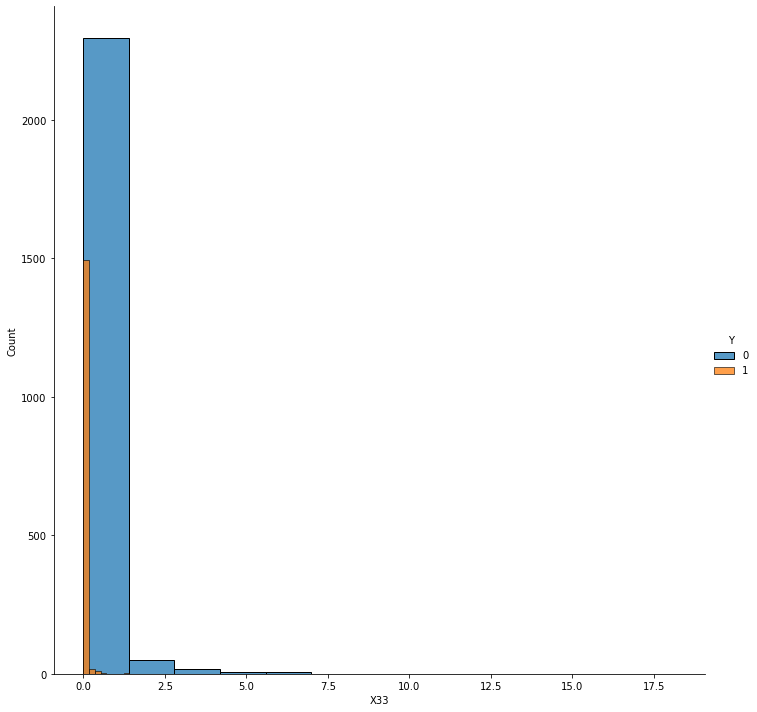

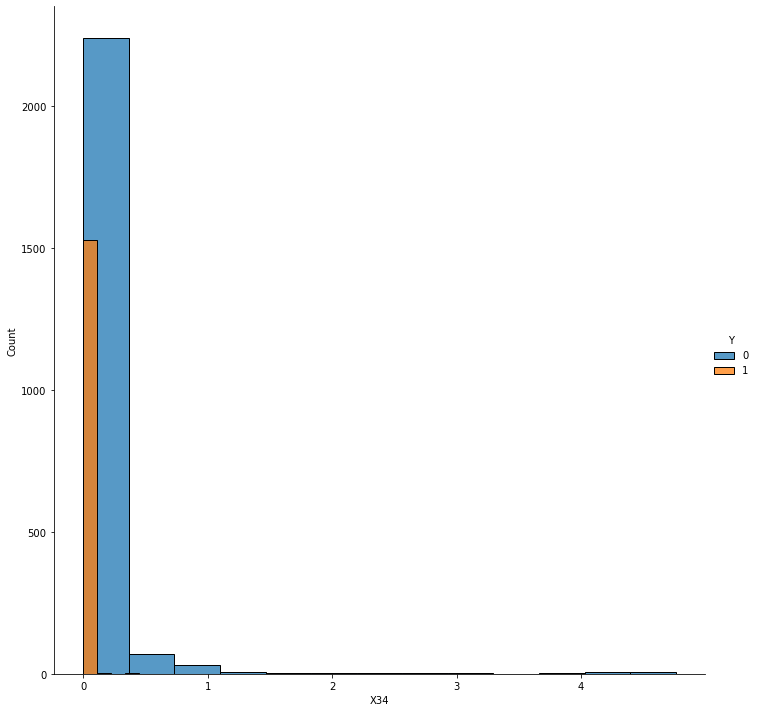

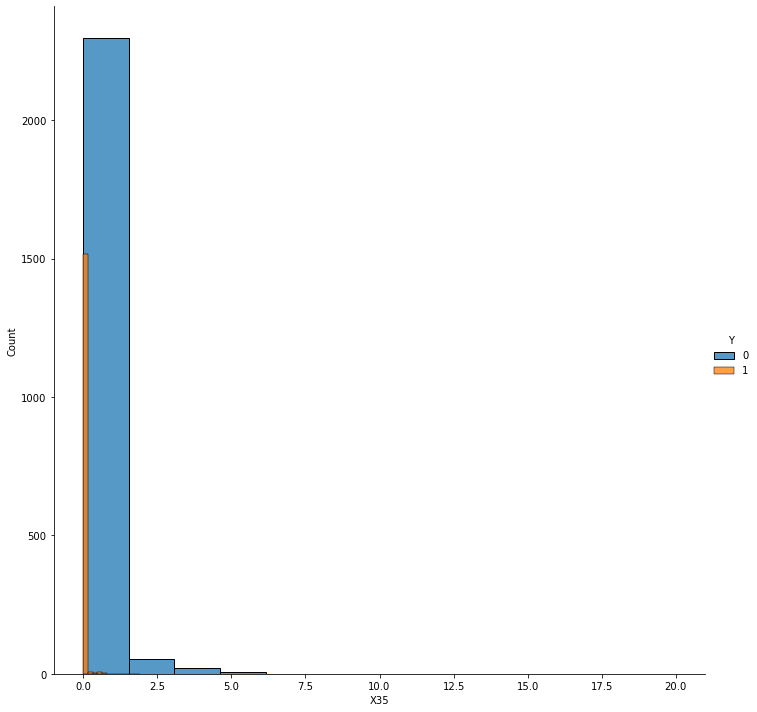

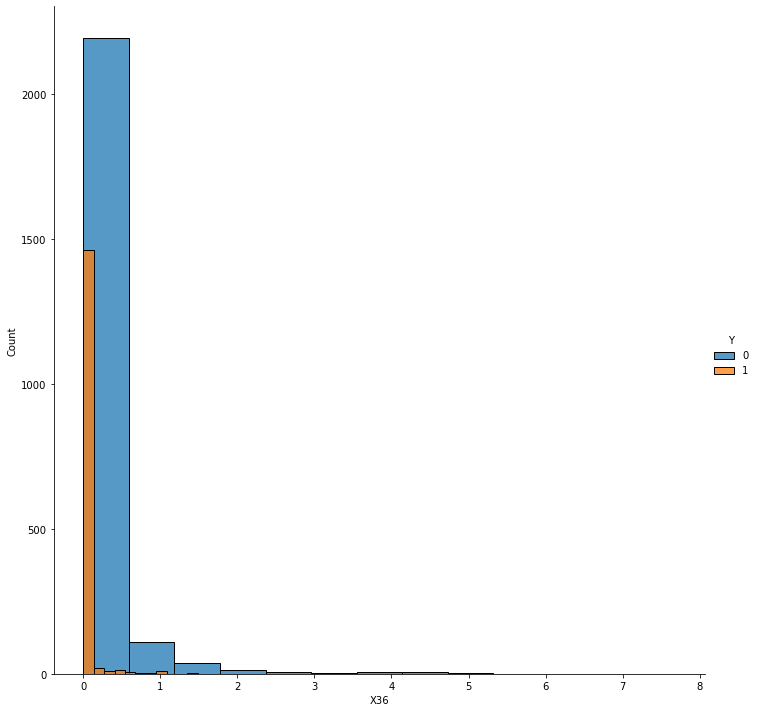

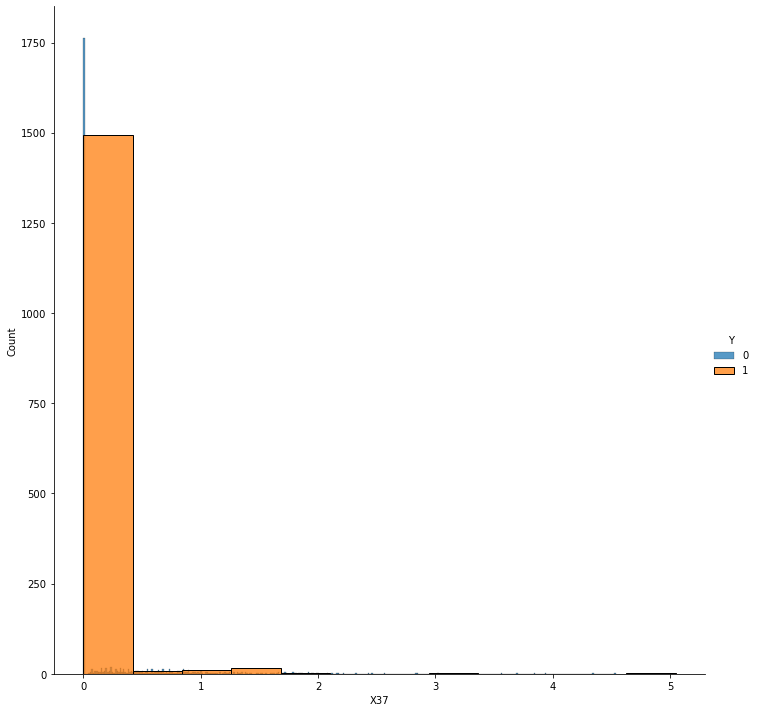

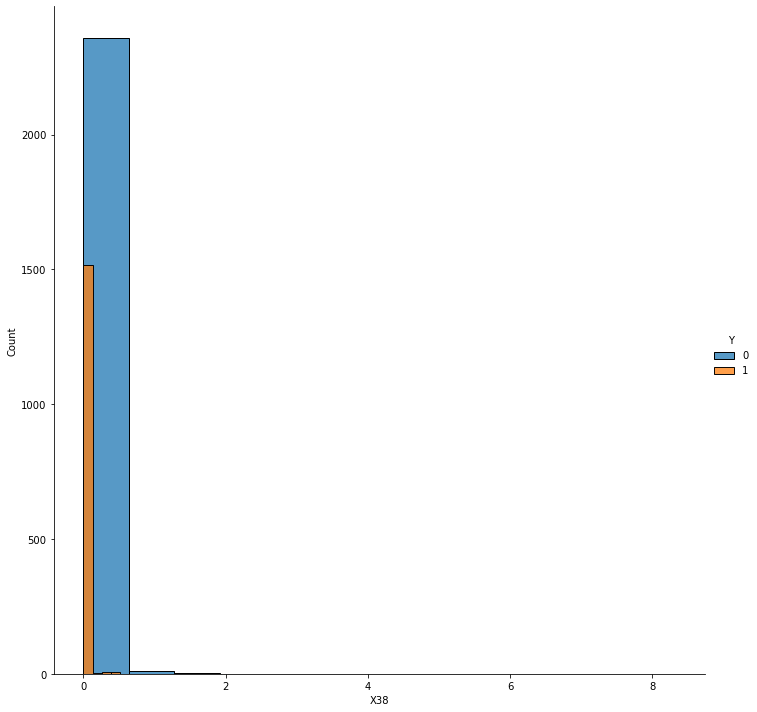

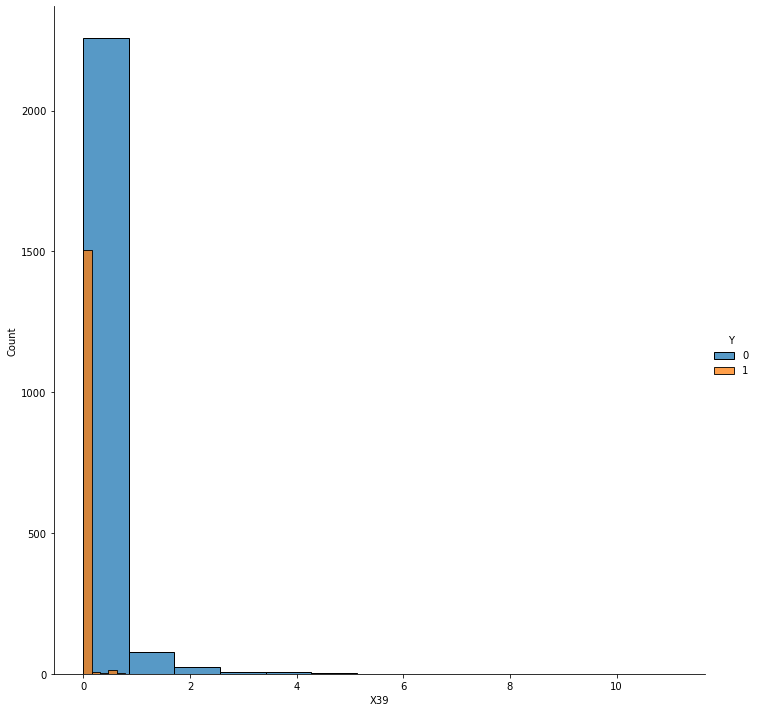

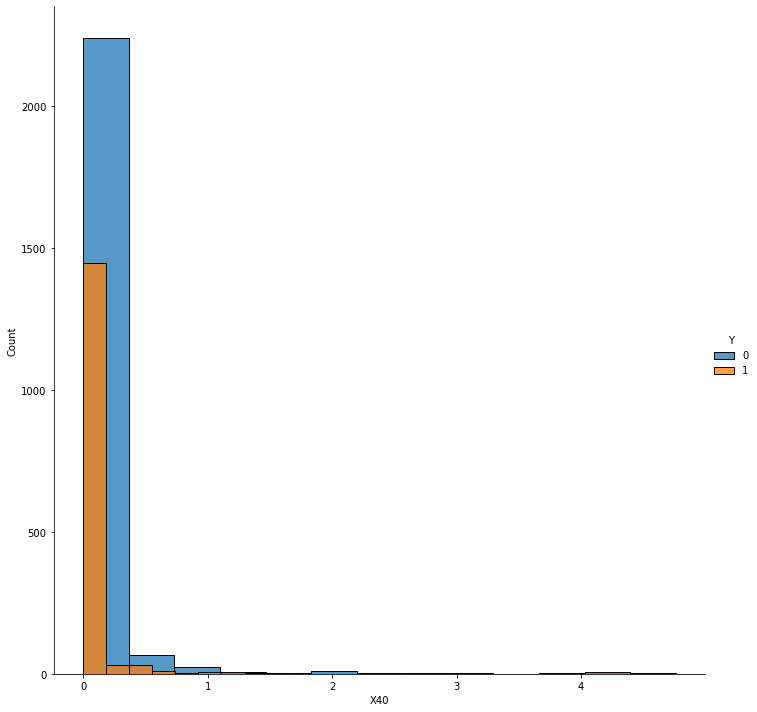

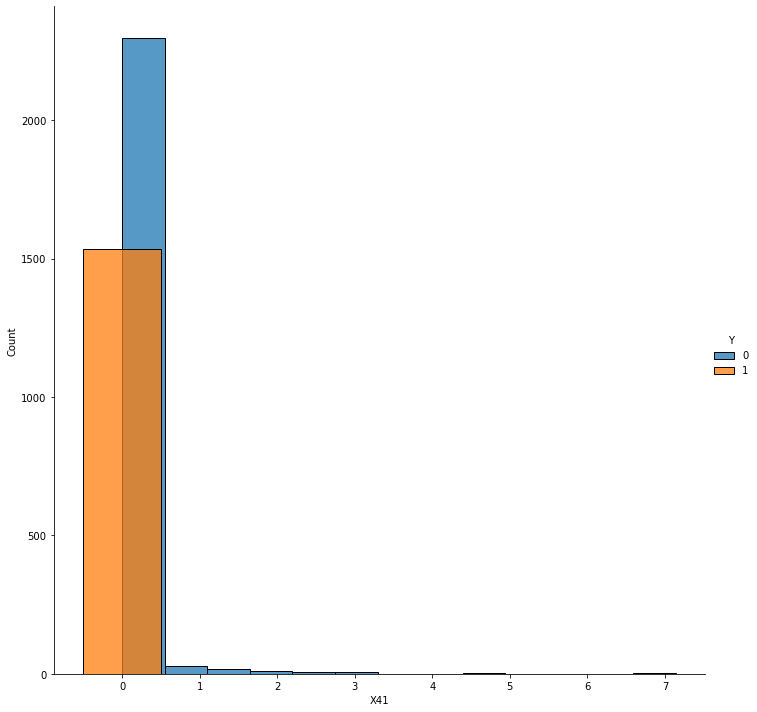

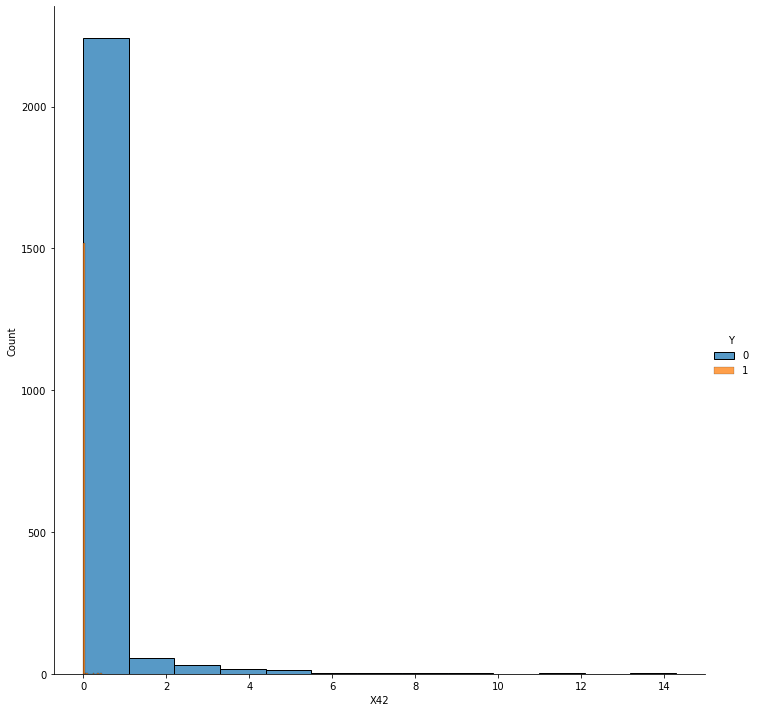

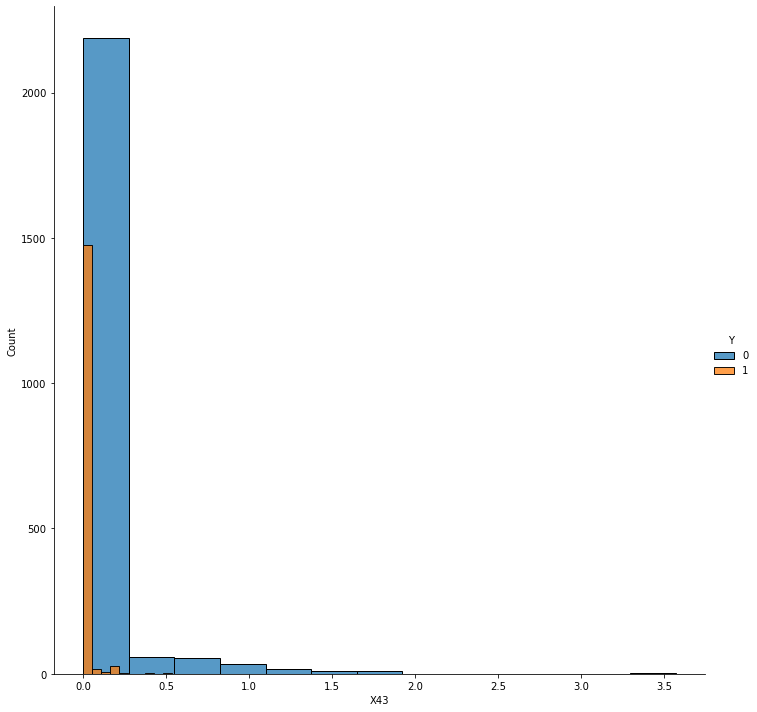

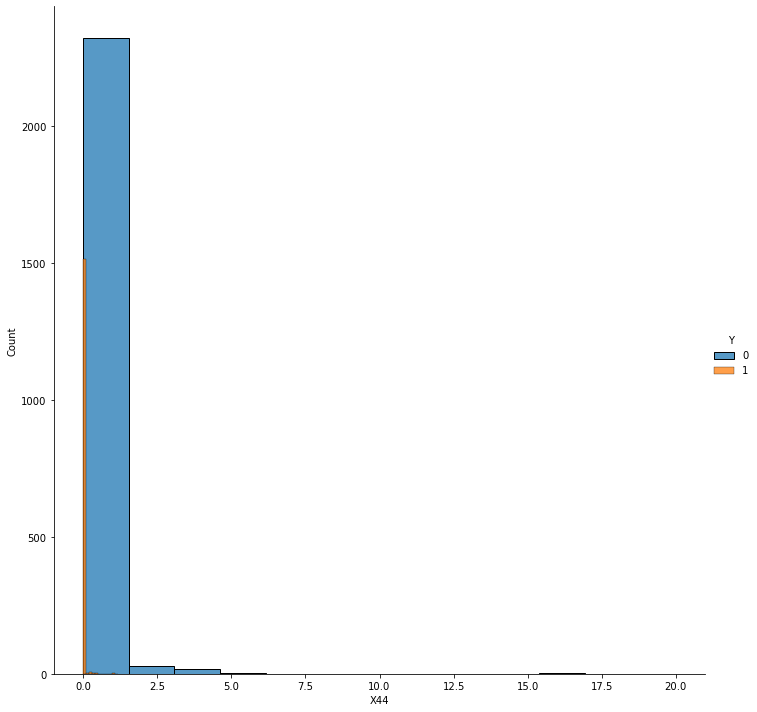

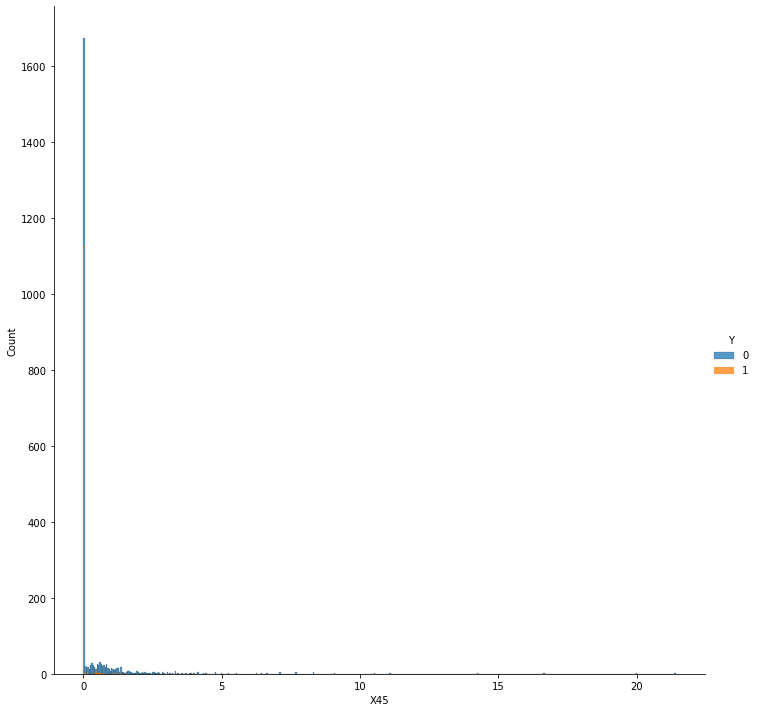

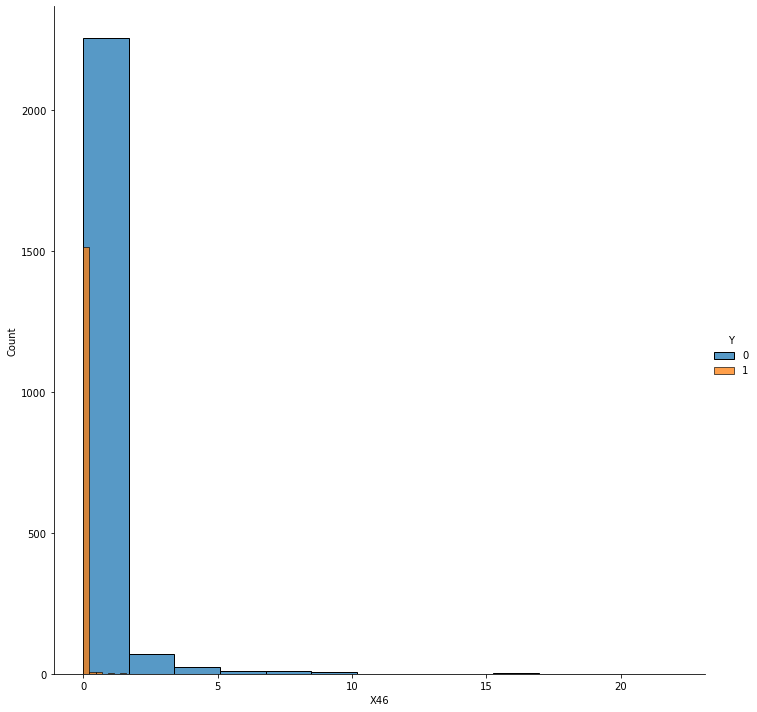

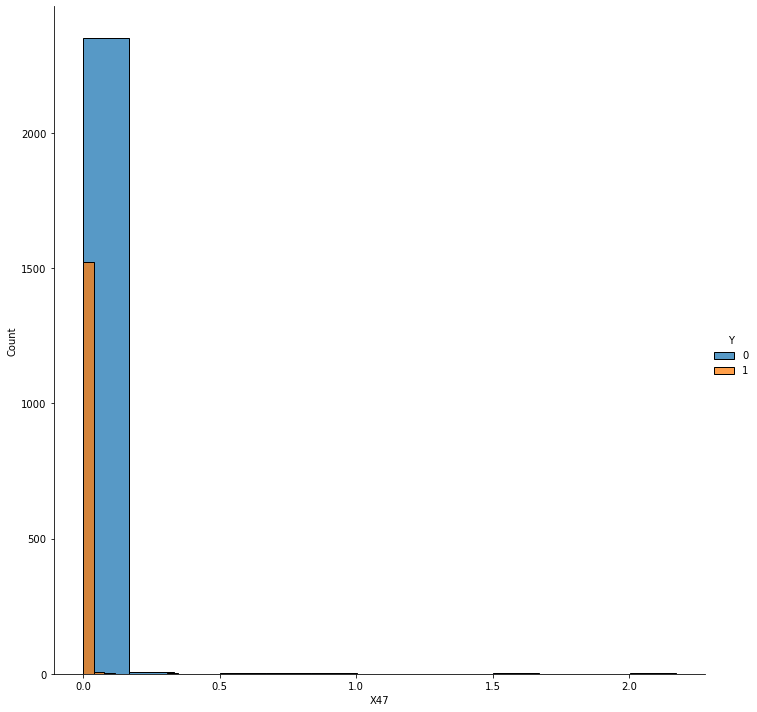

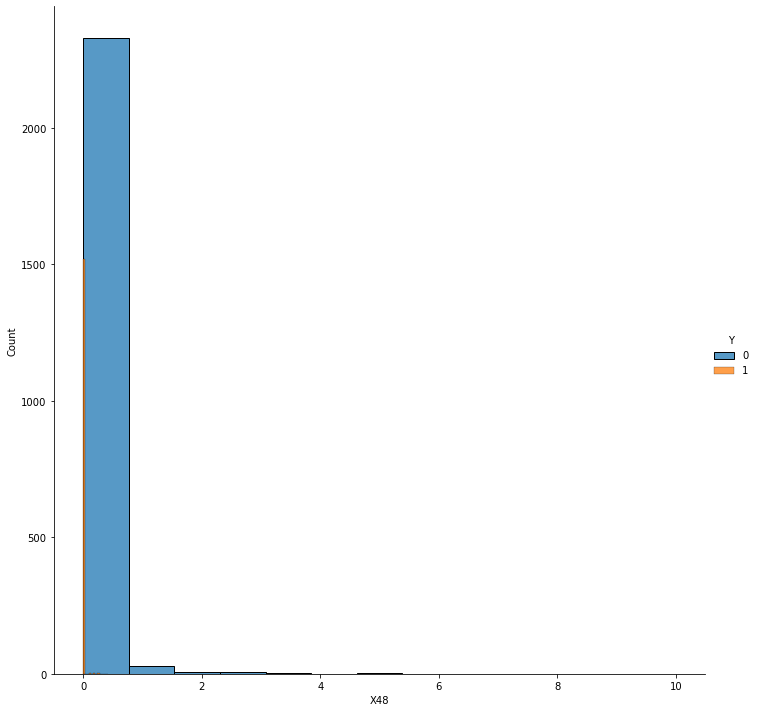

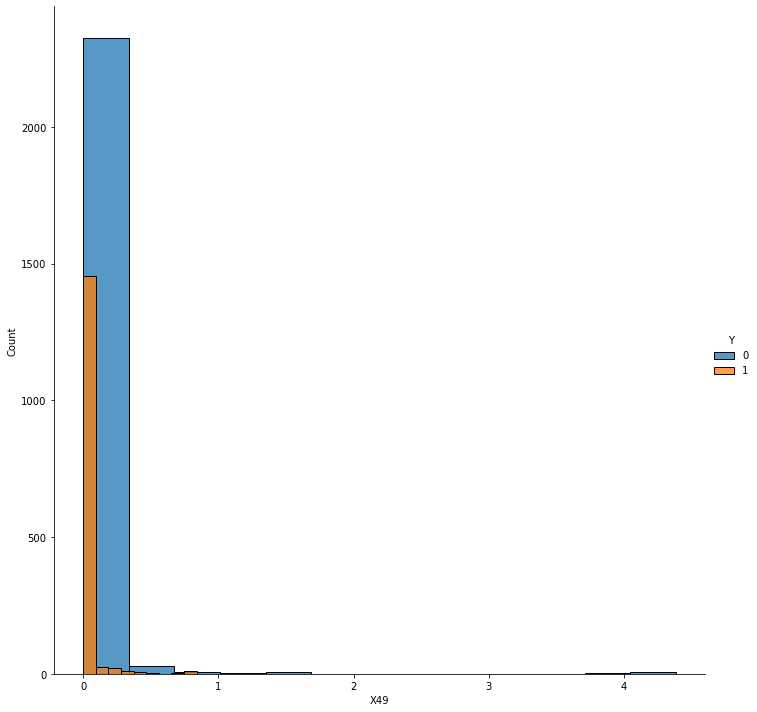

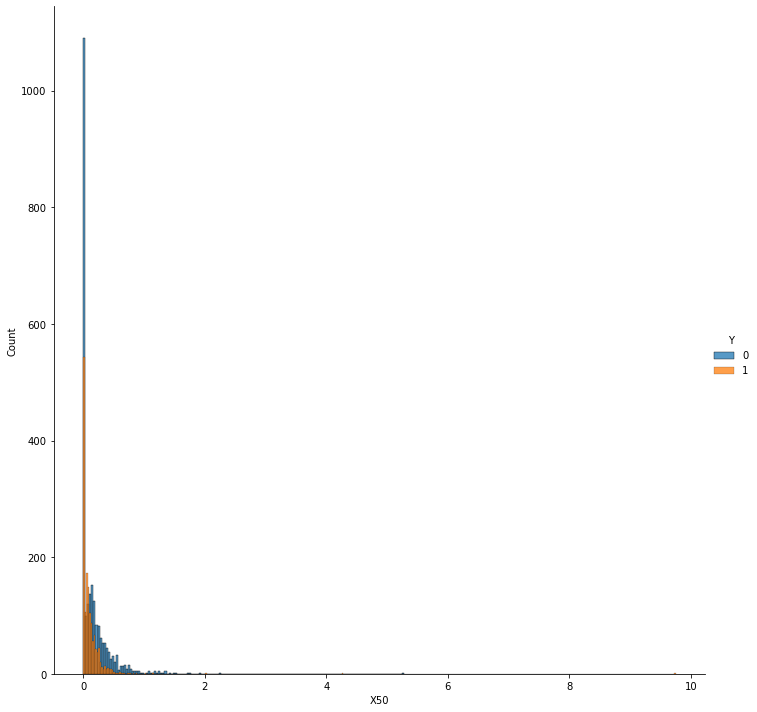

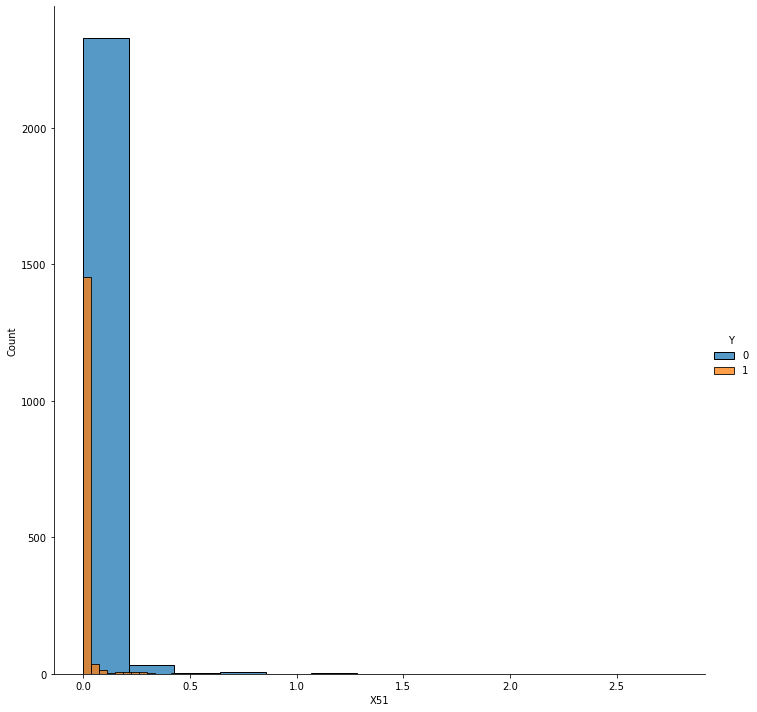

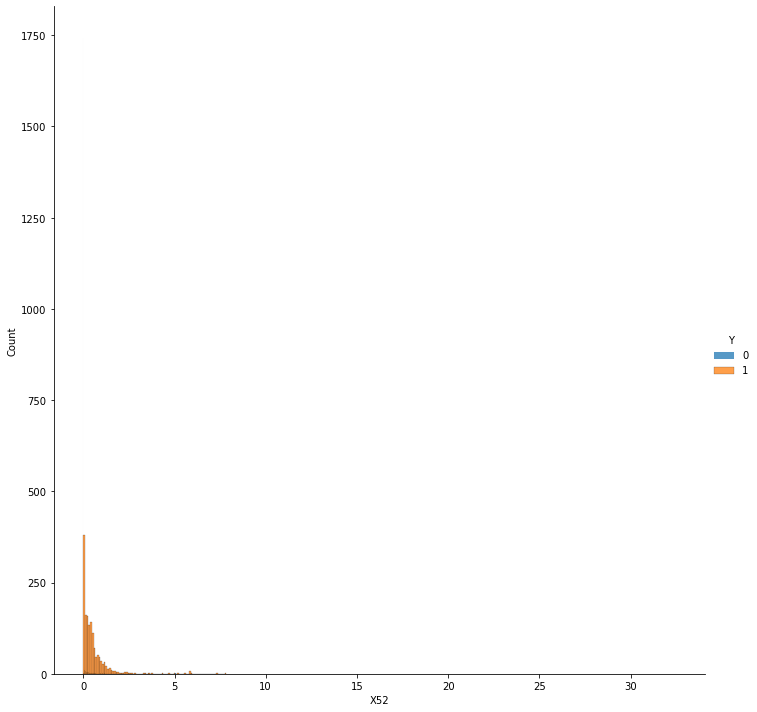

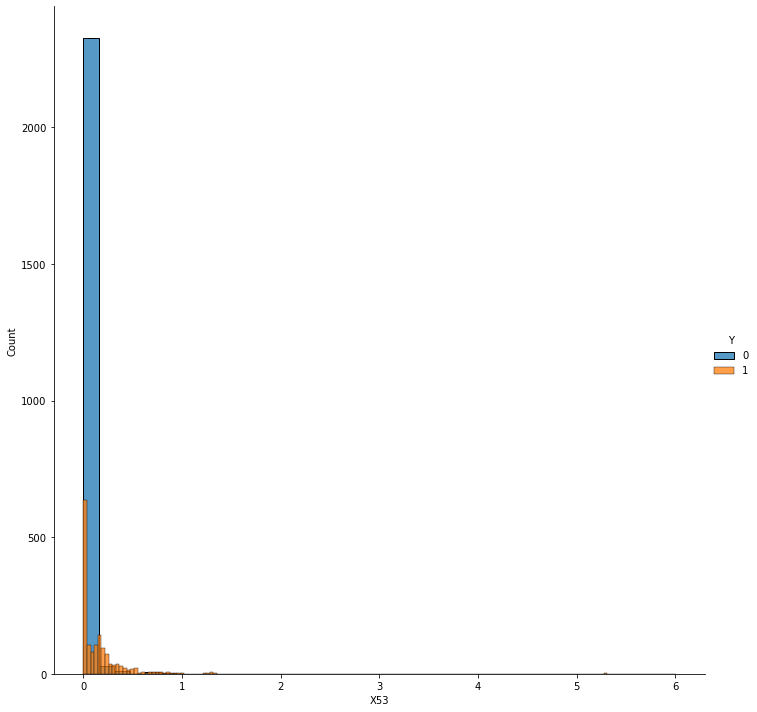

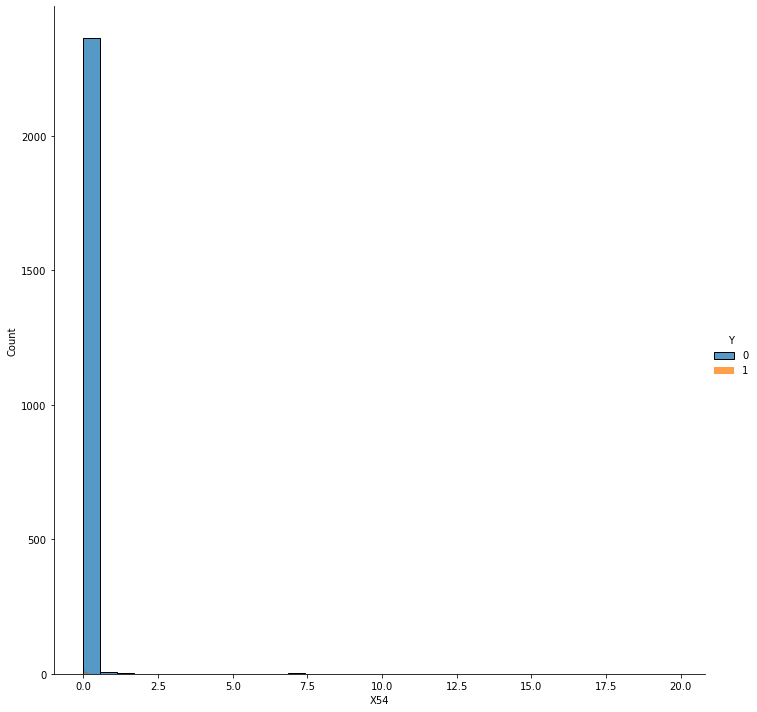

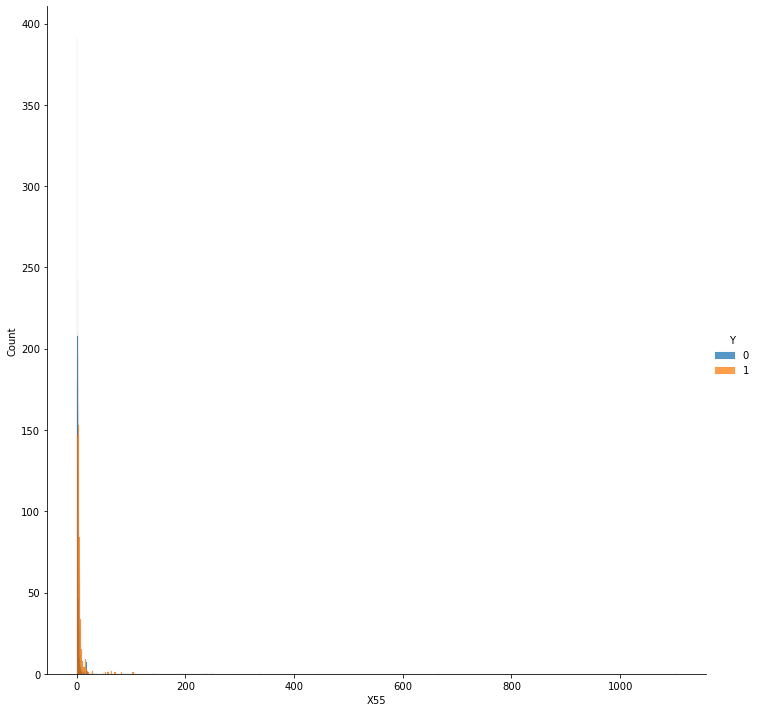

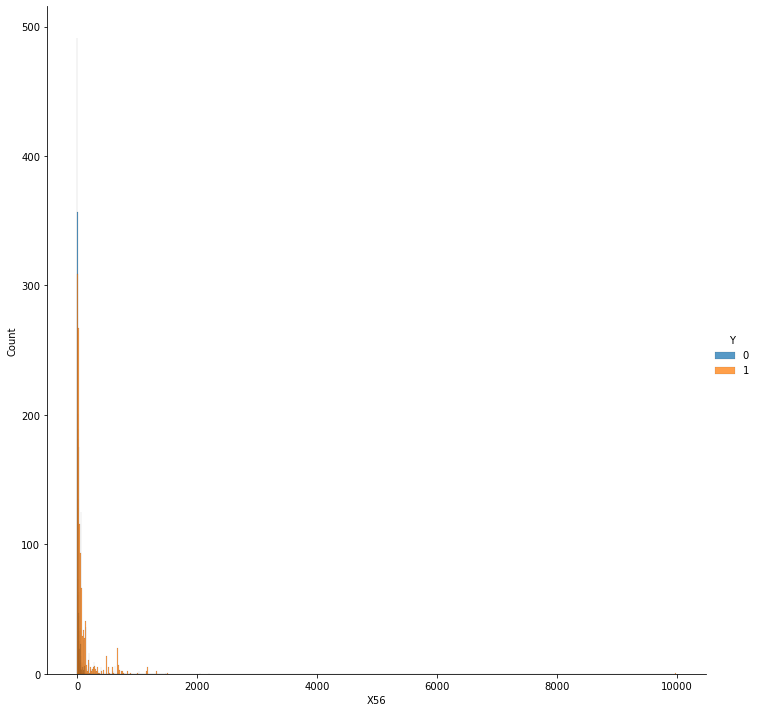

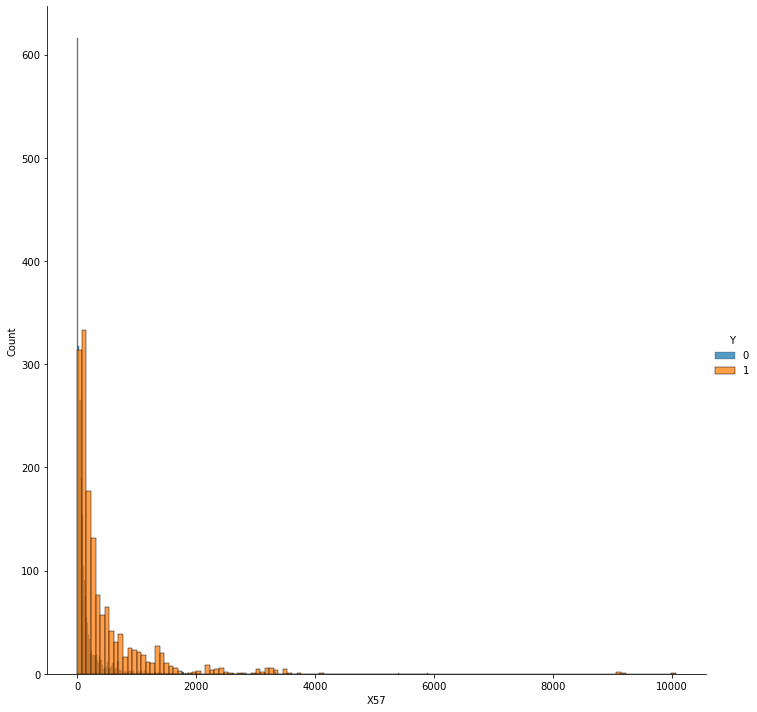

In [87]:
plt.figure(figsize=(10,8))
def plot_histplot(df):
    for column in df.columns[:57]:
        sns.FacetGrid(df, hue='Y', height=10) \
        .map(sns.histplot, column) \
       .add_legend()
        plt.show()
        
plot_histplot(train)

#### above histplots helps us to find distribution of feature values with respect to labels
#### Observations - 
#### 1) Some features are heavily biased towards label 0, and remaining towards label 1.
#### 2) Most of the features are biased to one of the labels and very few are having somewhat equal distribution.


In [112]:
# Lets oberv "KDE" plot
def plot_kde(df):
    for column in df.columns[:57]:
        graph = sns.FacetGrid(train,hue='Y',height = 10)
        graph.map(sns.distplot,column).add_legend()
        plt.title("KDE plot between 'X1' ans 'Label'")
        plt.show()

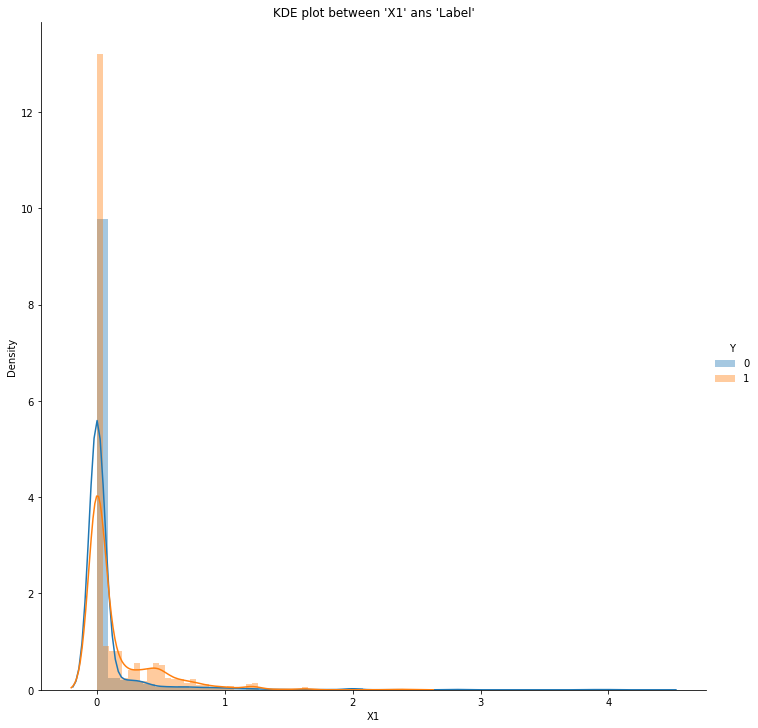

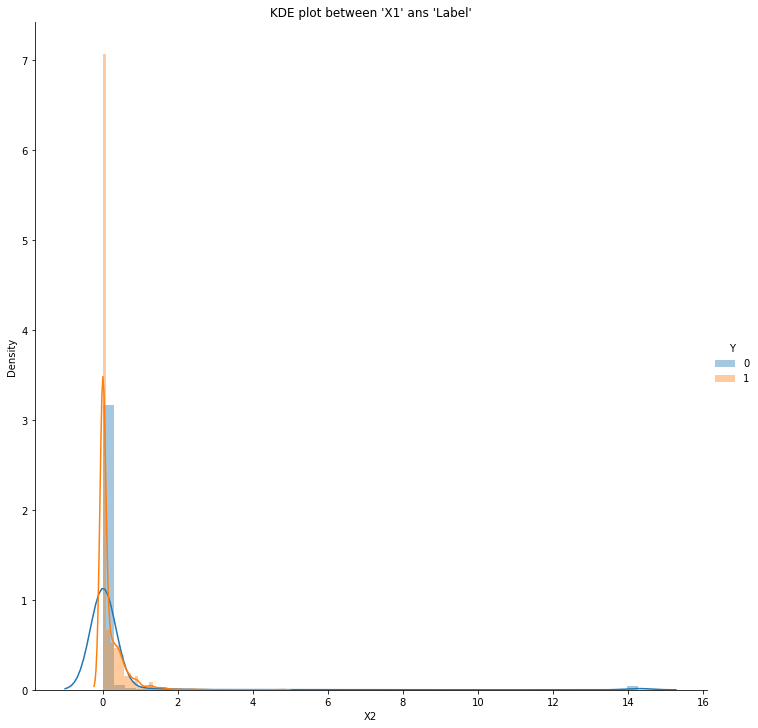

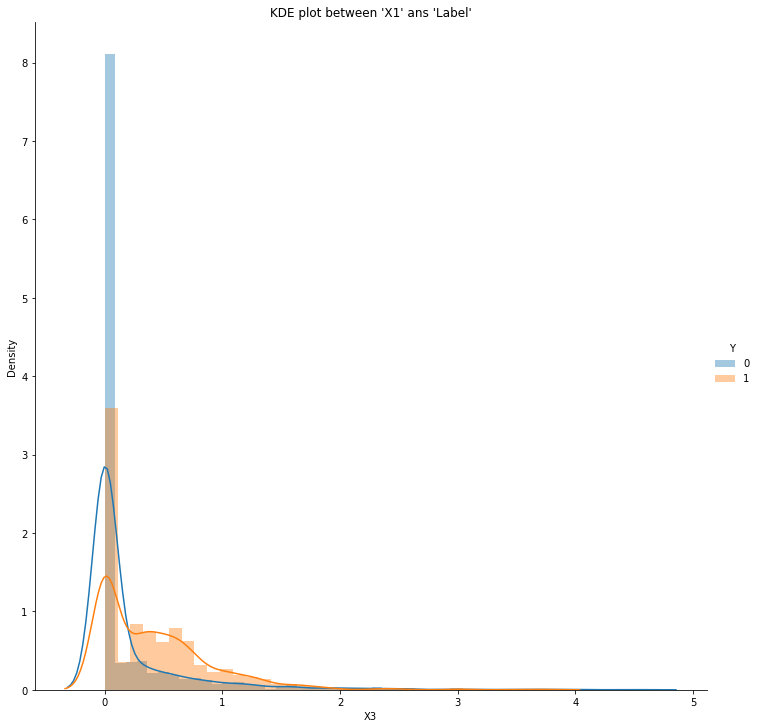

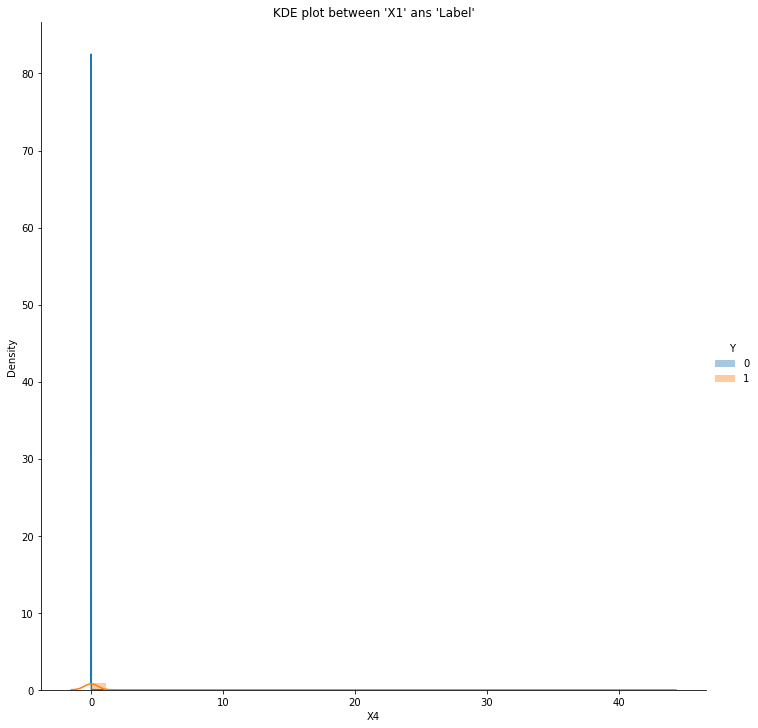

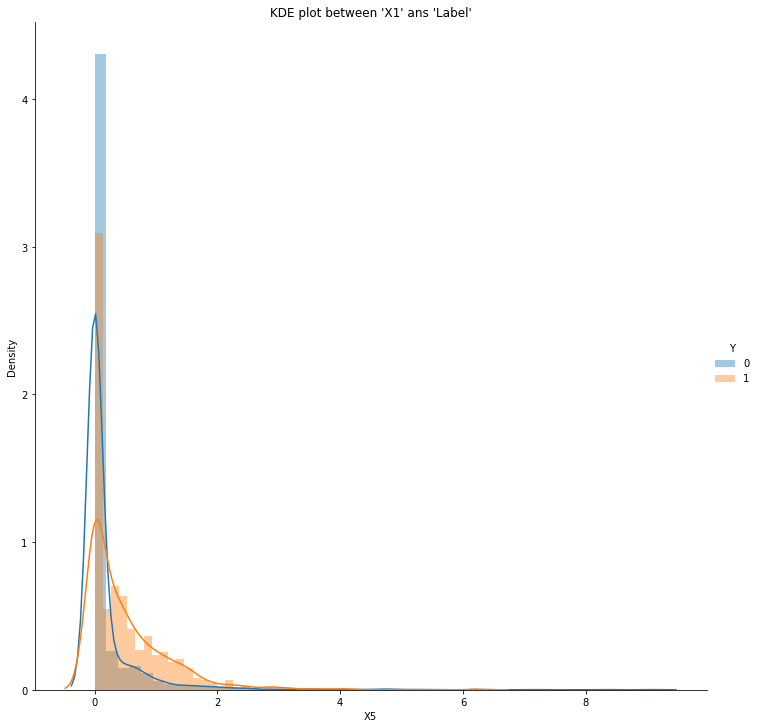

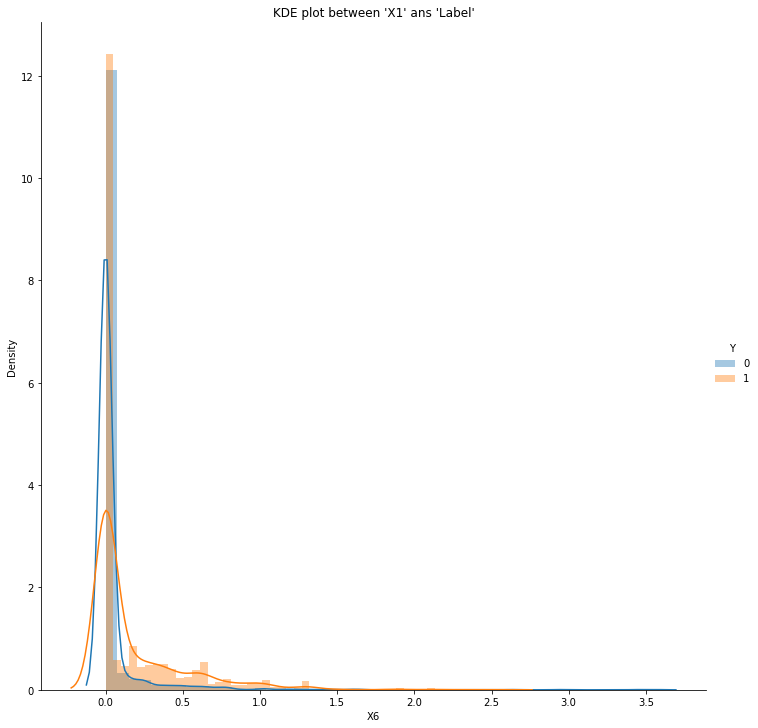

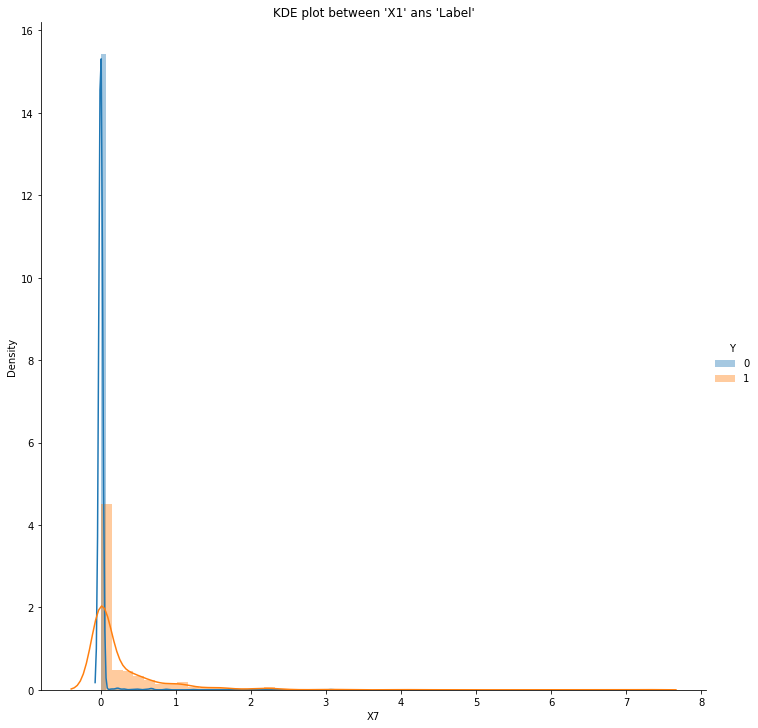

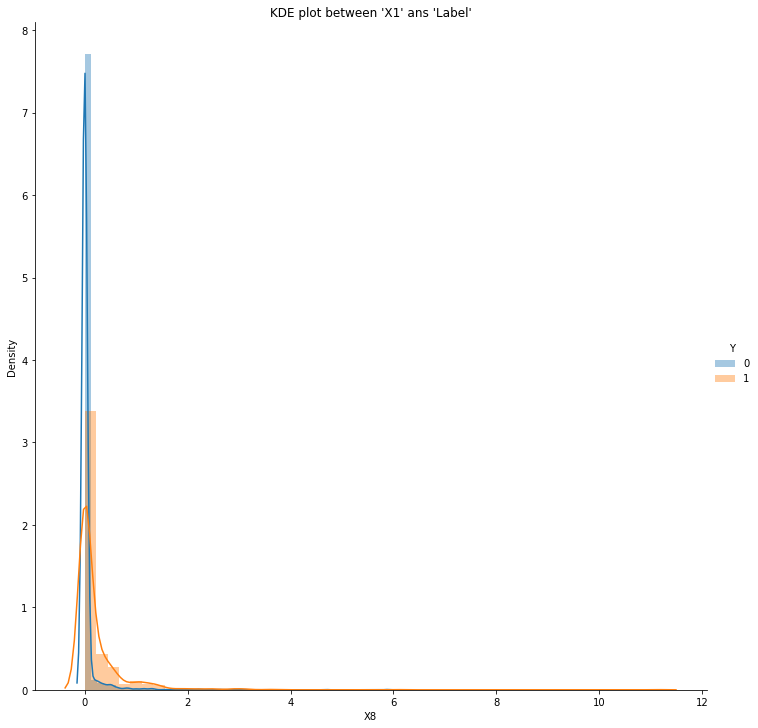

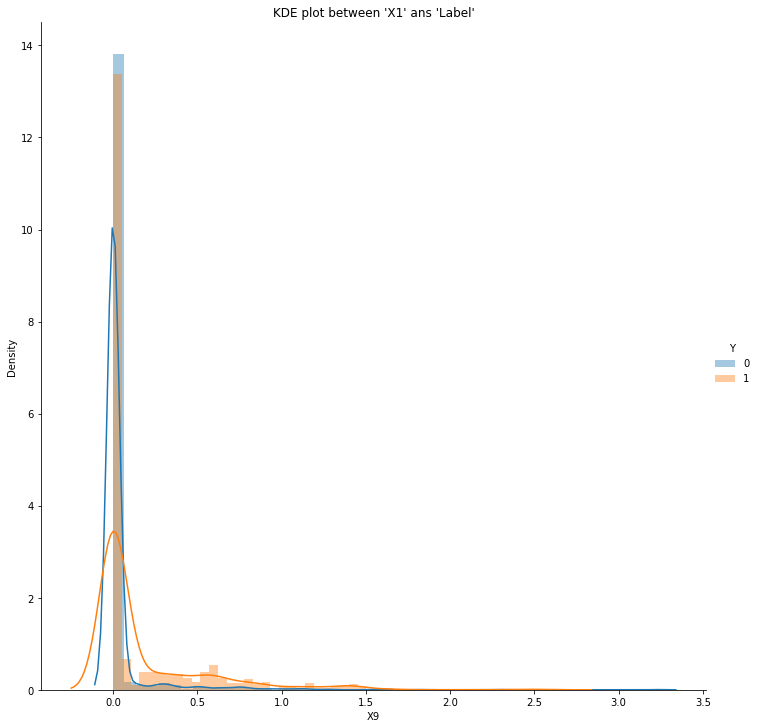

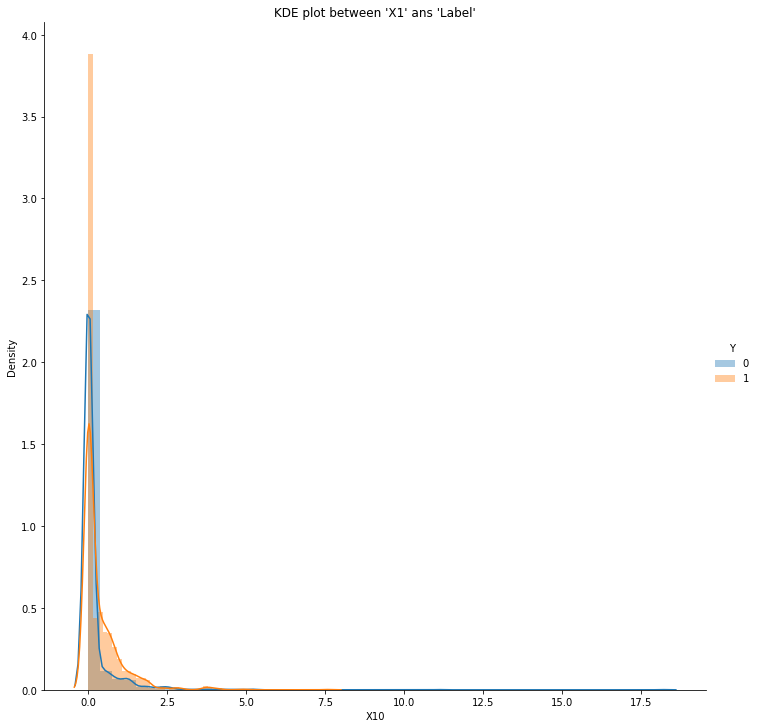

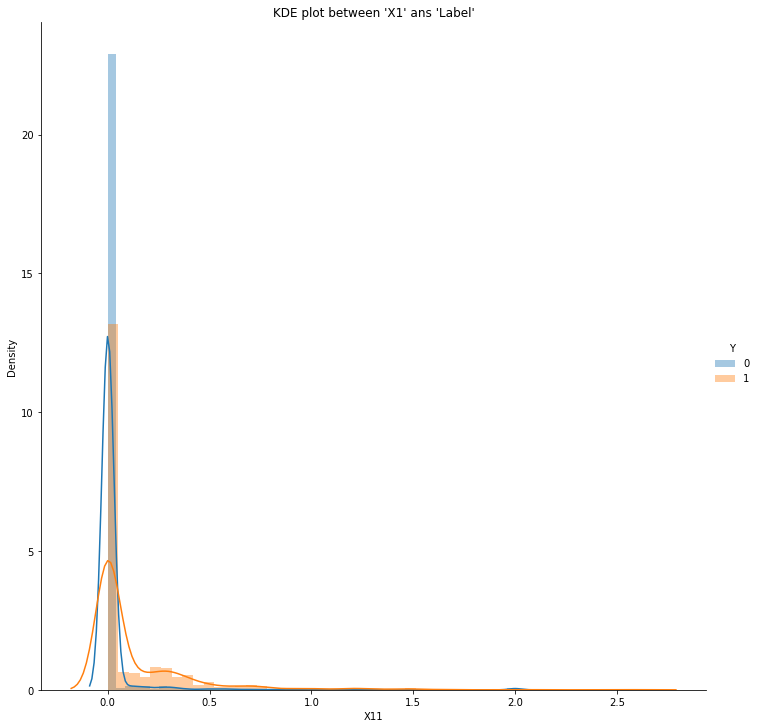

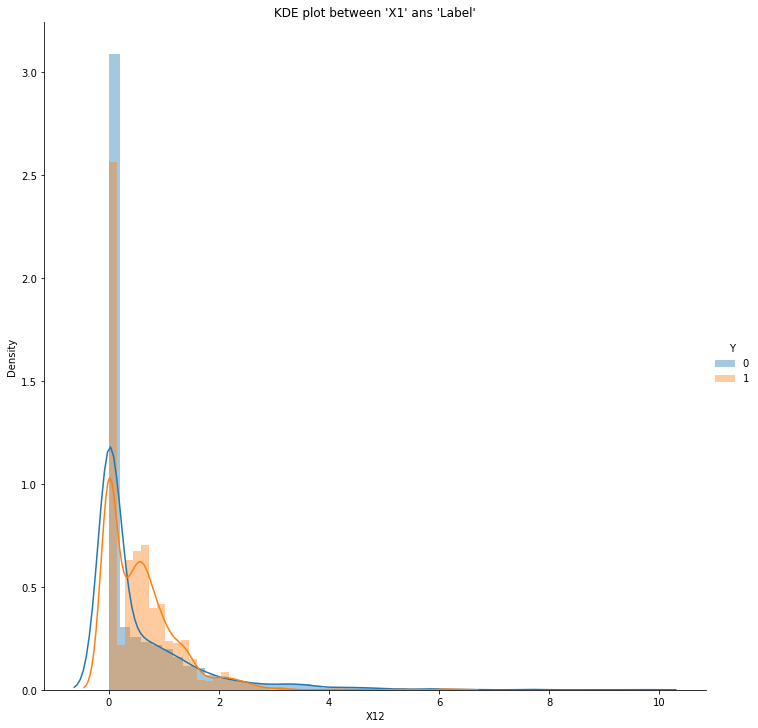

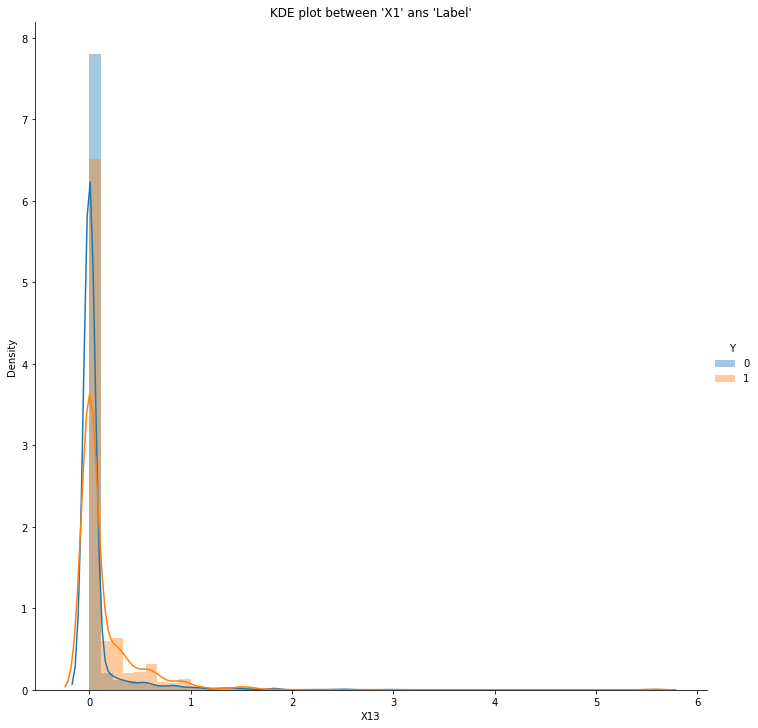

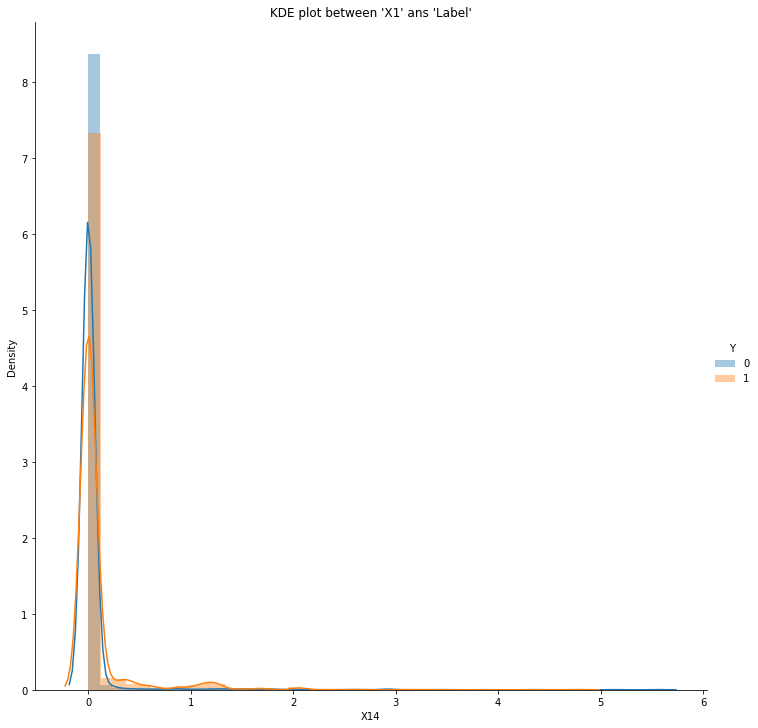

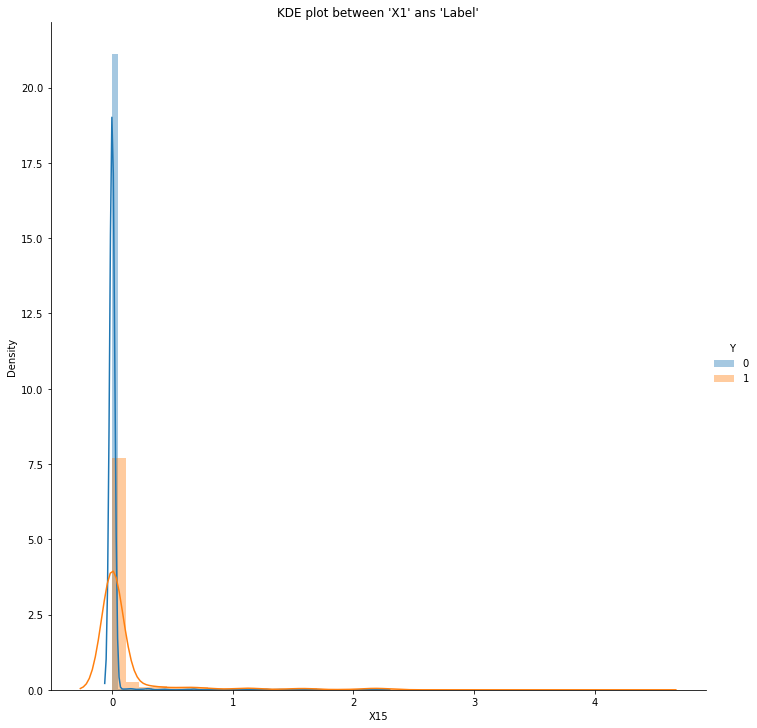

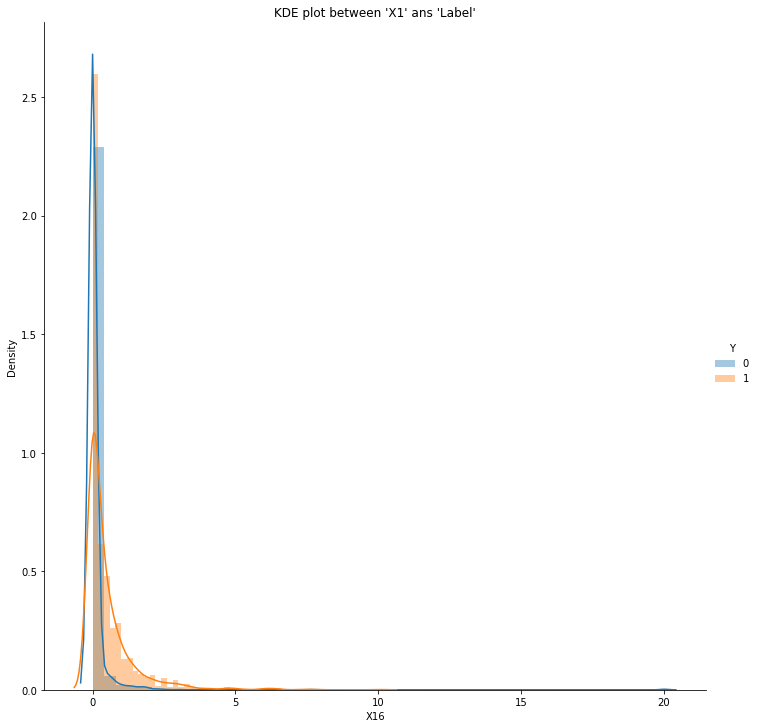

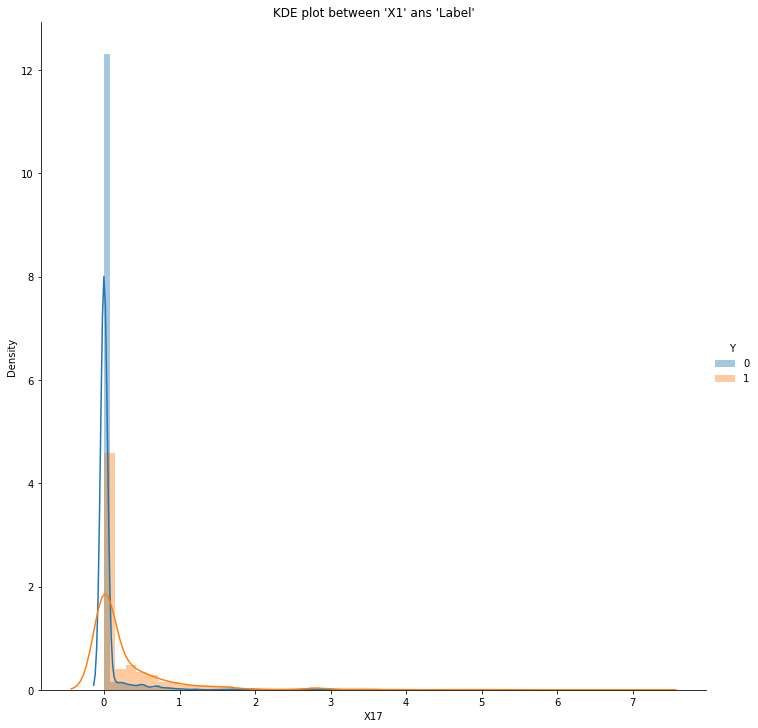

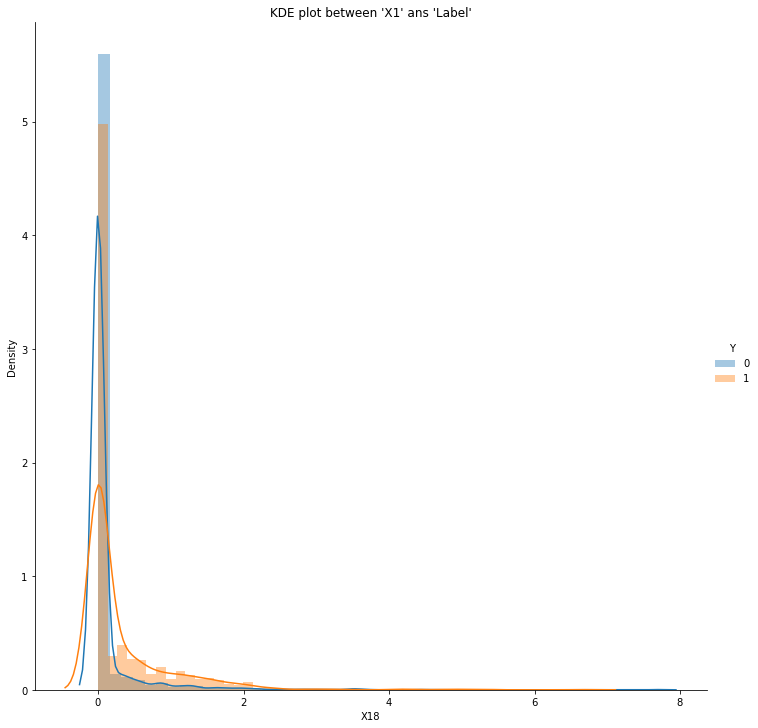

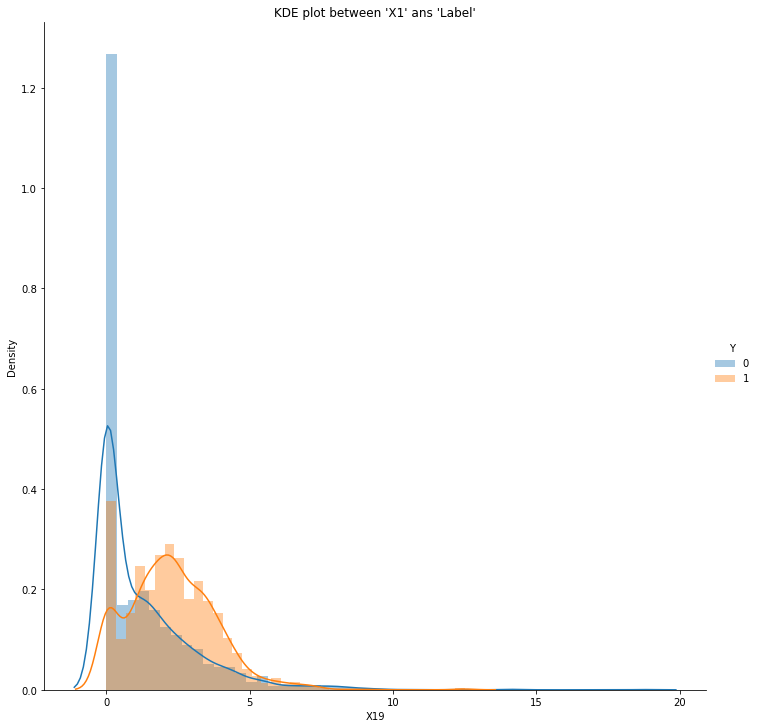

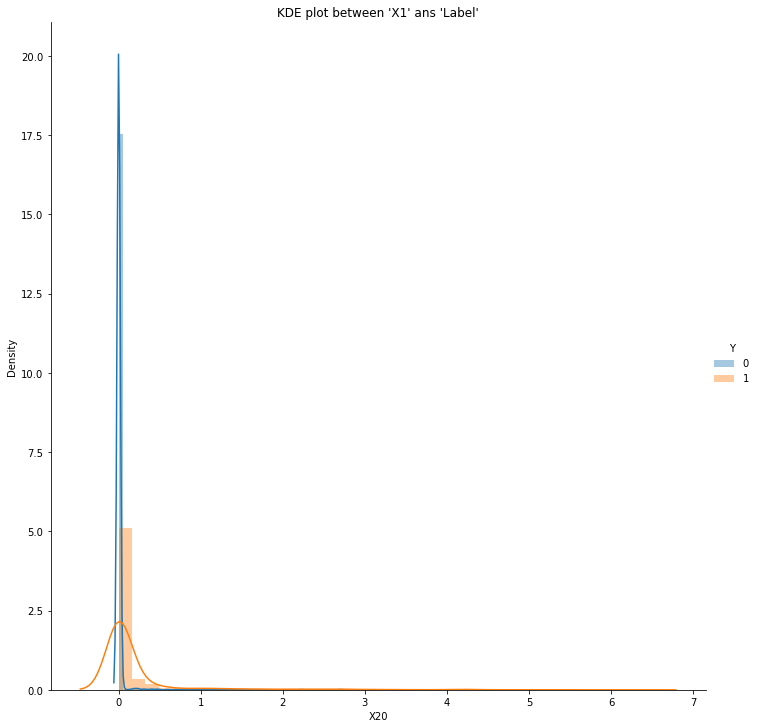

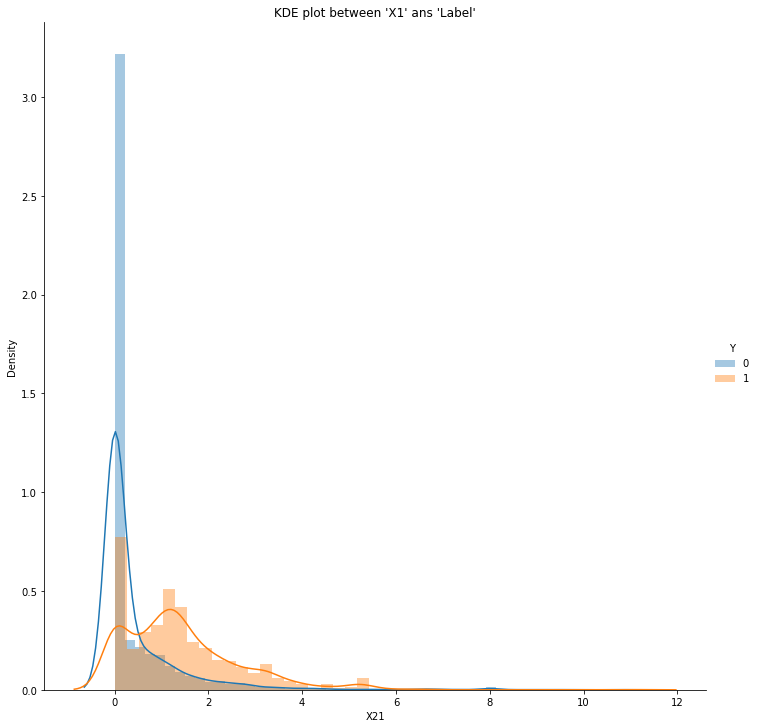

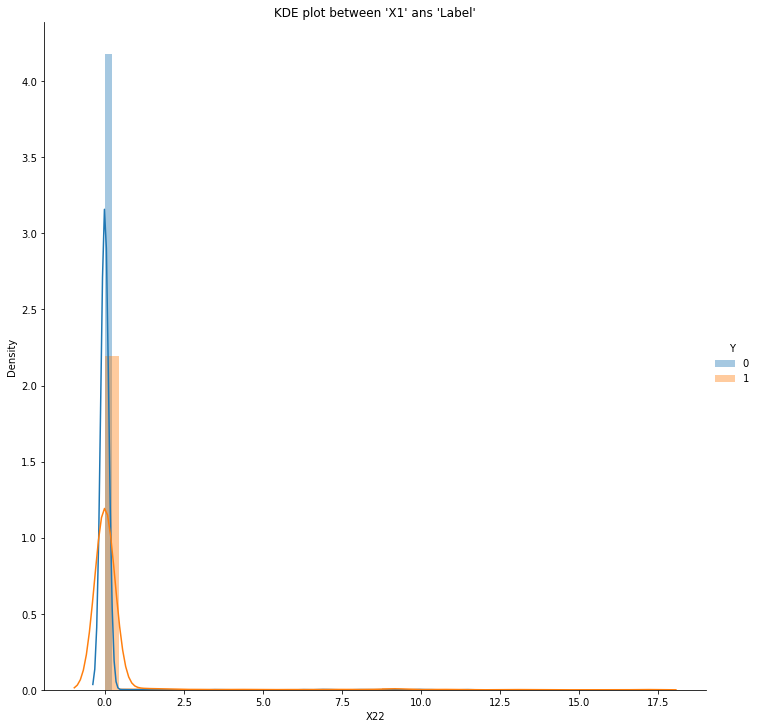

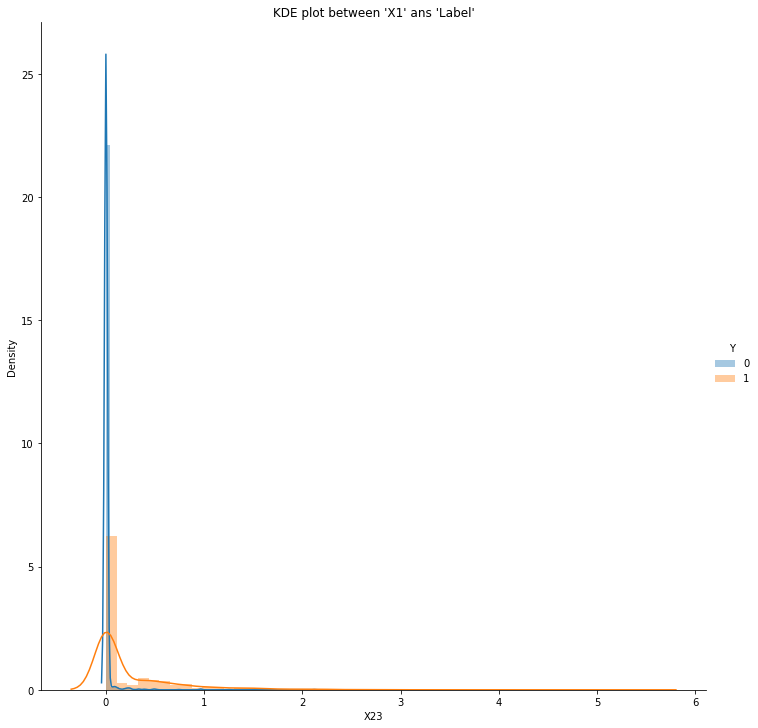

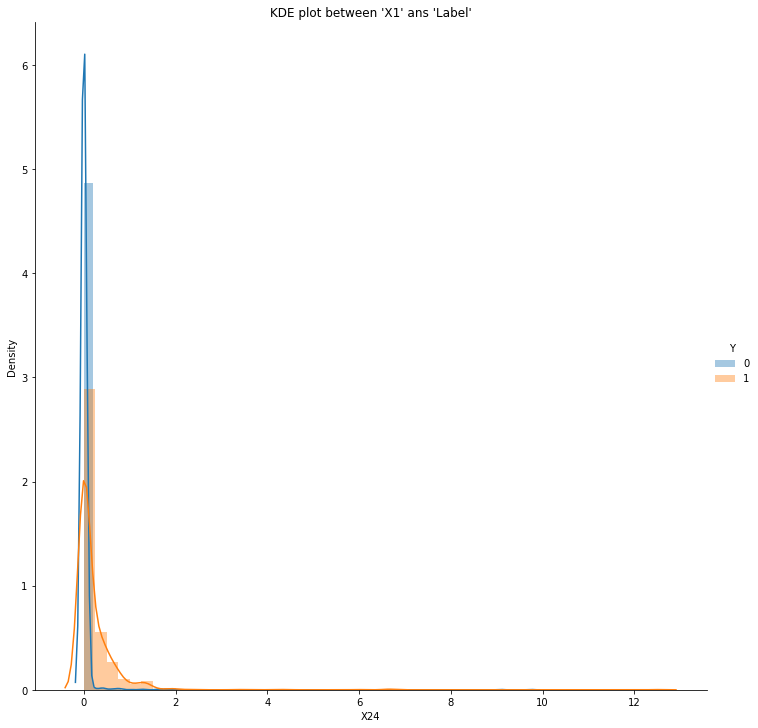

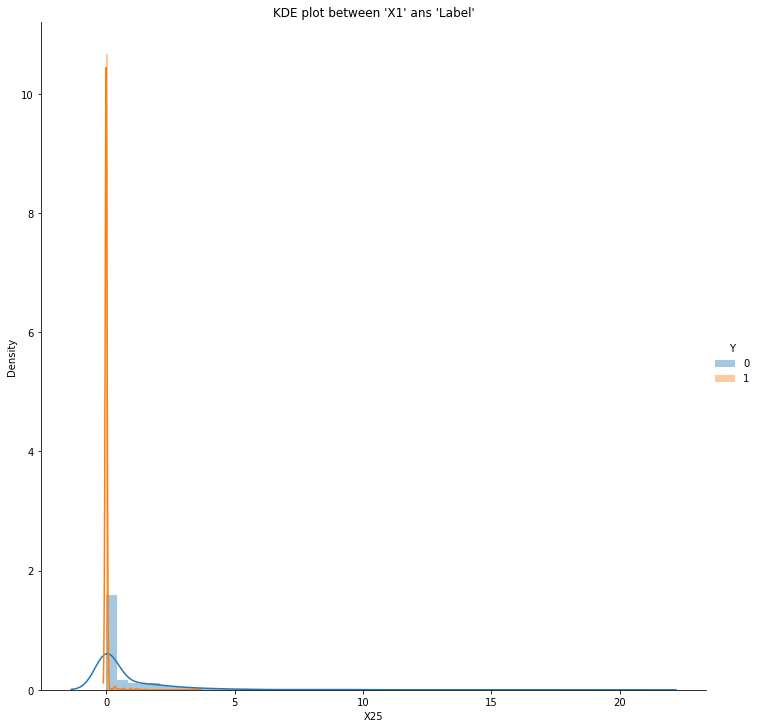

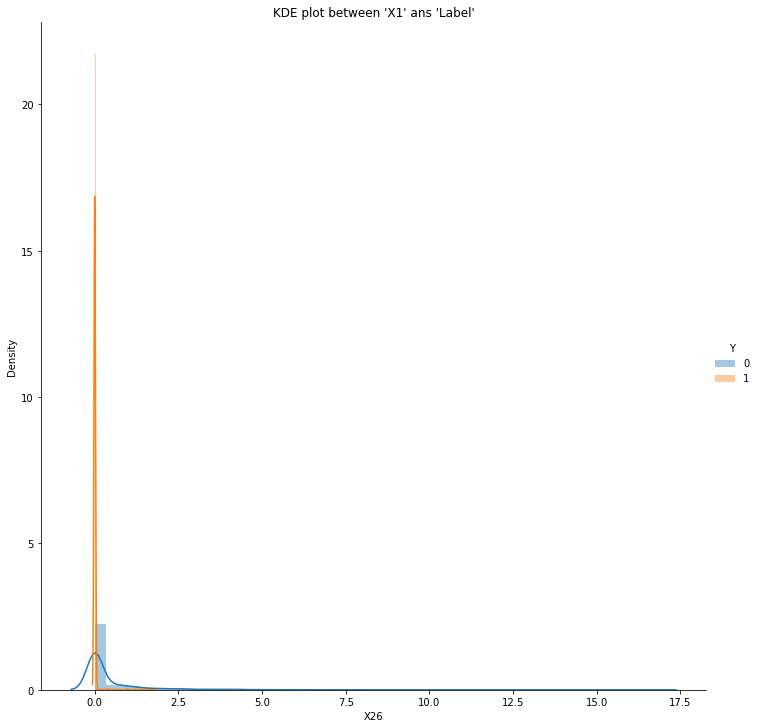

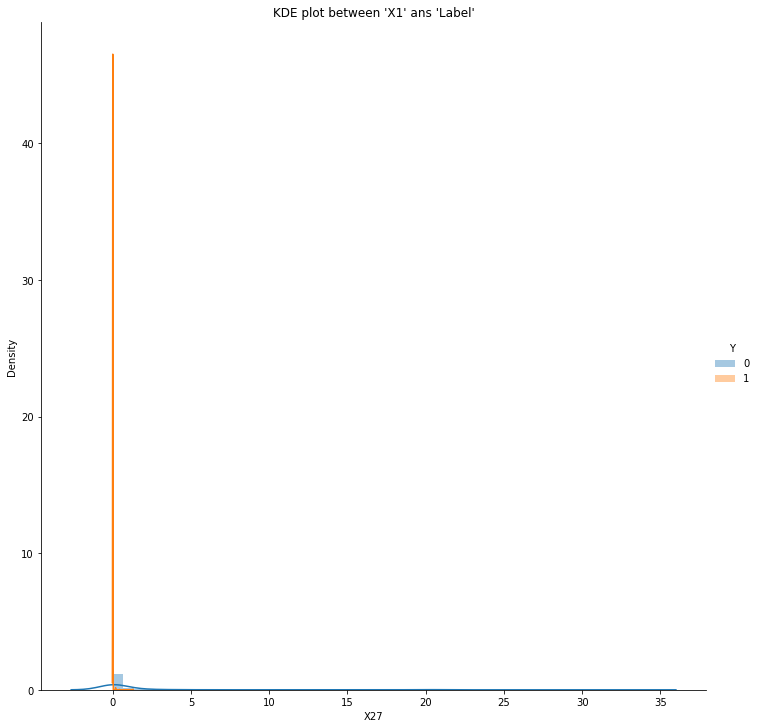

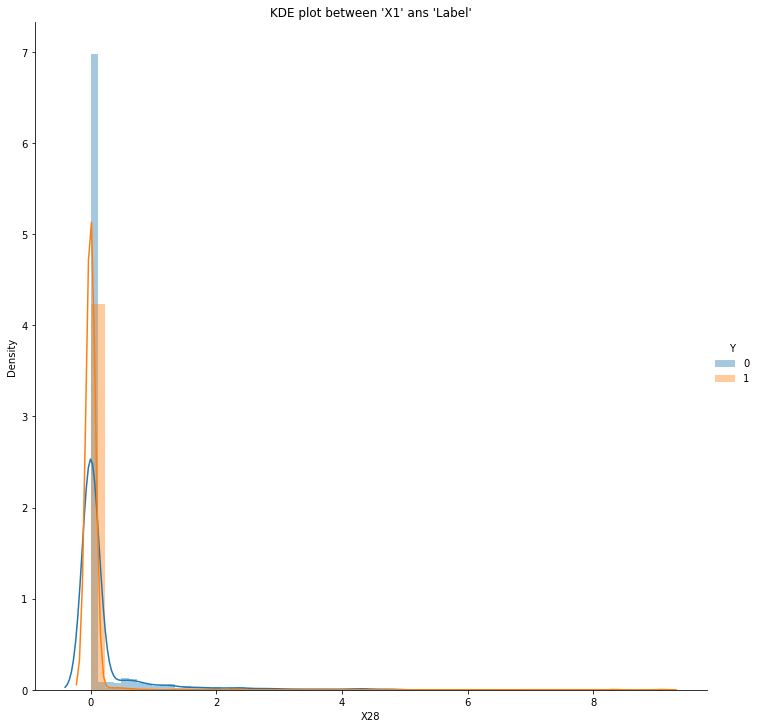

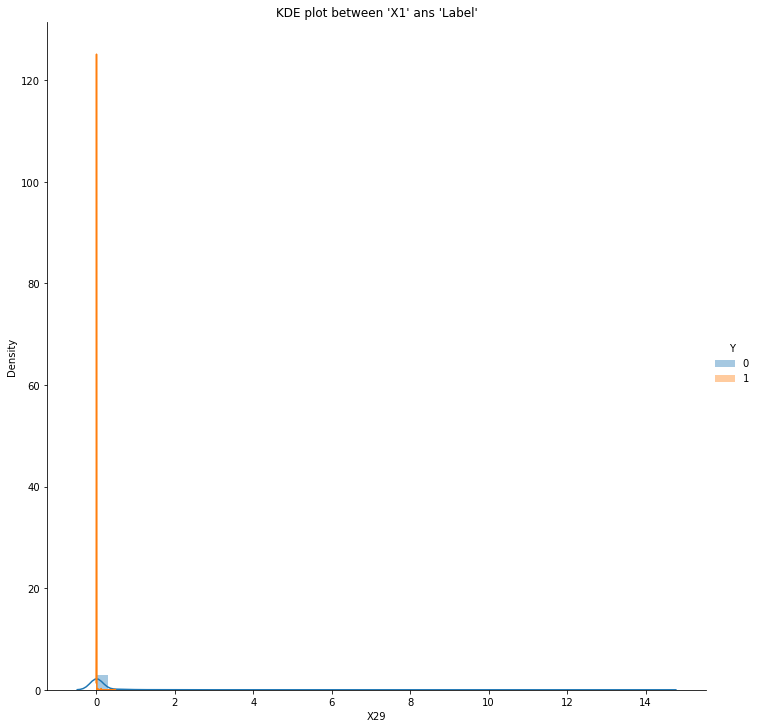

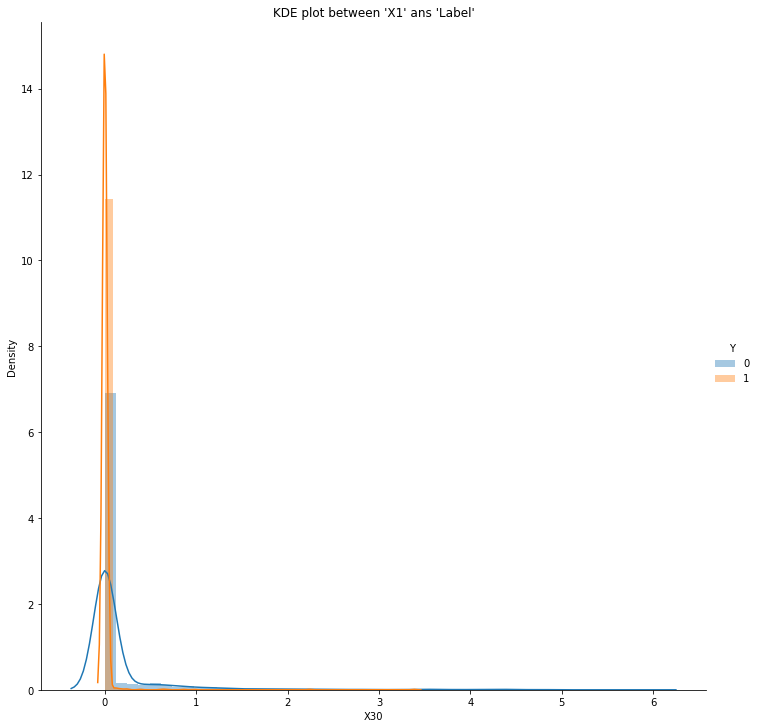

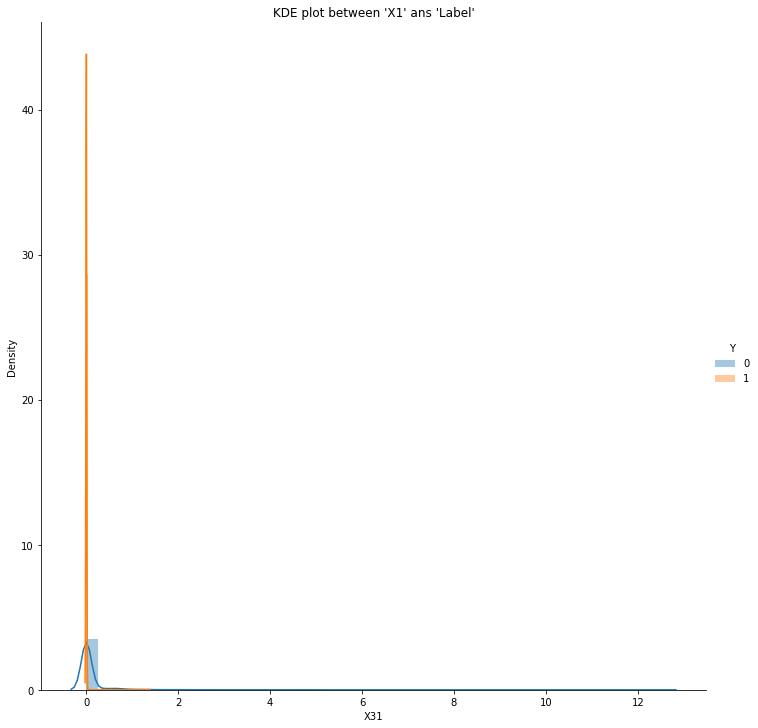

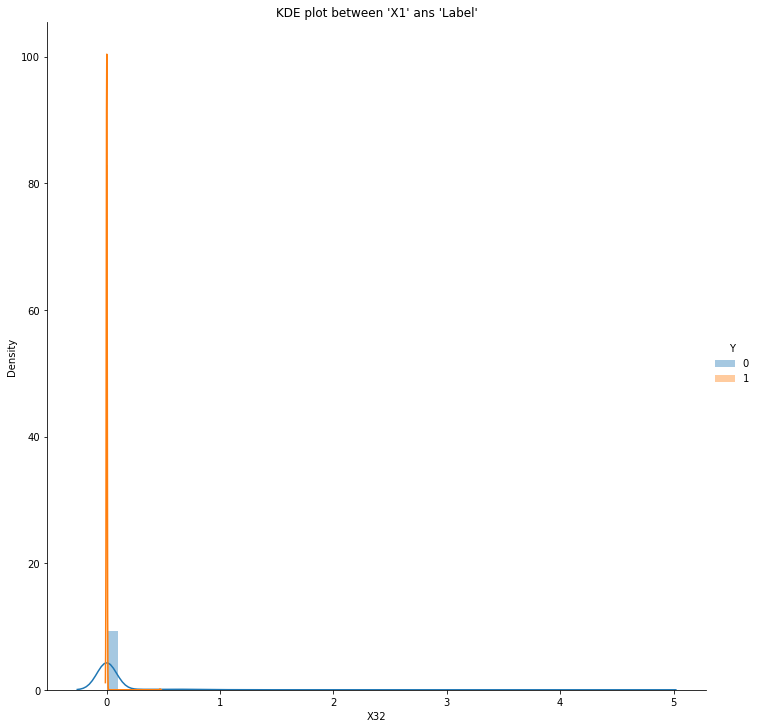

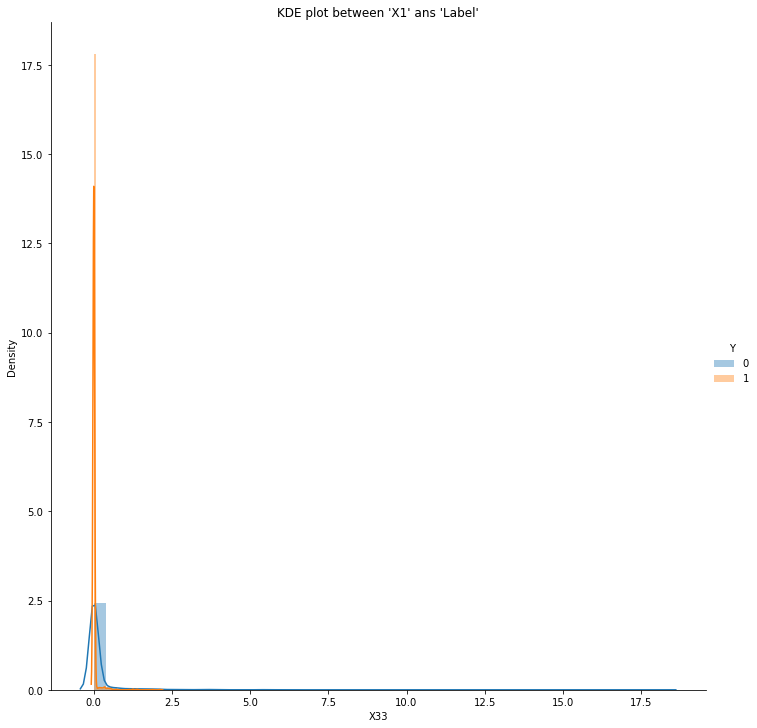

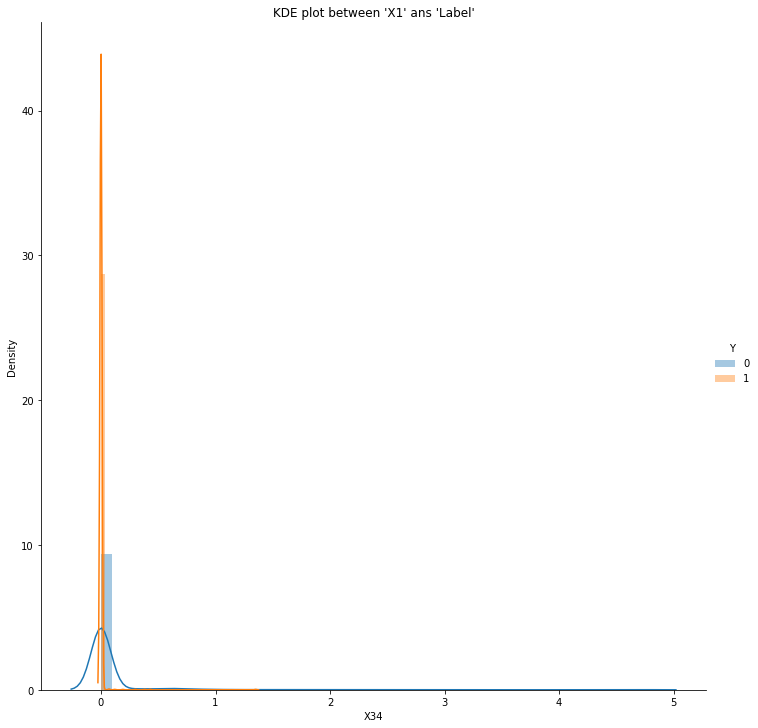

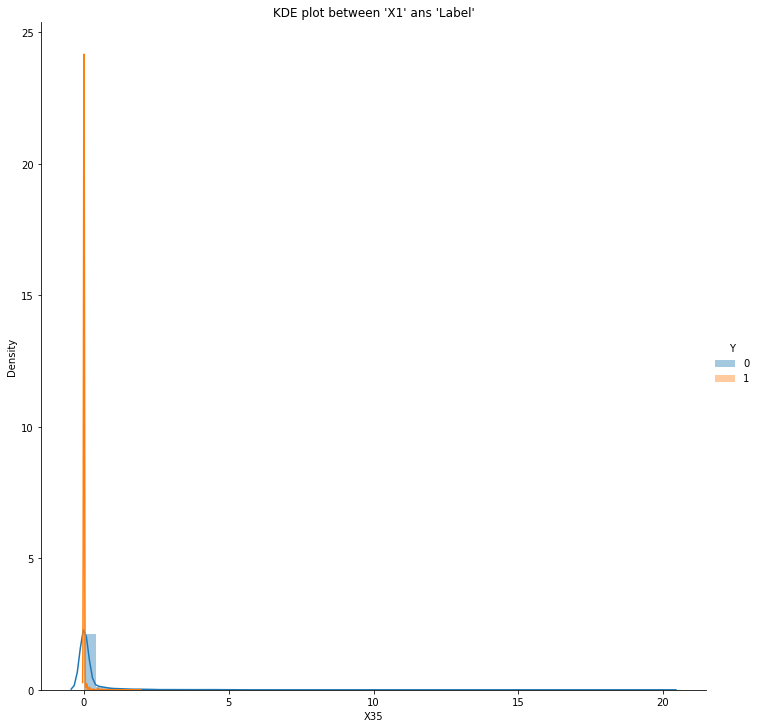

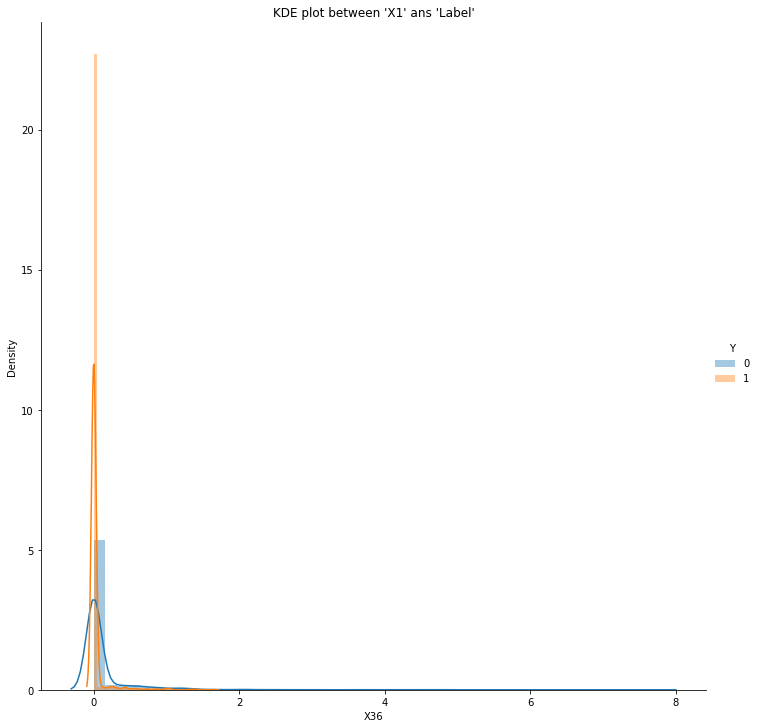

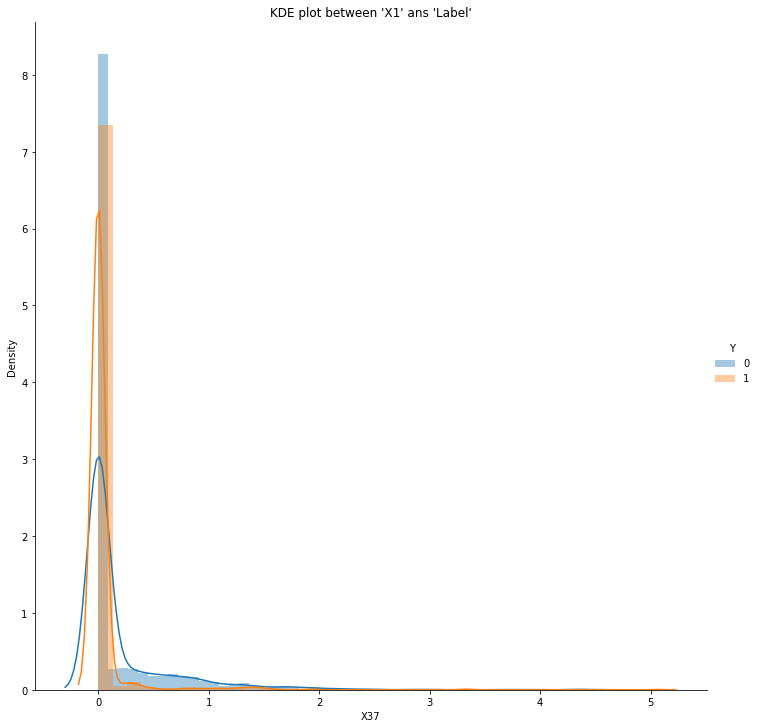

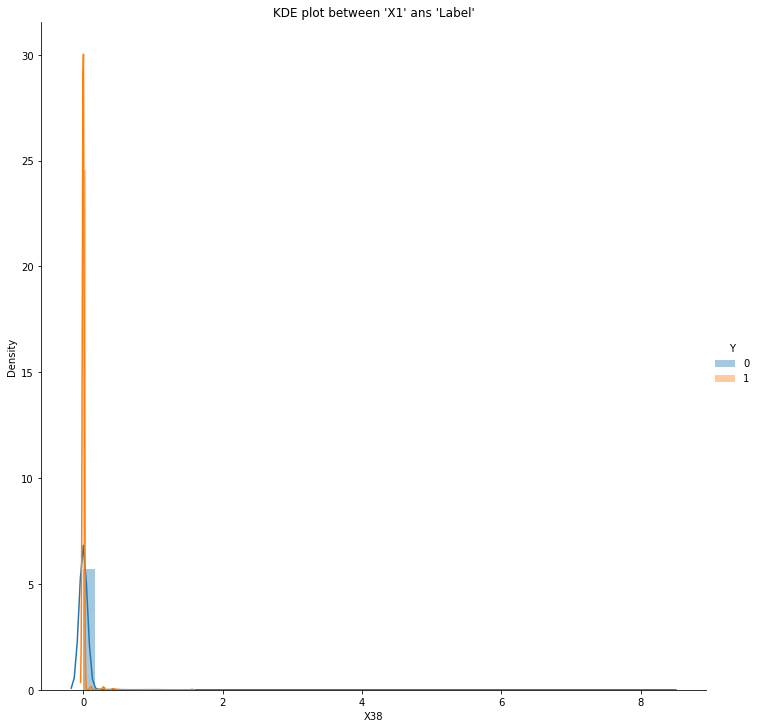

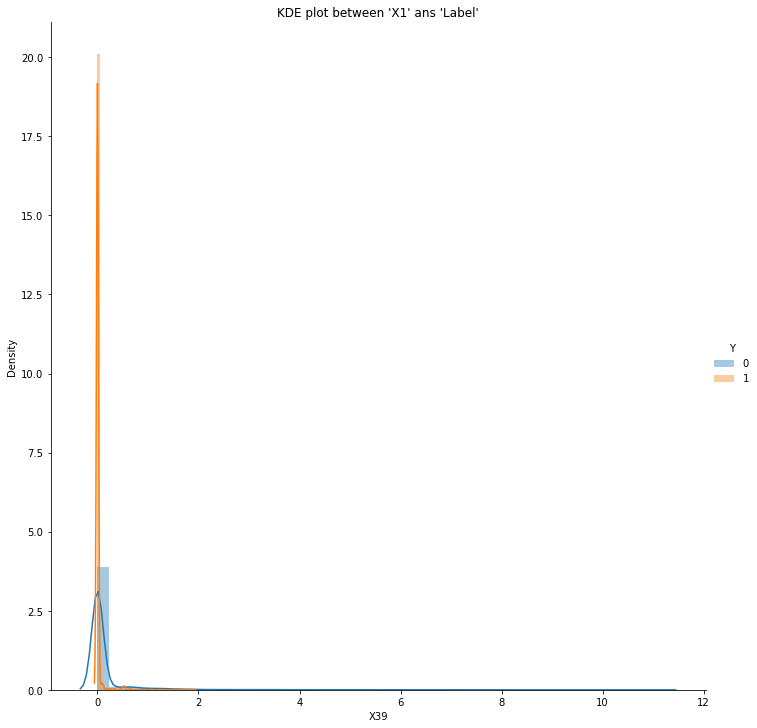

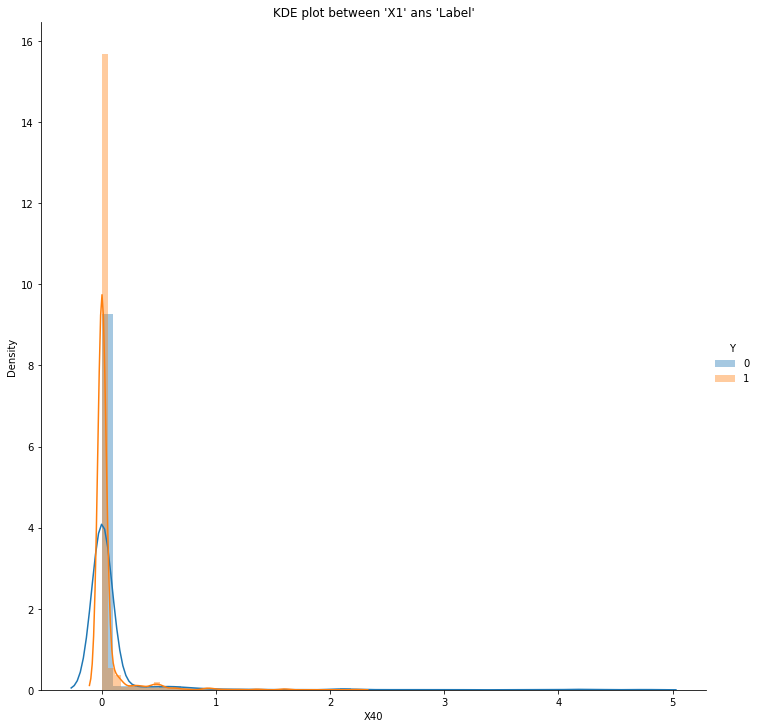

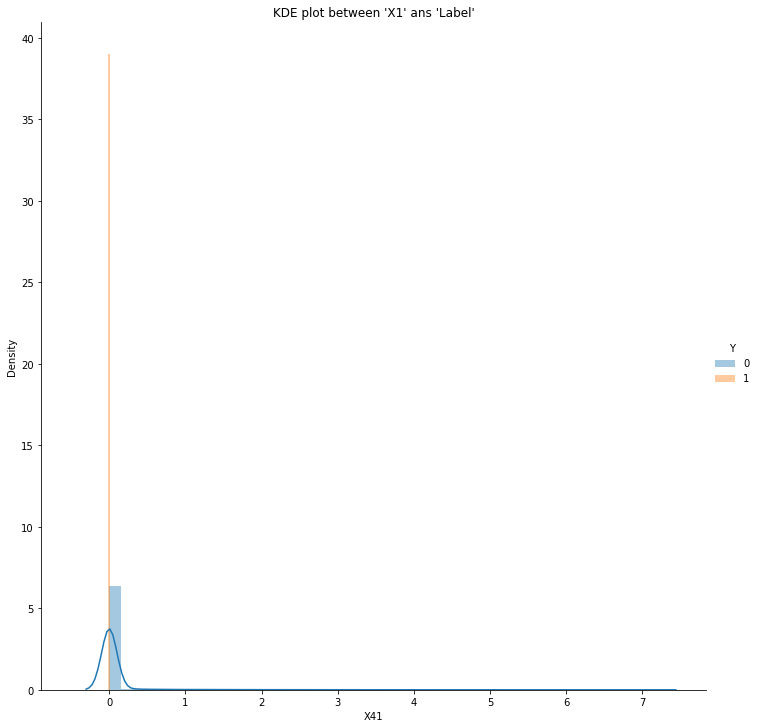

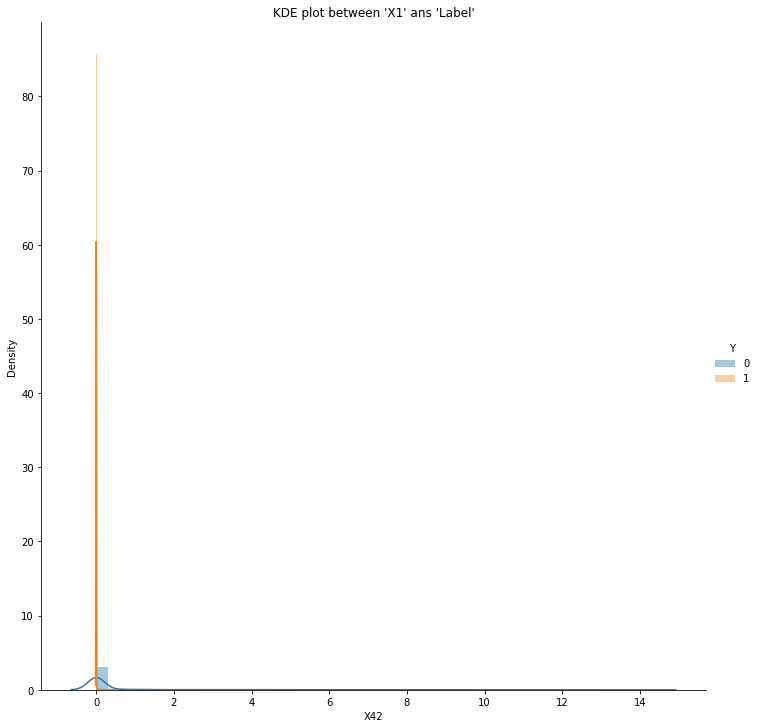

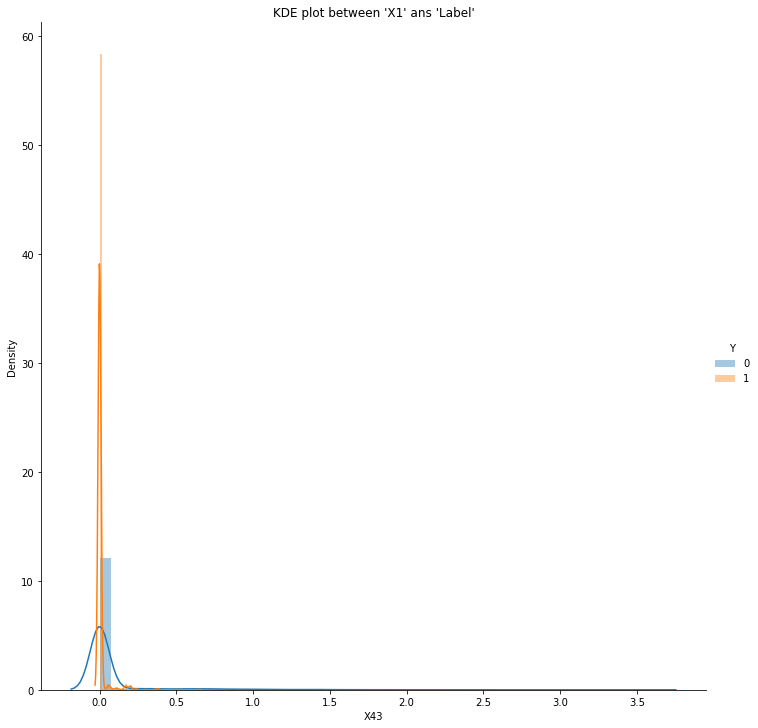

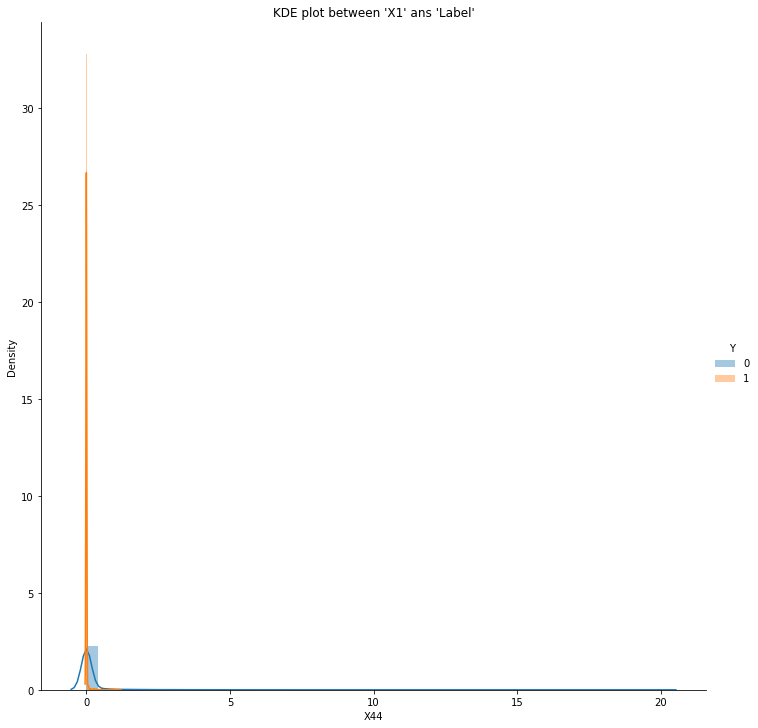

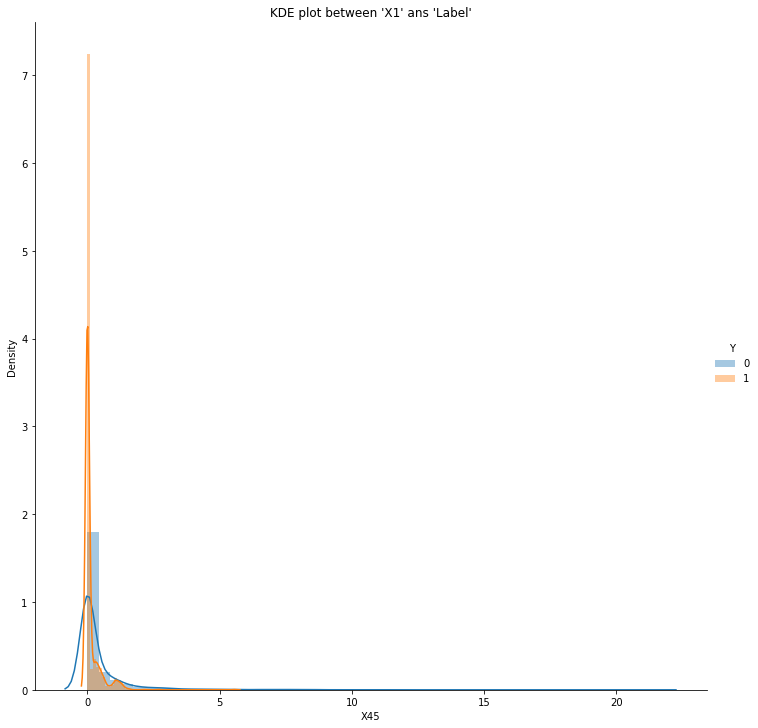

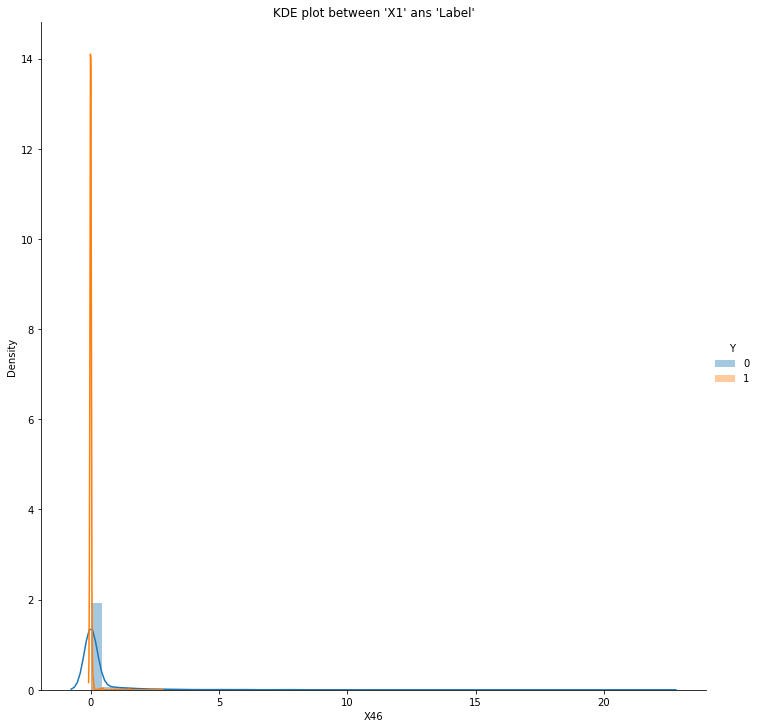

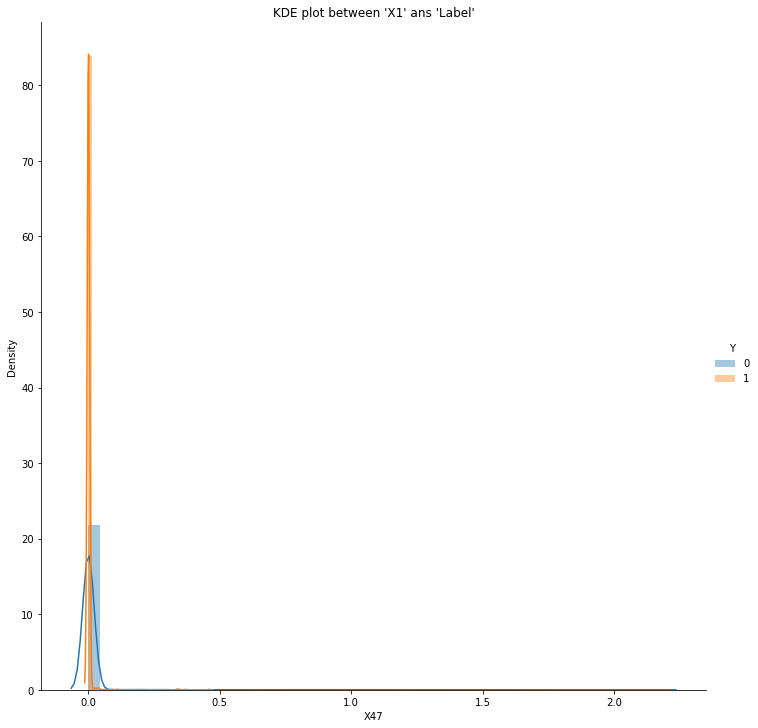

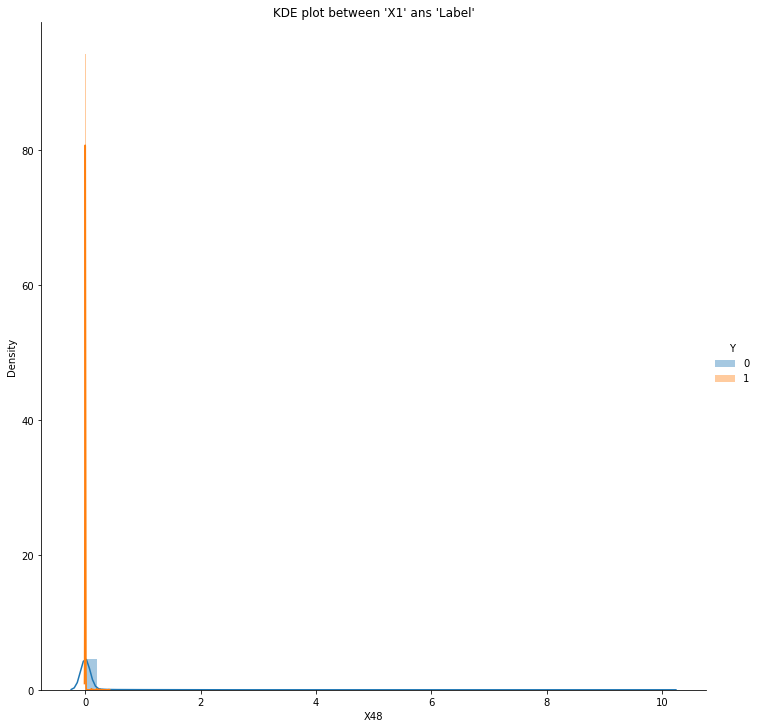

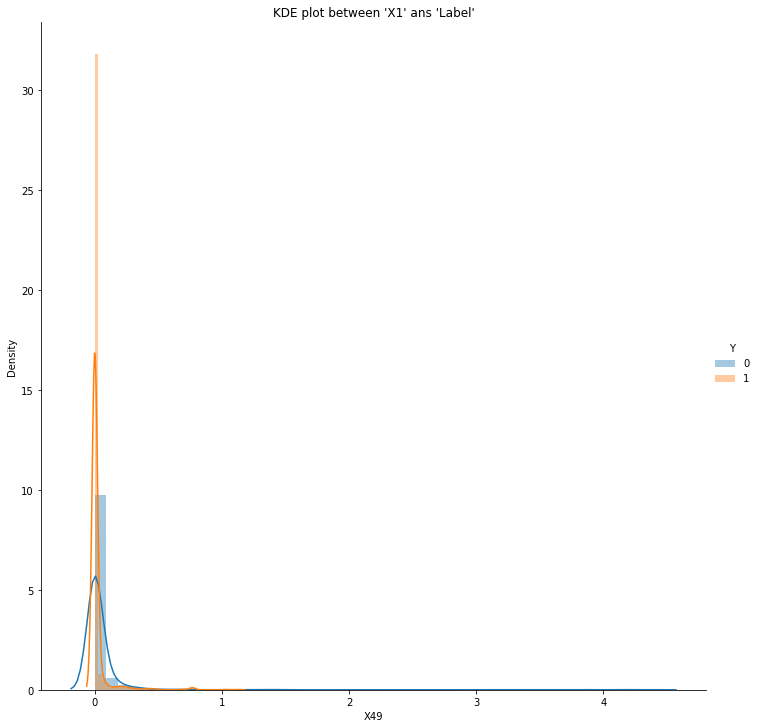

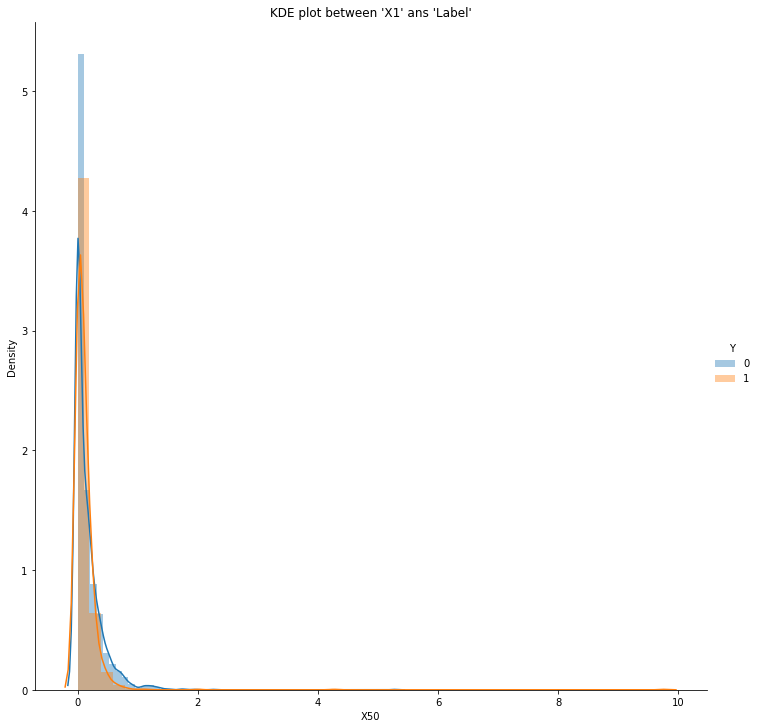

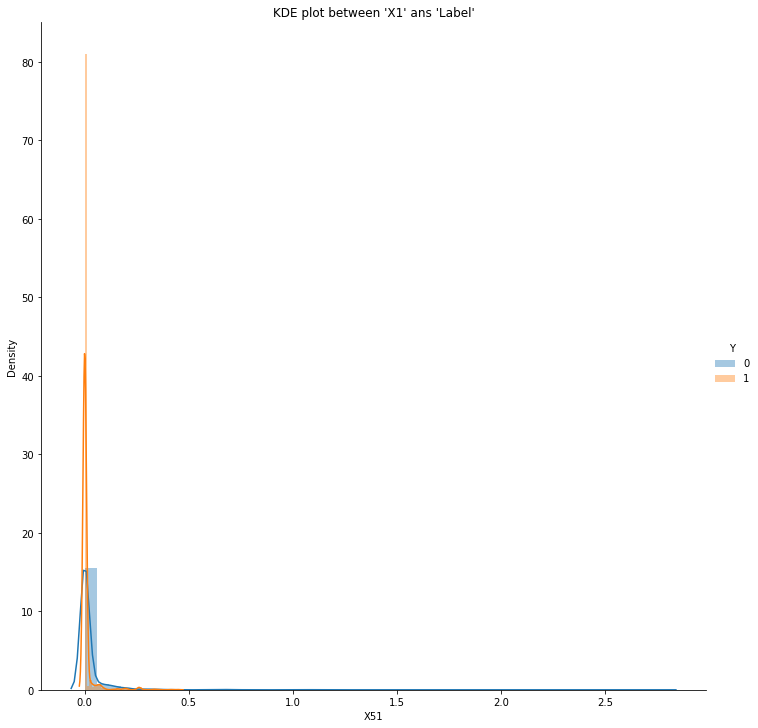

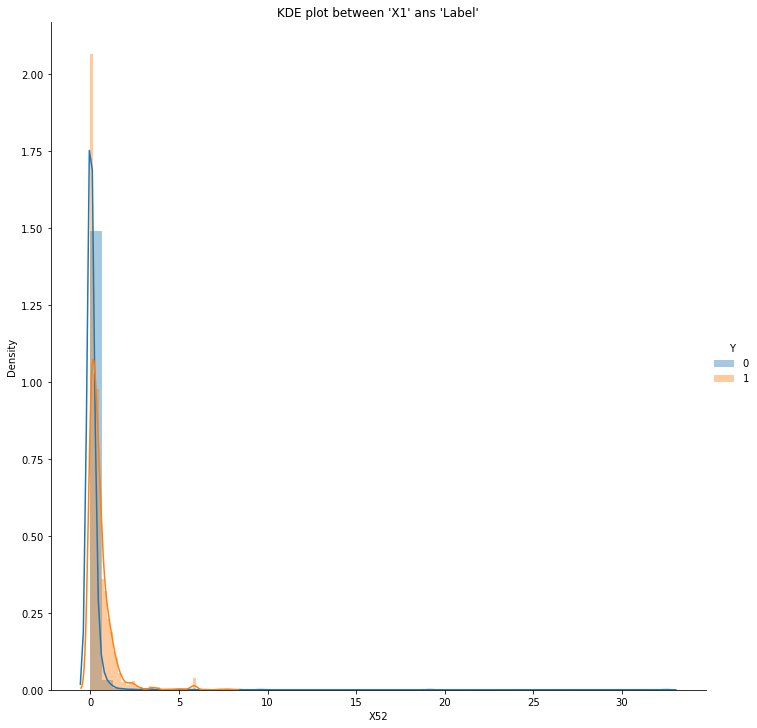

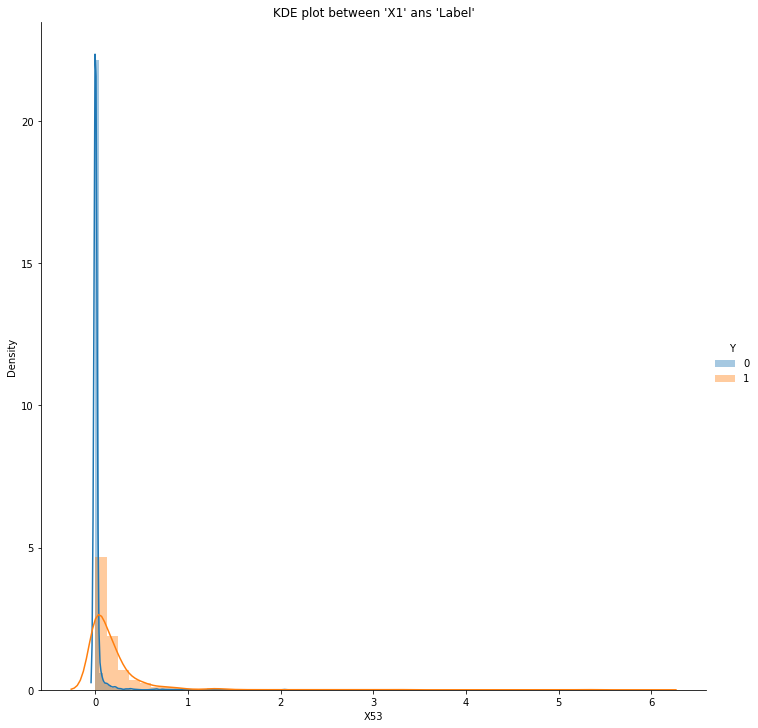

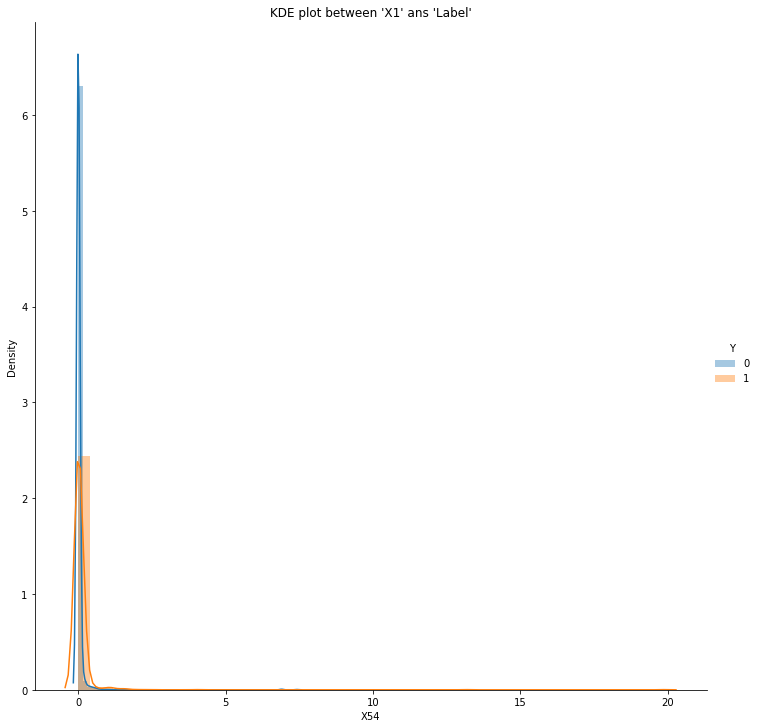

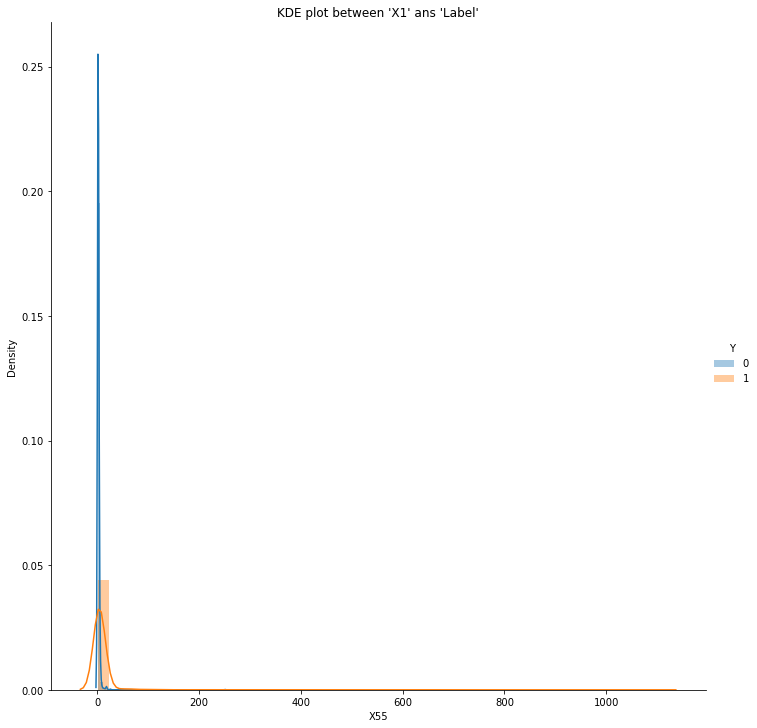

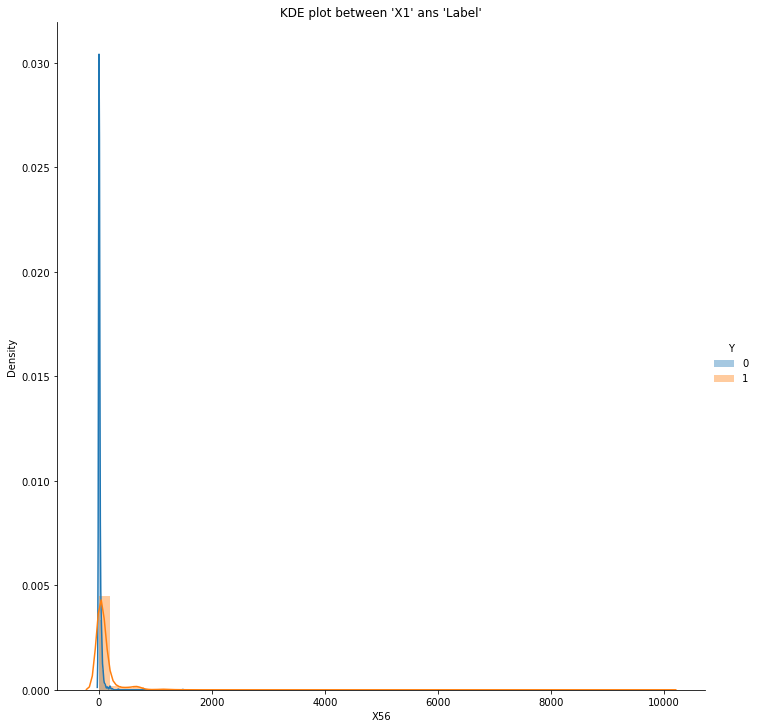

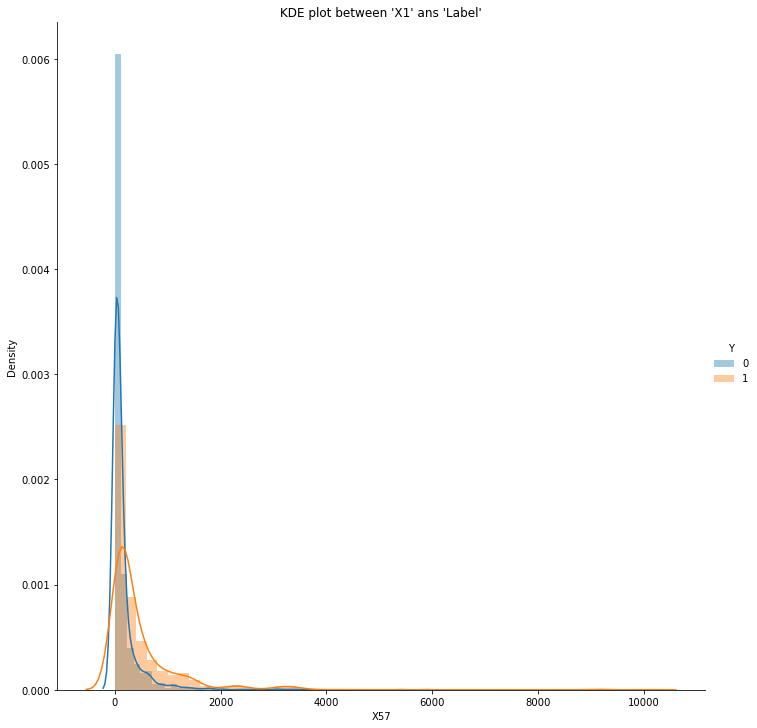

In [113]:
plot_kde(train)

#### Box and Whiskers Plots

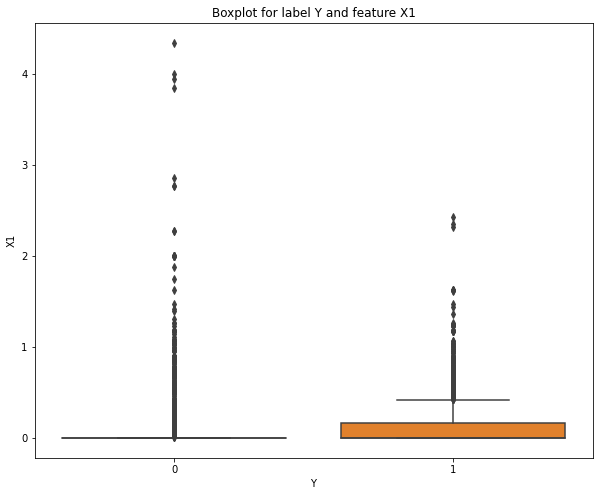

In [130]:
# Box-Plots and Whiskers are the more intuitive way for analysing 1-D scatter plots
# That helps to determine the mean, median and other attributes of the data
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Y', y = 'X1', data = train, width=0.8)
plt.title("Boxplot for label Y and feature X1")
plt.show()

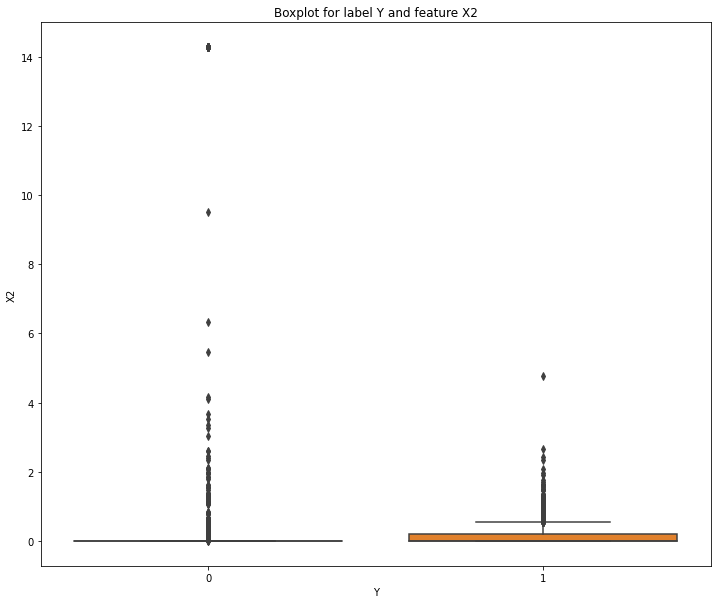

In [127]:
plt.figure(figsize=(12,10))
sns.boxplot(x = 'Y', y = 'X2', data = train, width=0.8)
plt.title("Boxplot for label Y and feature X2")
plt.show()

In [128]:
def plot_boxplot(df):
    for column in df.columns[2:57]:
        plt.figure(figsize=(12,10))
        sns.boxplot(x = 'Y', y = column, data = train, width=0.8)
        plt.title("Boxplot for label Y and feature {}".format(column))
        plt.show()

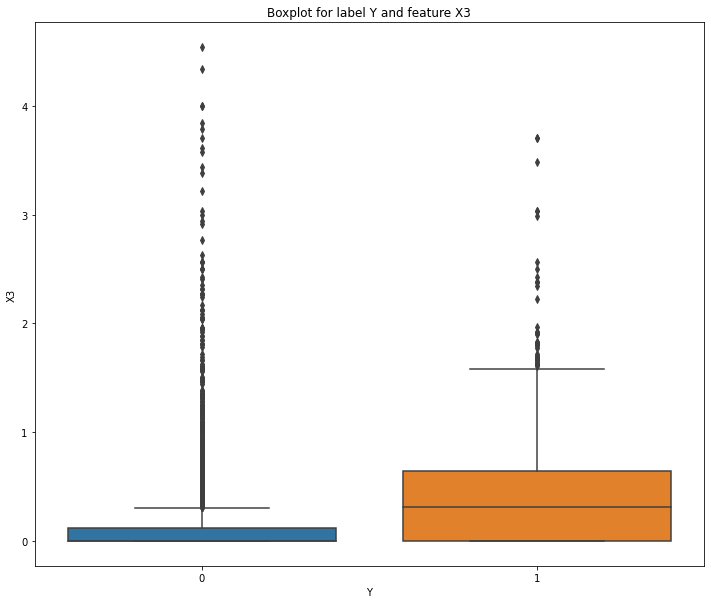

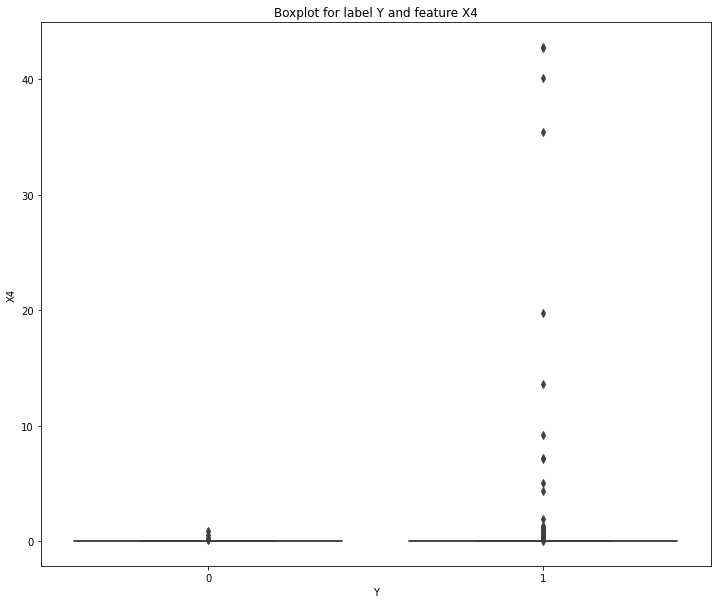

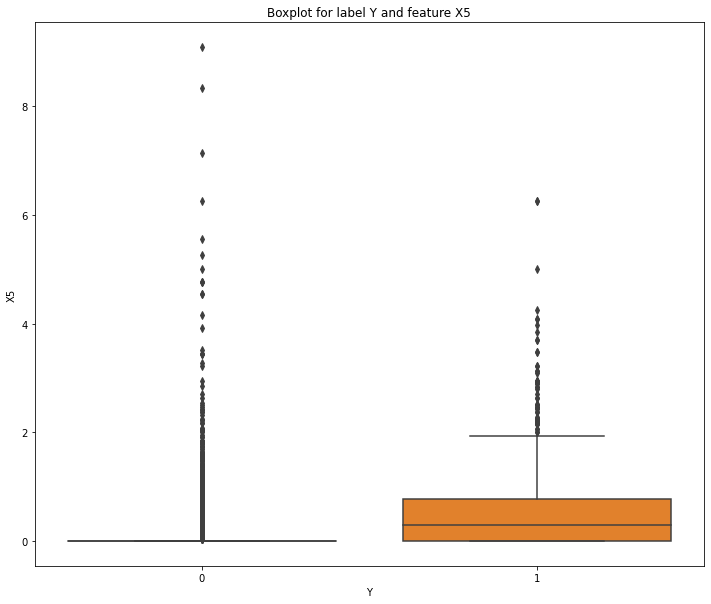

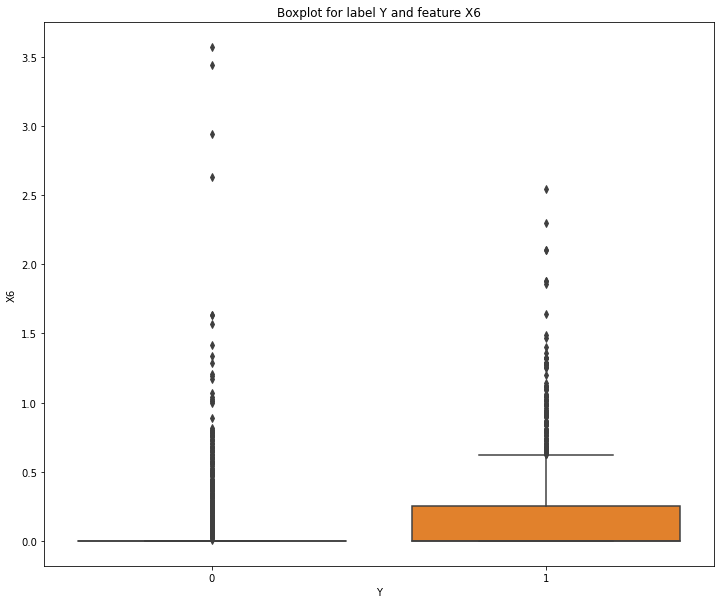

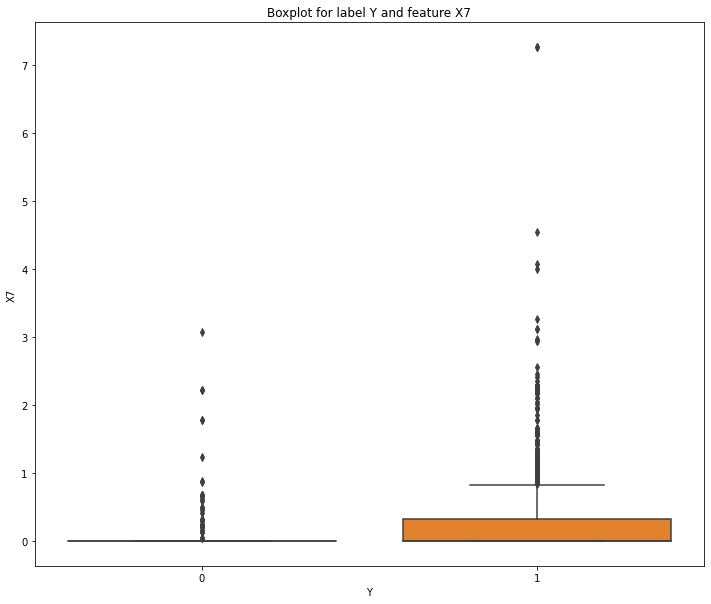

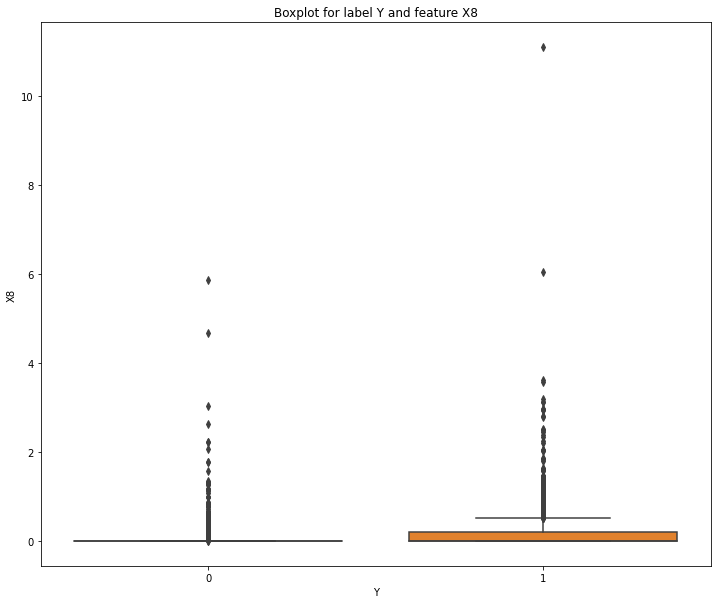

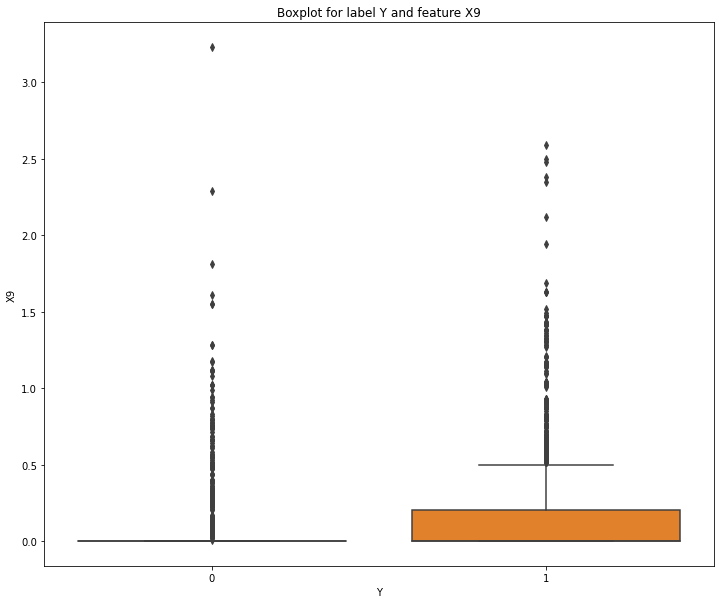

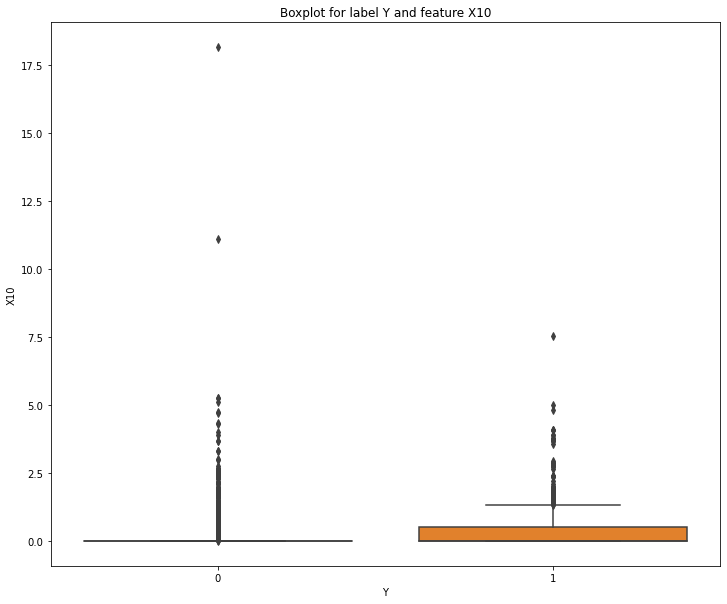

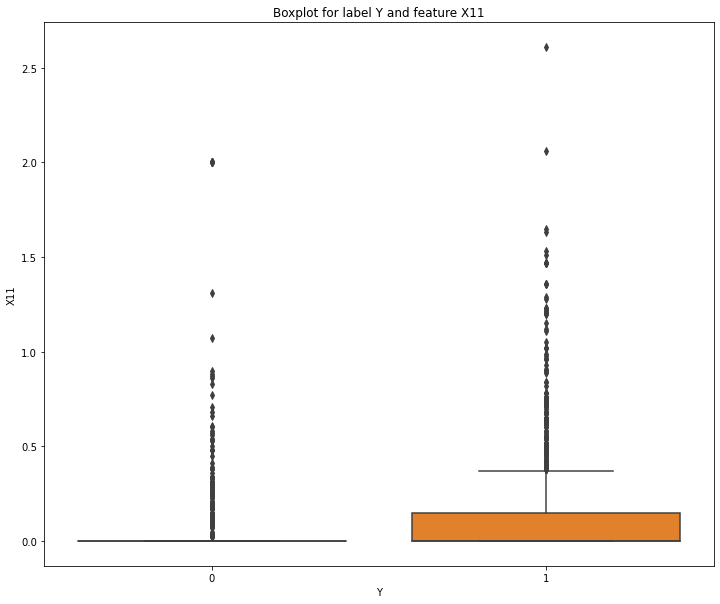

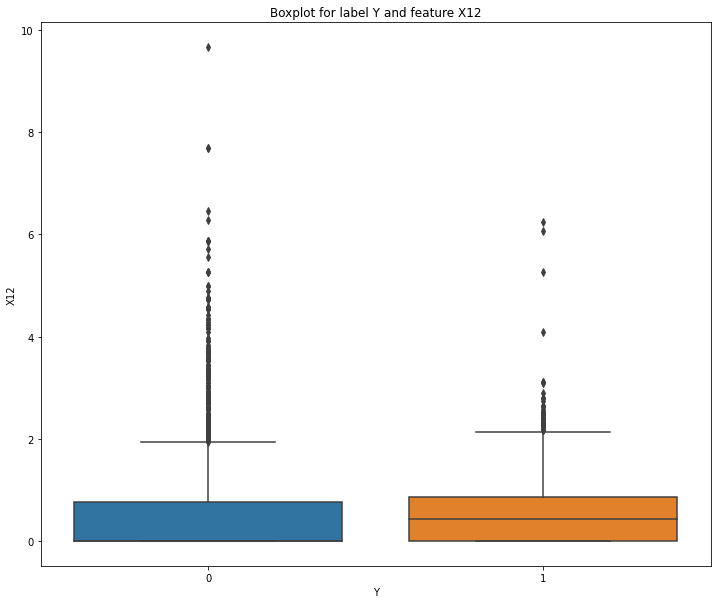

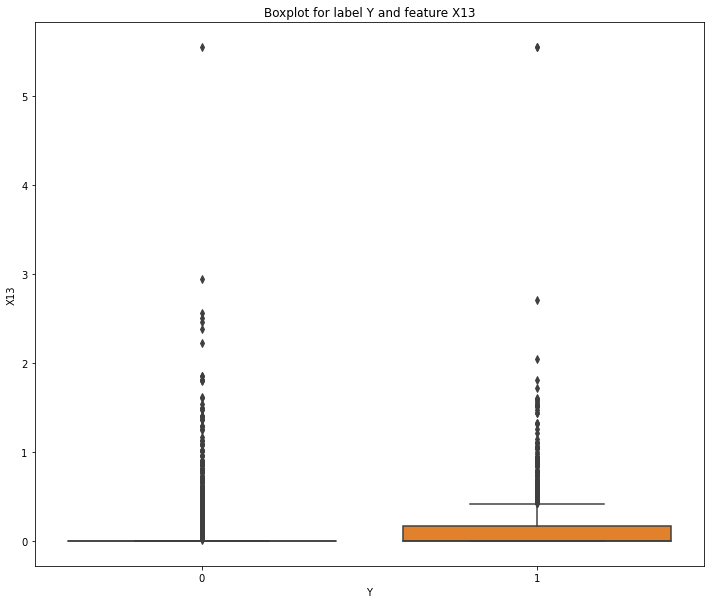

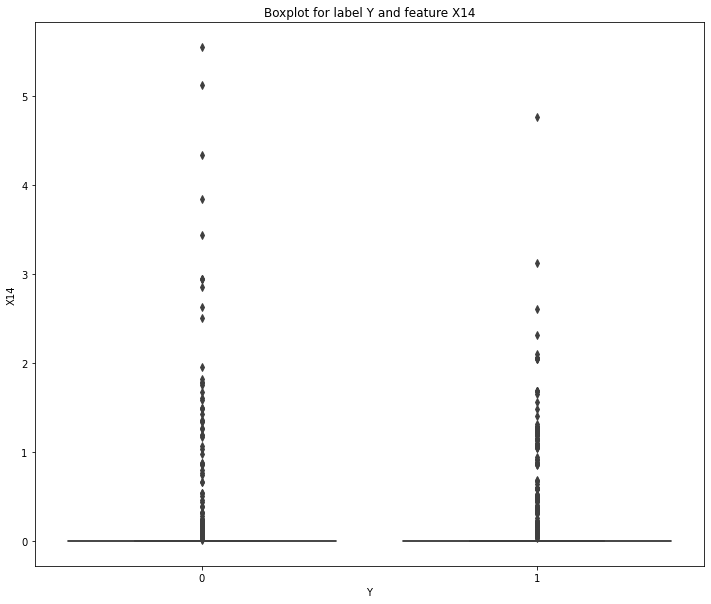

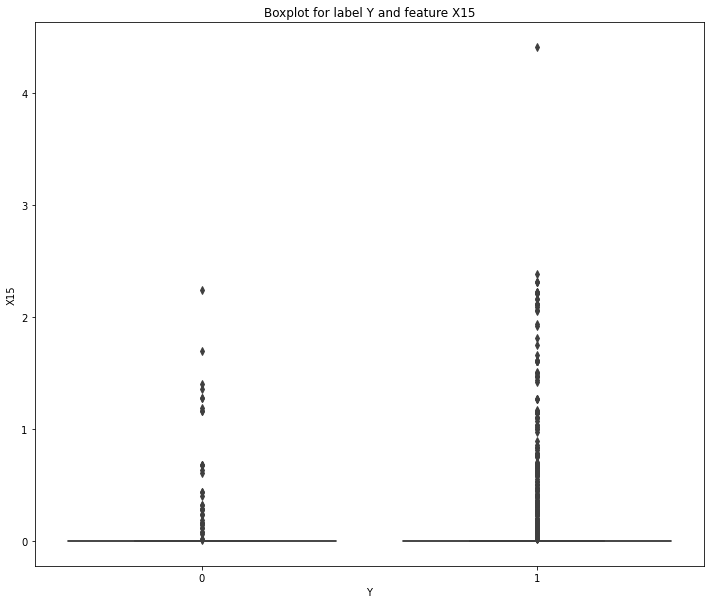

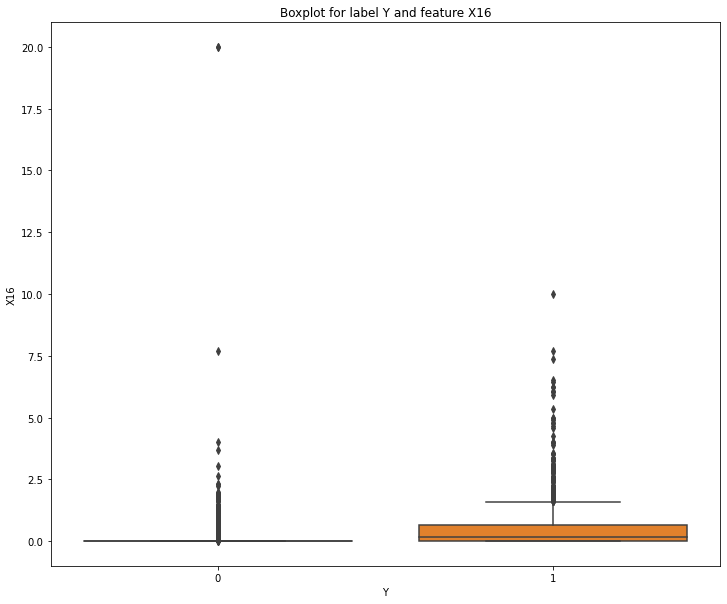

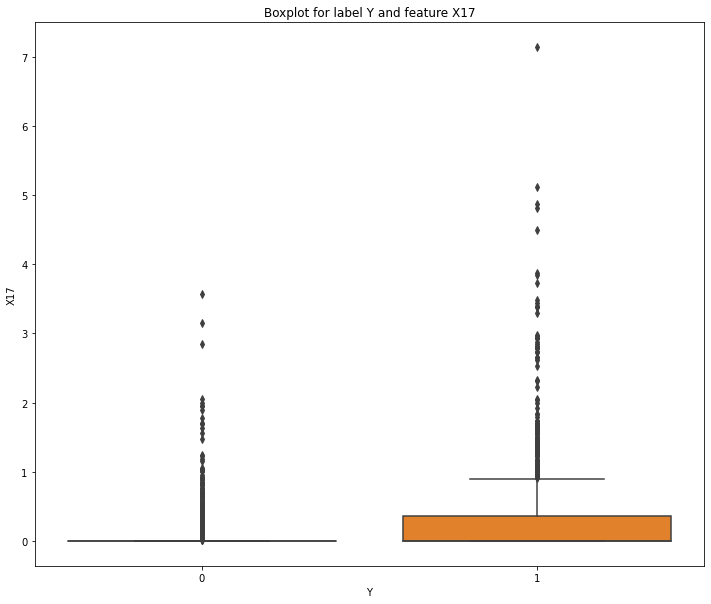

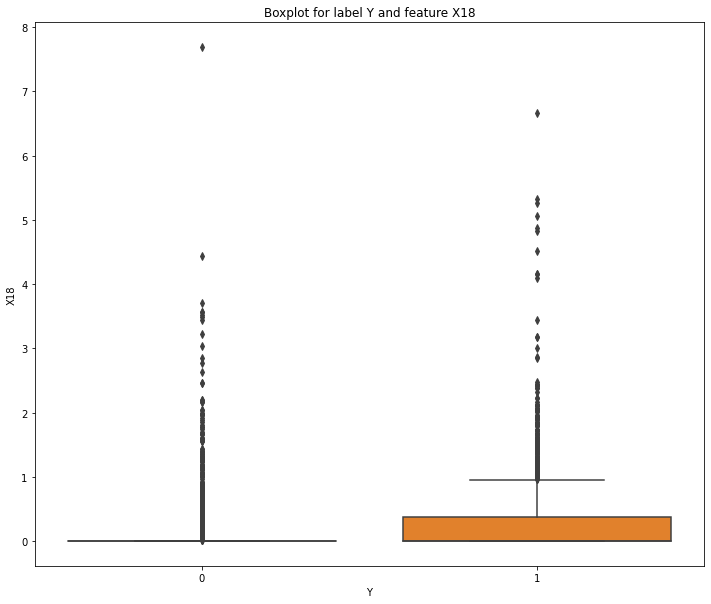

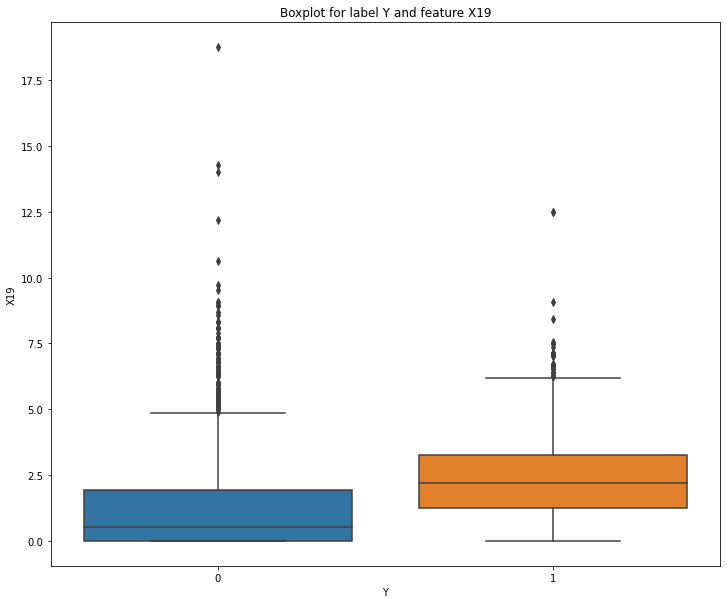

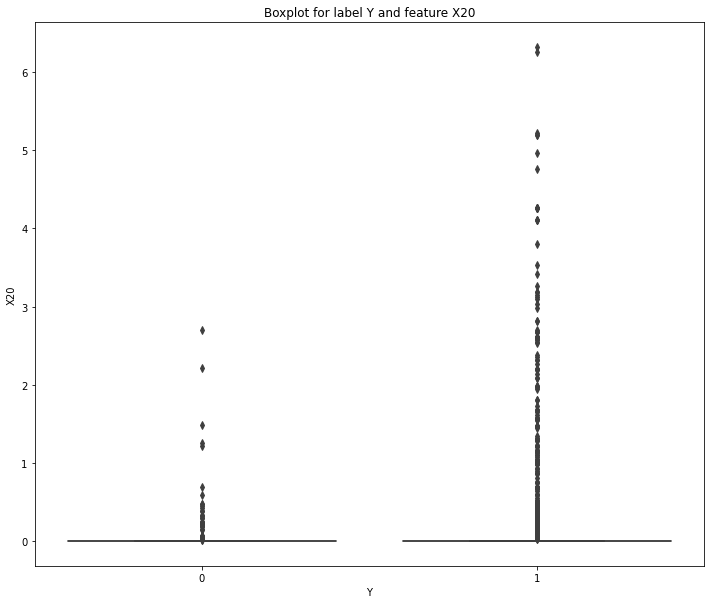

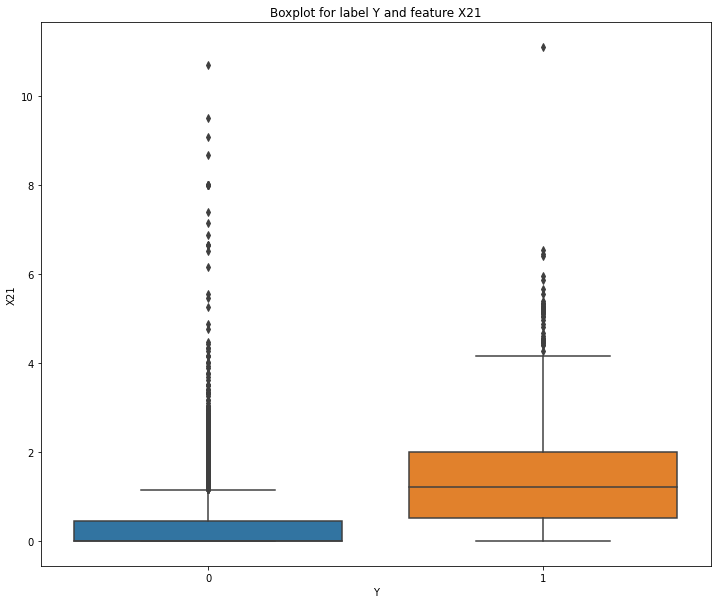

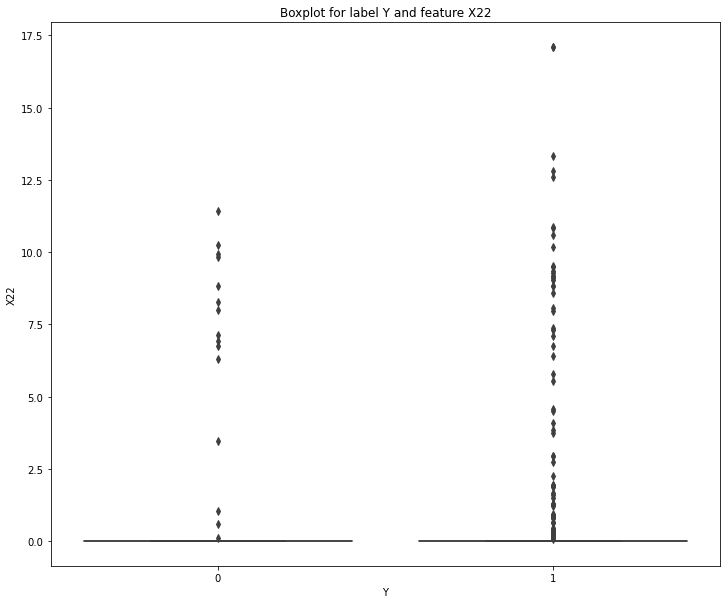

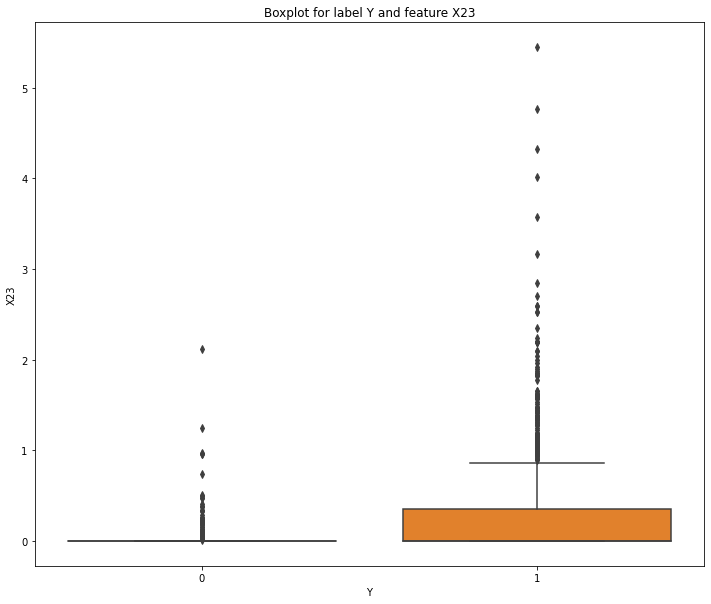

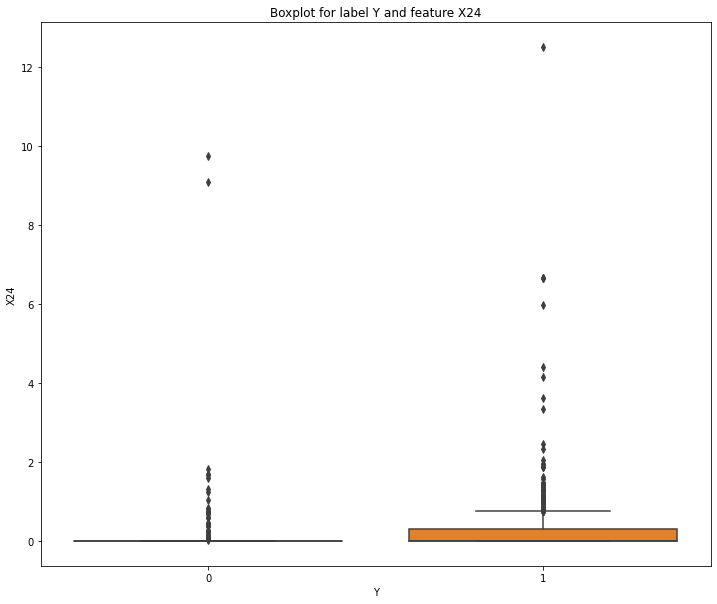

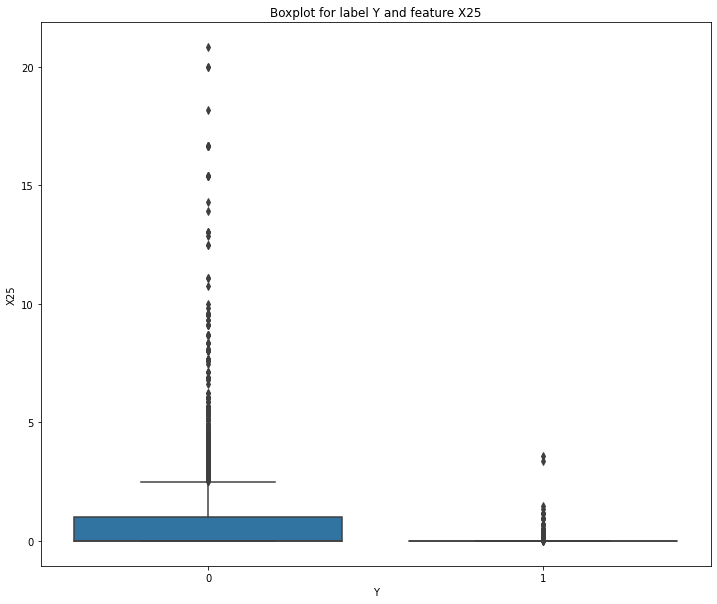

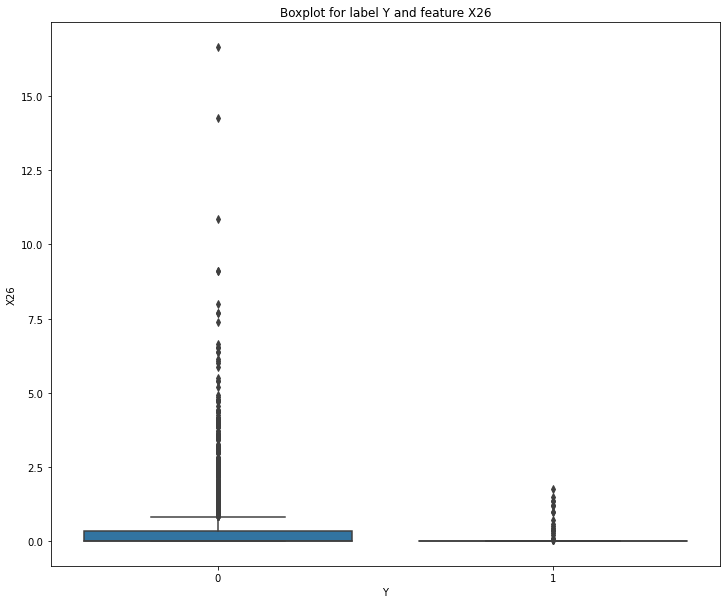

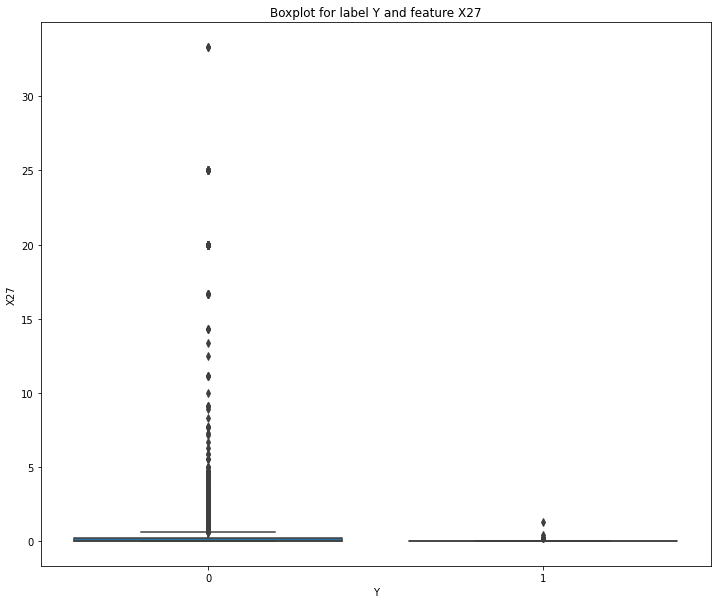

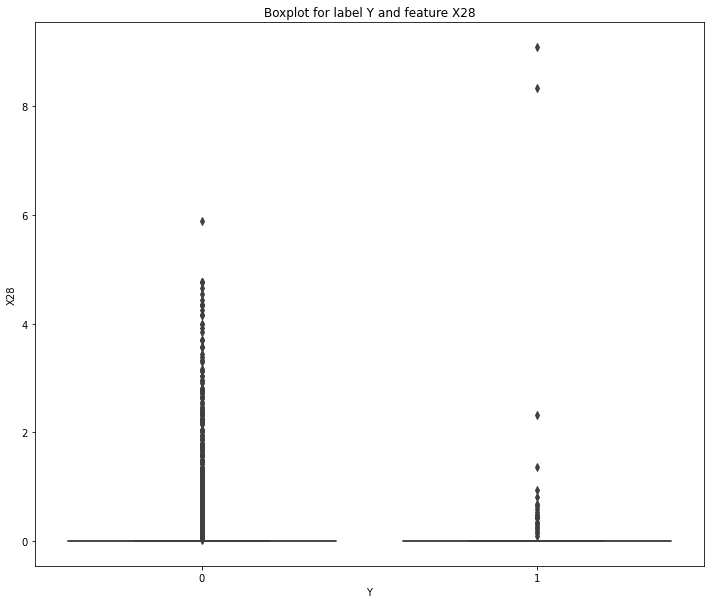

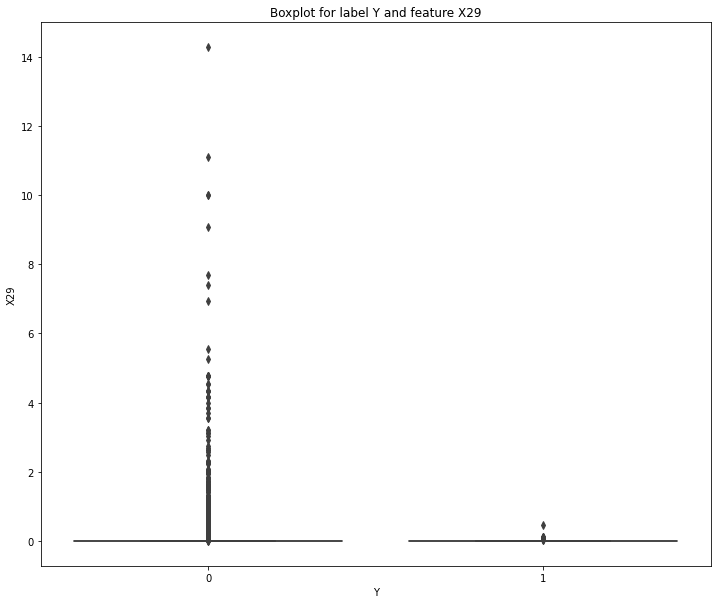

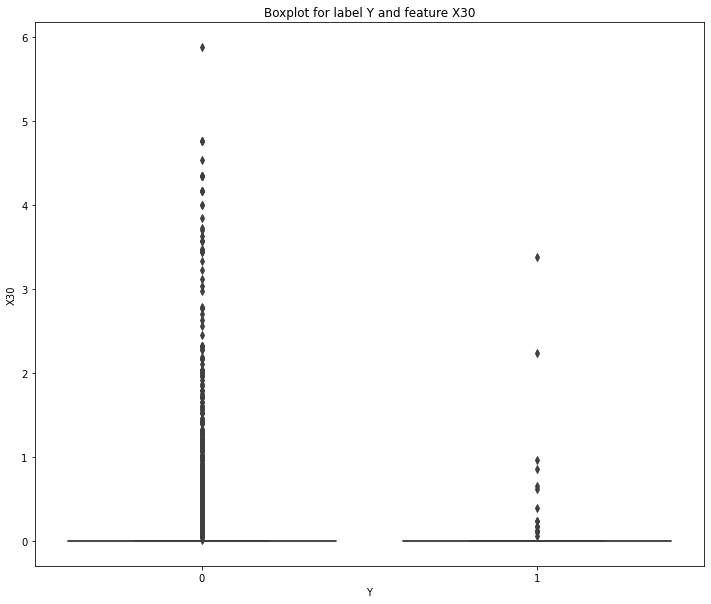

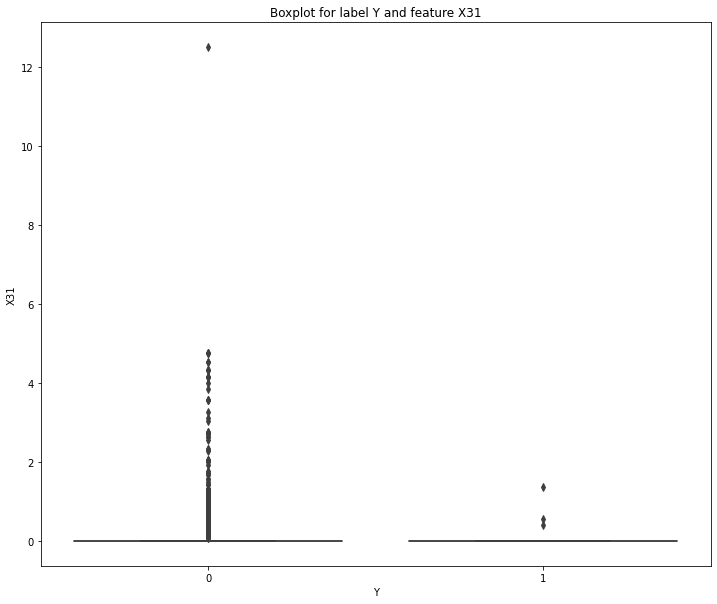

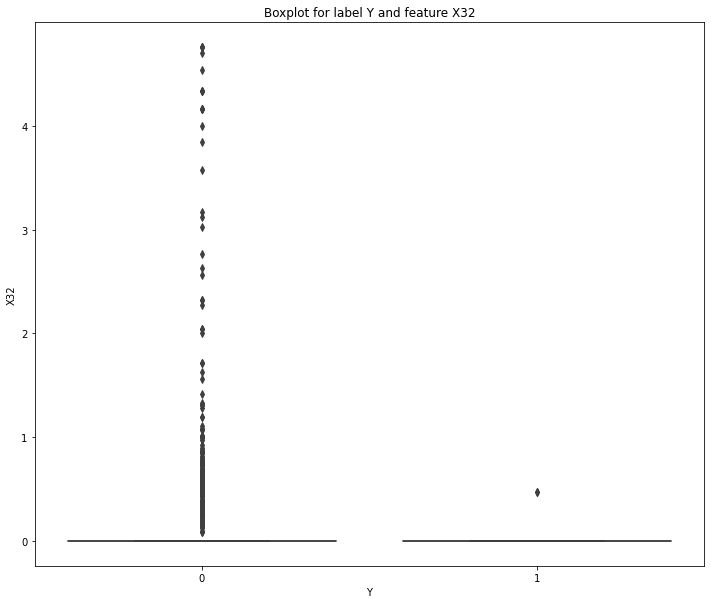

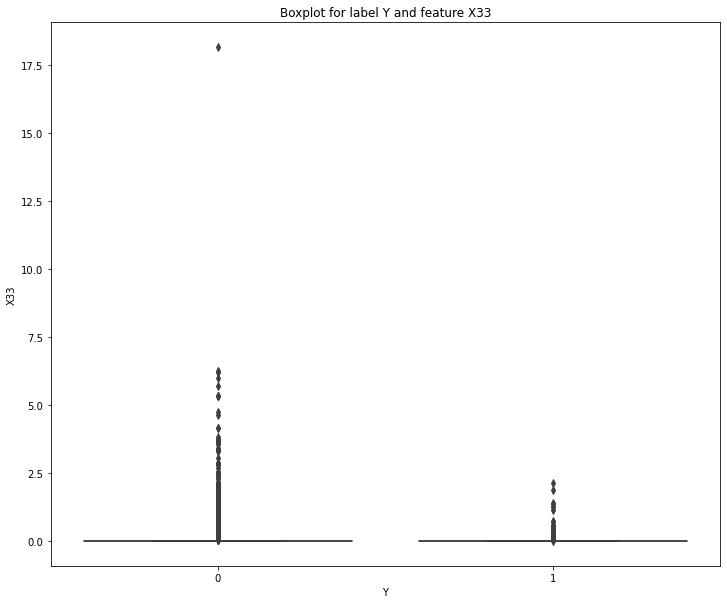

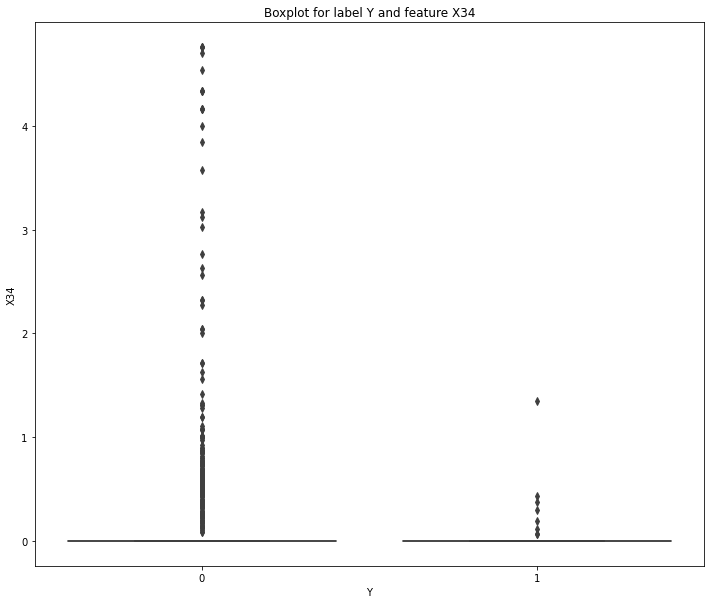

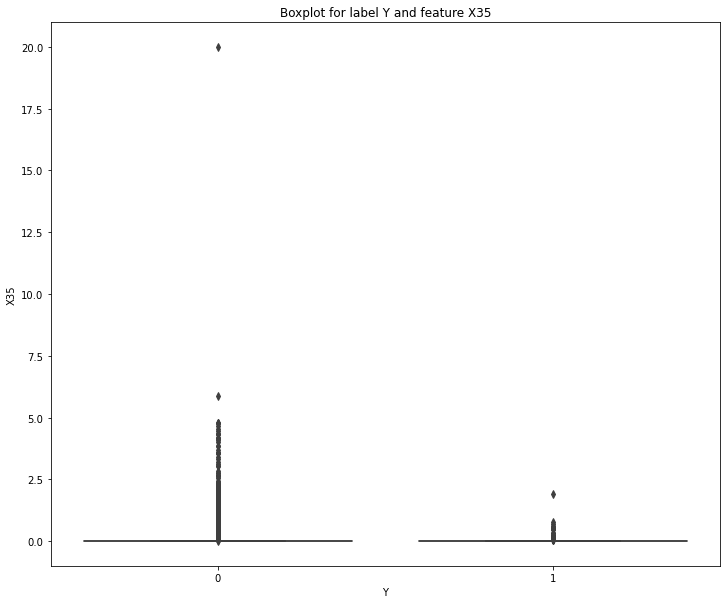

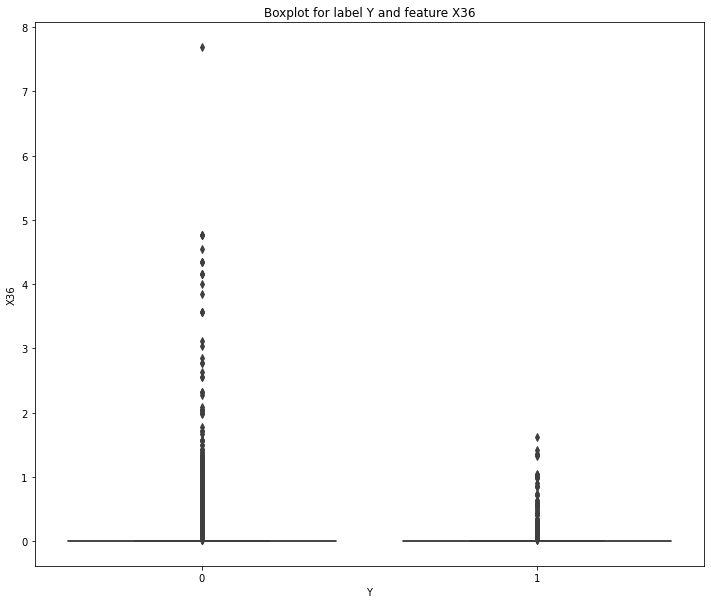

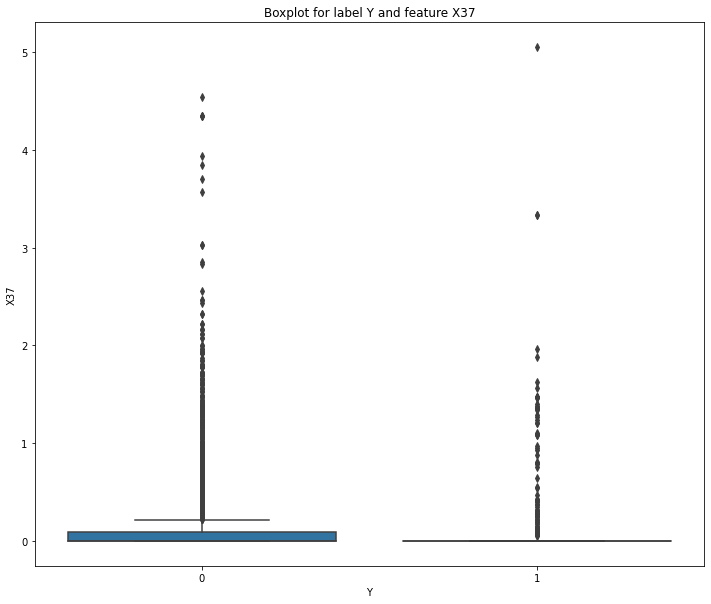

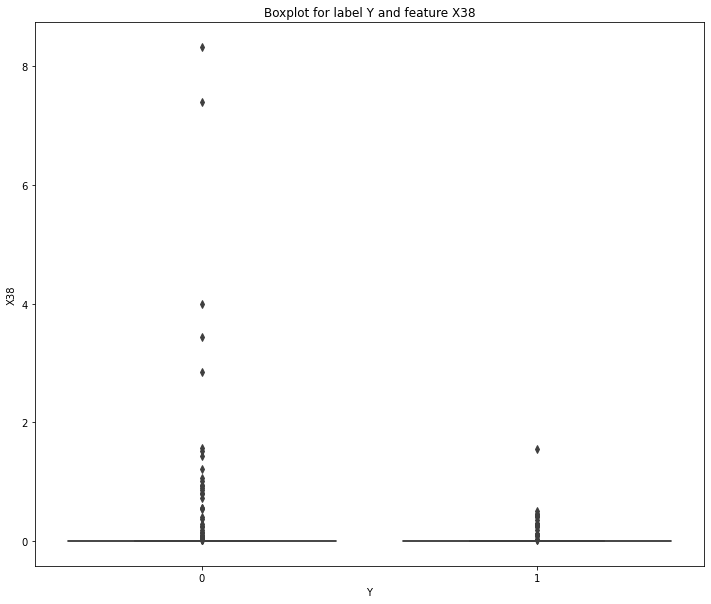

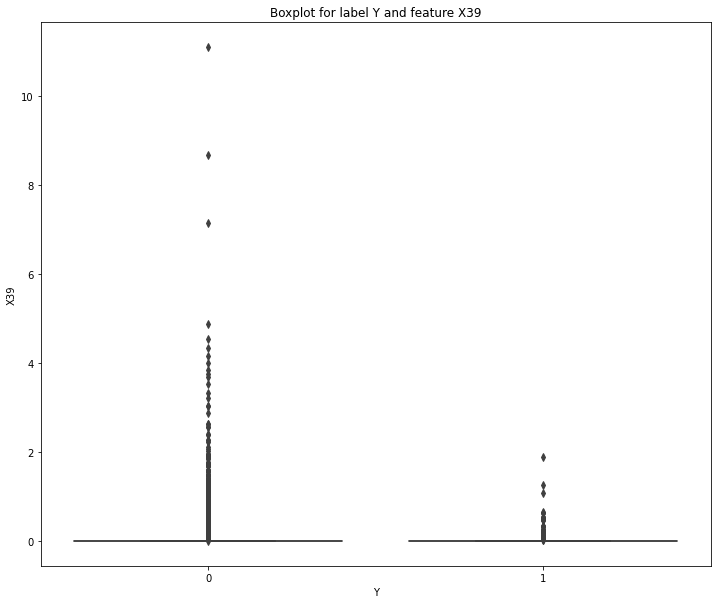

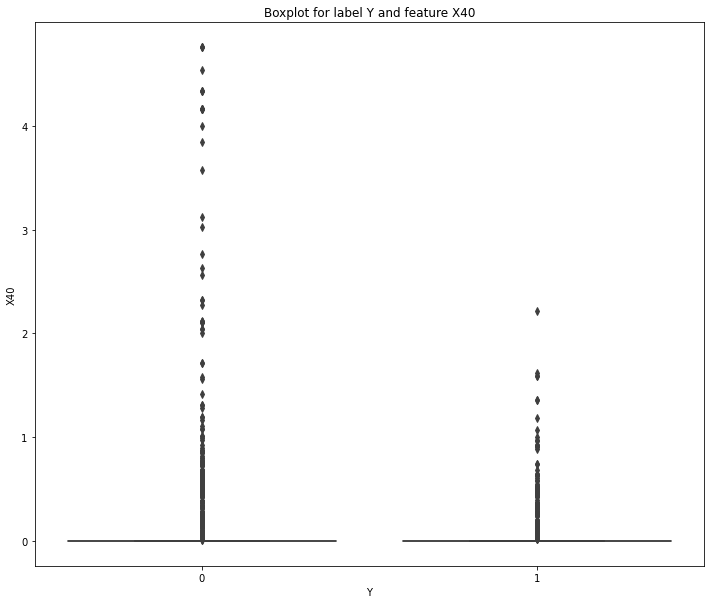

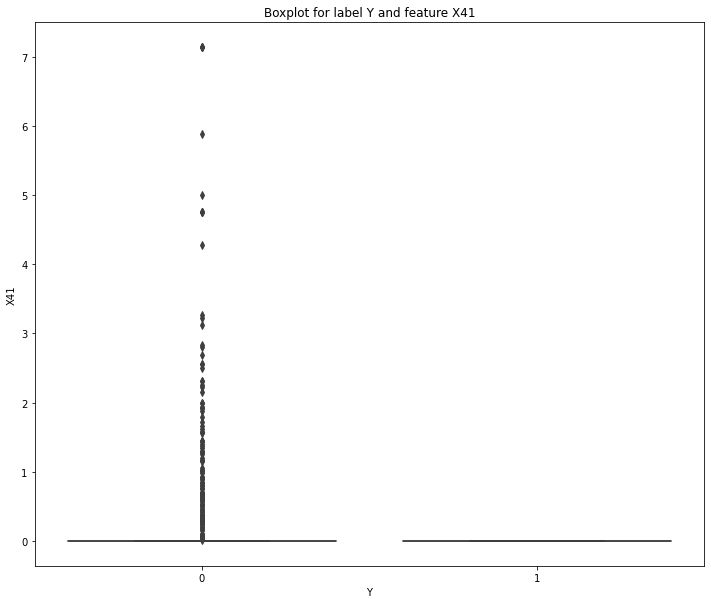

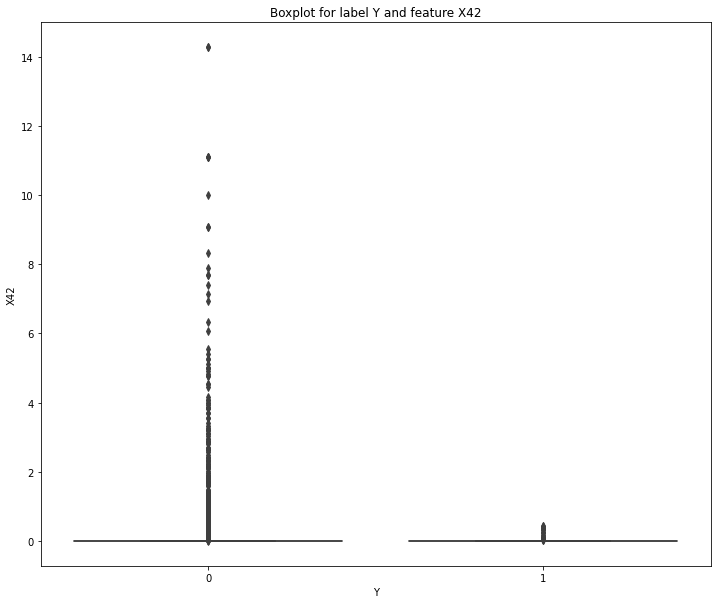

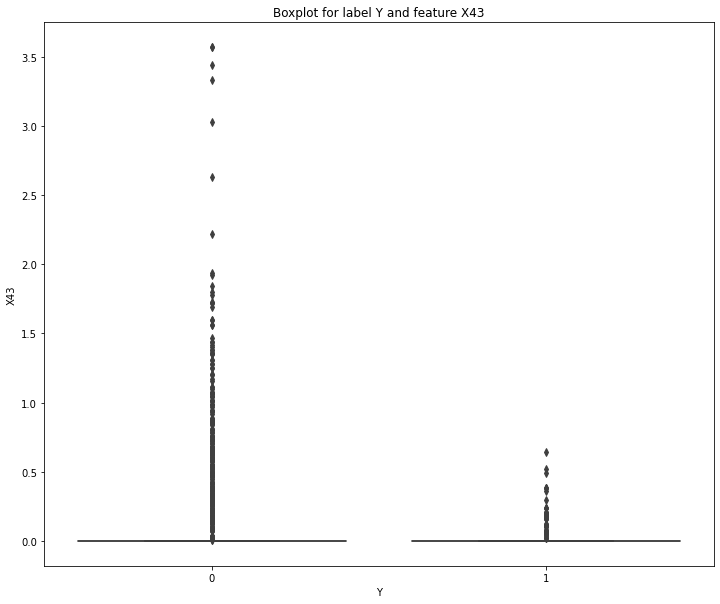

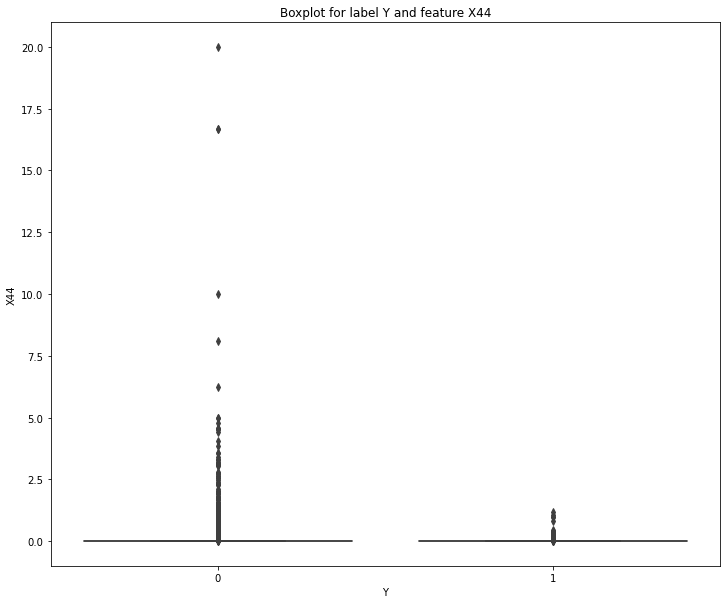

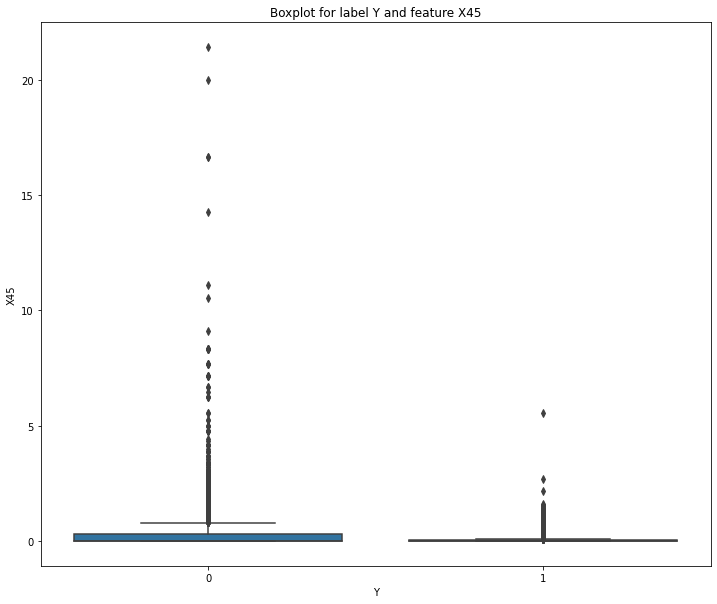

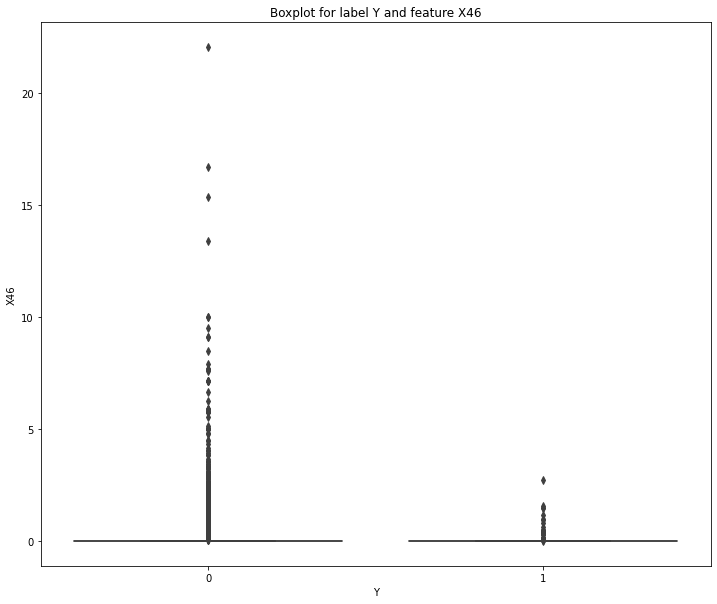

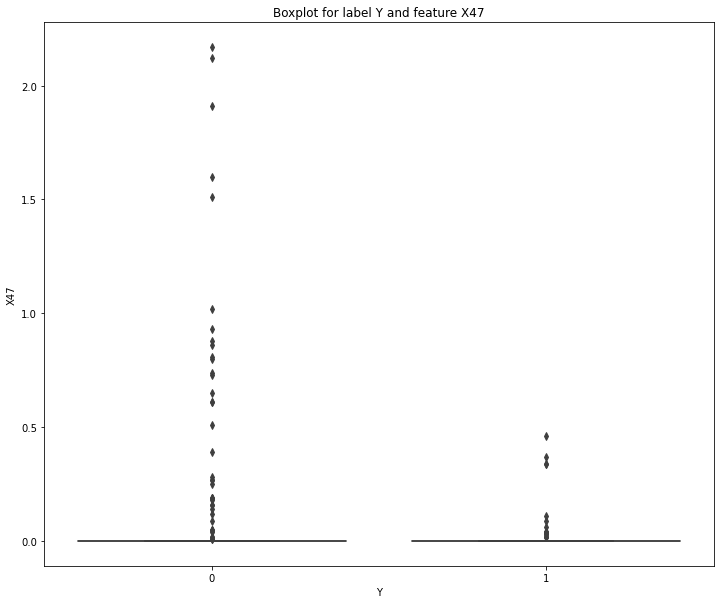

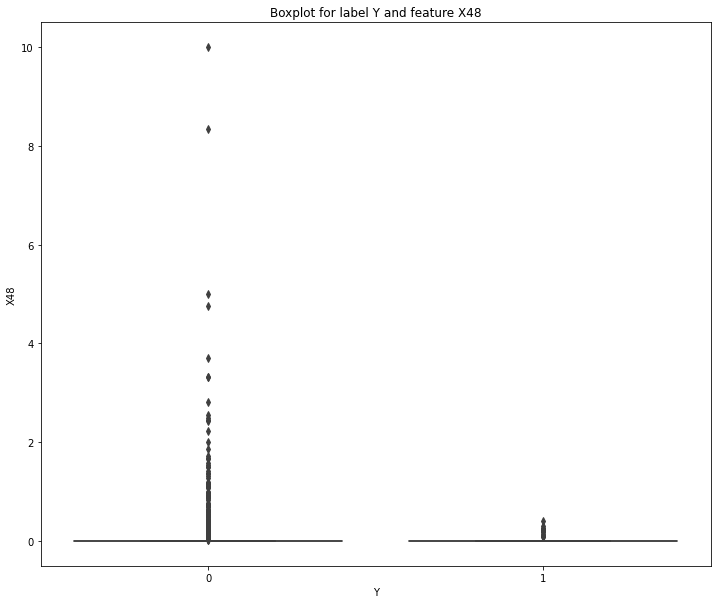

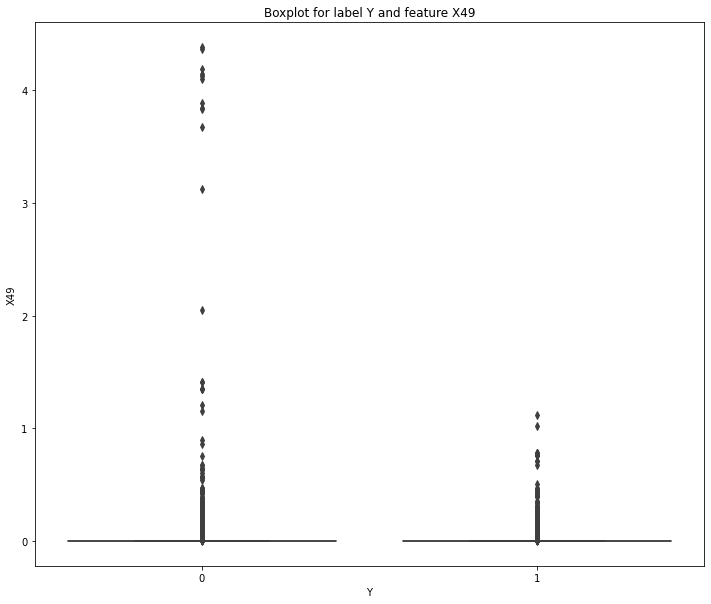

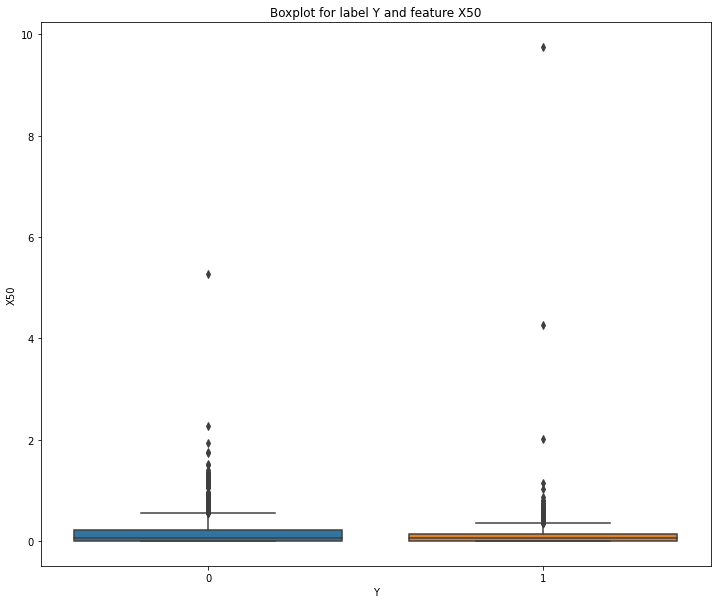

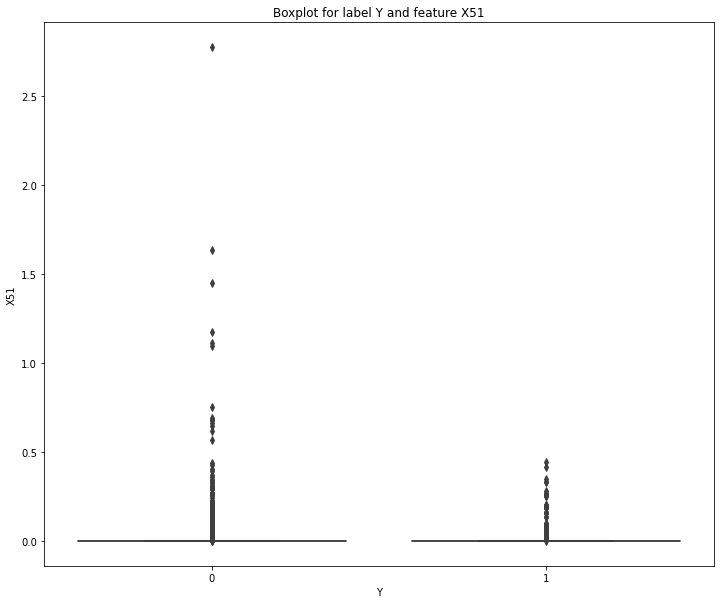

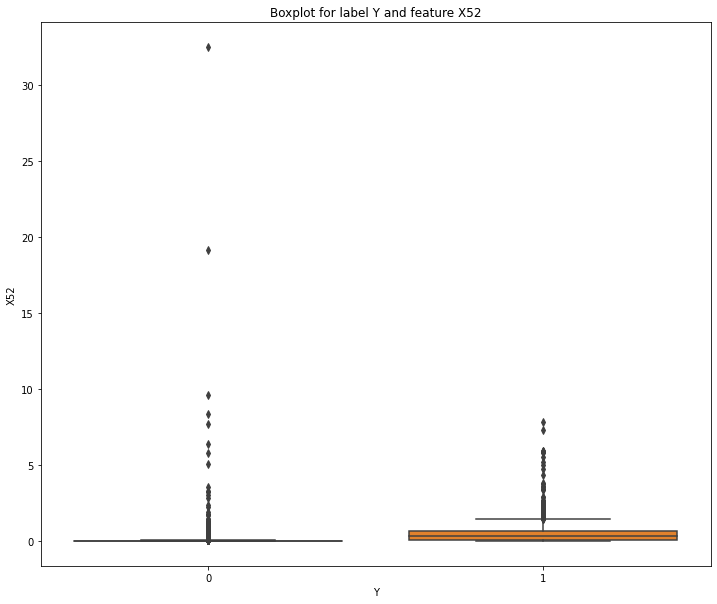

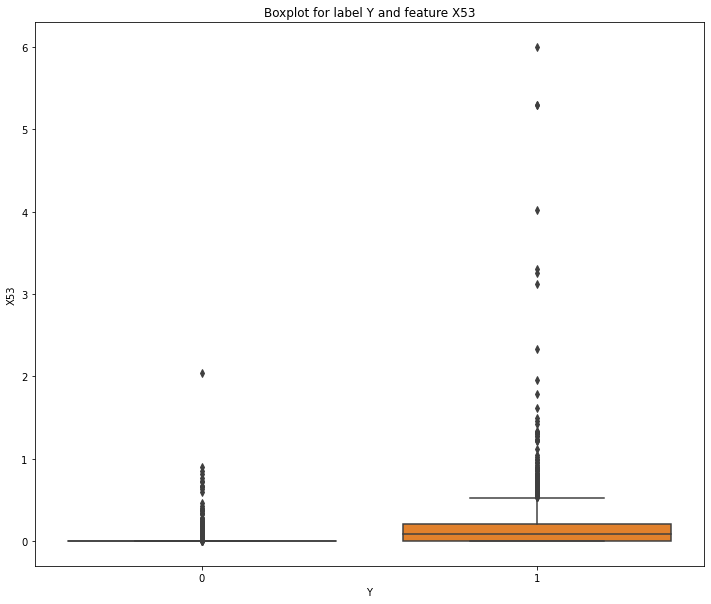

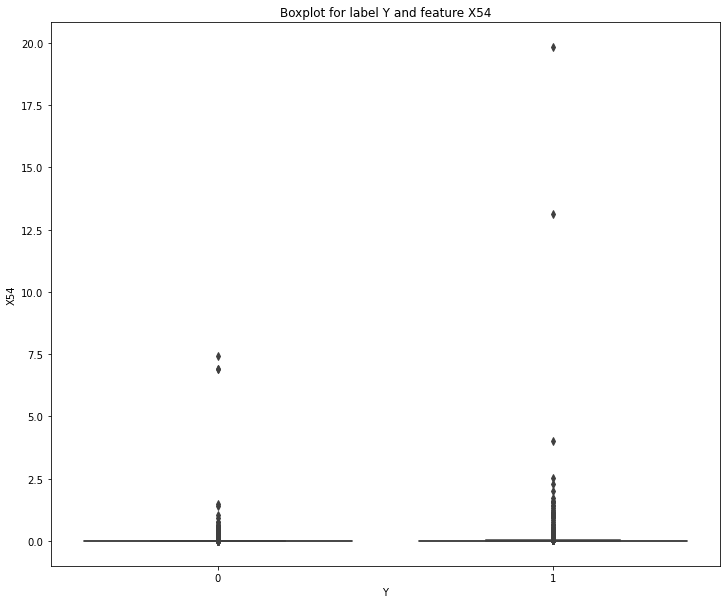

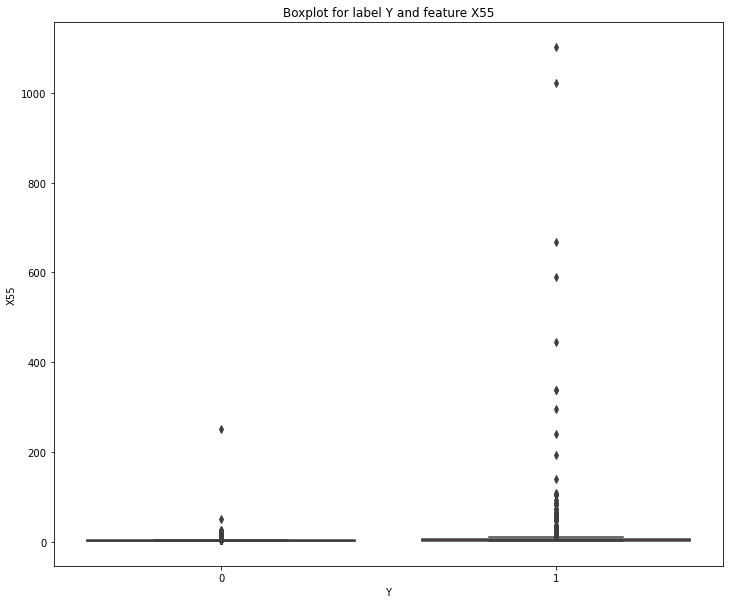

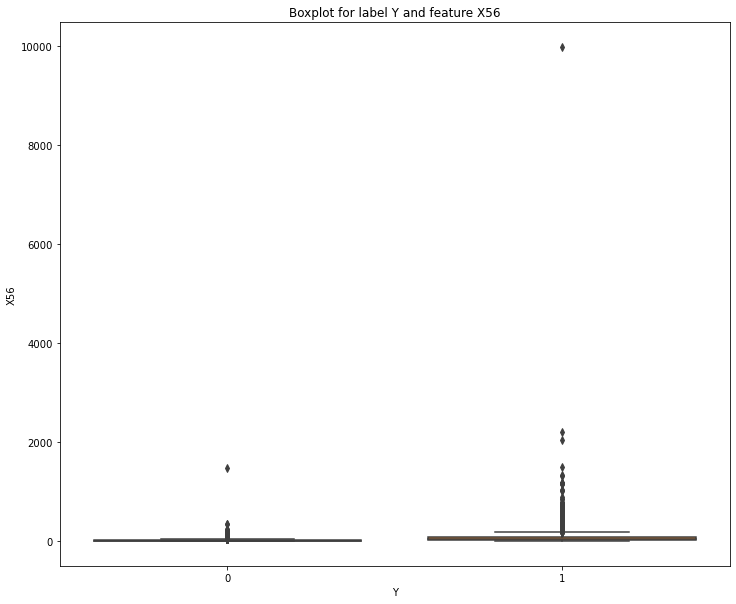

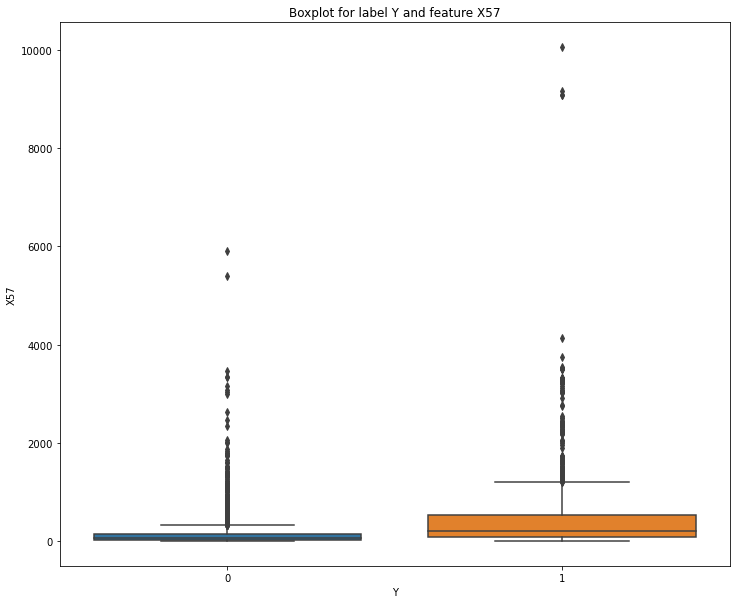

In [129]:
plot_boxplot(train)

In [131]:
#### Please refer this resource: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
#### and draw similar conclusions about your data features

### We have done exploratory data analysis and now we move towards feature engineering and feature selection.